In [1]:
#Carga de los archivos asociados para la revision de articulos historicos de premium choice 
import pandas as pd

# Cargar archivo
df_articulos = pd.read_excel('../data/raw/articulos.xlsx', engine='openpyxl')

# Revisión inicial
df_articulos.info()
df_articulos.head()
df_articulos.columns.tolist()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5098 entries, 0 to 5097
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   codigo      5098 non-null   object 
 1   barras      3493 non-null   object 
 2   nombre      5093 non-null   object 
 3   unidad      392 non-null    object 
 4   iva         5098 non-null   int64  
 5   activo      5098 non-null   object 
 6   referencia  151 non-null    object 
 7   kit         5098 non-null   bool   
 8   volumen     5098 non-null   int64  
 9   peso        5098 non-null   float64
 10  codbscula   697 non-null    object 
 11  reginvima   68 non-null     object 
 12  xunidad     5098 non-null   bool   
dtypes: bool(2), float64(1), int64(2), object(8)
memory usage: 448.2+ KB


['codigo',
 'barras',
 'nombre',
 'unidad',
 'iva',
 'activo',
 'referencia',
 'kit',
 'volumen',
 'peso',
 'codbscula',
 'reginvima',
 'xunidad']

In [17]:
import os

In [2]:
# Mostrar nombres de columnas y tipos de dato
print("Columnas y tipos de dato:")
print(df_articulos.dtypes)

# Opcional: Ver un resumen con valores ejemplo
print("\nPrimeros valores por columna:")
print(df_articulos.head(3).T)


Columnas y tipos de dato:
codigo         object
barras         object
nombre         object
unidad         object
iva             int64
activo         object
referencia     object
kit              bool
volumen         int64
peso          float64
codbscula      object
reginvima      object
xunidad          bool
dtype: object

Primeros valores por columna:
                                            0                             1  \
codigo                                 130220                        150704   
barras                          8851081200245                           NaN   
nombre      SALSA CHILE BEST CHOICE X 880 GRS  ALM. CROISSANT JAMON Y QUESO   
unidad                                 UNIDAD                        UNIDAD   
iva                                        19                             8   
activo                                      S                             S   
referencia                                NaN                           NaN   
kit        

In [4]:
# Estadísticas generales
df_articulos.describe(include='all')

# Verificar valores nulos por columna
print("\nValores nulos por columna:")
print(df_articulos.isnull().sum())

# Verificar duplicados (excluyendo la columna 'tokens' que genera conflicto)
print("\nNúmero de filas duplicadas (sin considerar 'tokens'):")
print(df_articulos.drop(columns='tokens').duplicated().sum())



Valores nulos por columna:
codigo           0
barras        1605
nombre           5
unidad        4706
iva              0
activo           0
referencia    4947
kit              0
volumen          0
peso             0
codbscula     4401
reginvima     5030
xunidad          0
dtype: int64

Número de filas duplicadas (sin considerar 'tokens'):


KeyError: "['tokens'] not found in axis"

In [5]:
#Extraccion de palabras clave de los nombres de productos 
df_articulos['nombre_limpio'] = df_articulos['nombre'].str.upper().str.replace(r'[^A-Z\s]', '', regex=True)
df_articulos['tokens'] = df_articulos['nombre_limpio'].str.split()


In [6]:
#Exploracion de las palabras clave mas comunes encontradas
from collections import Counter

# Aplanar todas las listas de tokens en una sola lista
todas_las_palabras = [palabra for sublista in df_articulos['tokens'].dropna() for palabra in sublista]

# Contar frecuencia de cada palabra
frecuencias = Counter(todas_las_palabras)

# Mostrar las 30 más comunes
frecuencias.most_common(30)


[('X', 2637),
 ('ALM', 794),
 ('DE', 757),
 ('GR', 723),
 ('ML', 480),
 ('KL', 416),
 ('G', 305),
 ('VINO', 227),
 ('CON', 226),
 ('QUESO', 181),
 ('CERVEZA', 173),
 ('PAN', 170),
 ('INV', 158),
 ('CDV', 156),
 ('Y', 143),
 ('LA', 140),
 ('UND', 130),
 ('APROX', 128),
 ('MOR', 127),
 ('LF', 125),
 ('MALBEC', 110),
 ('JAMON', 106),
 ('MINI', 103),
 ('GWS', 93),
 ('RESERVA', 85),
 ('INT', 84),
 ('CHOCOLATE', 83),
 ('EN', 79),
 ('KG', 76),
 ('GOUDA', 74)]

In [7]:
#Eliminacion de las palabras que no aportan valor 
palabras_ruido = {'X', 'ML', 'GR', 'G', 'KL', 'UND', 'INV', 'CDV', 'CON', 'INT', 'EN', 'DE', 'LA', 'Y', 'LF'}


In [20]:
# Lista de palabras a excluir (ruido, unidades de medida, conectores, etc.)
# Asegúrate de que esta lista esté definida y aplicada ANTES de generar los tokens
palabras_a_excluir = [
    'X', 'GRS', 'KG', 'ML', 'L', 'PZAS', 'UNID', 'APROX', 'FRACCION', 'TIPO',
    'NATURAL', 'BEST', 'CHOICE', 'SIN', 'CON', 'DE', 'Y', 'PLUS', 'LIGTH', 'CADA',
    'CRUNCHY', 'CLARO', 'CLASICO', 'PURO', 'GRANO', 'FINO', 'EXTRA', 'ESPECIAL',
    'CRUNCH', 'GUSANO', 'LEVER', 'PASTELERA', 'PREMIUM', # Añadidas algunas de las que te comenté
    'ENV', 'INV', 'MOR', 'CDV', 'CON', 'LA', 'REN', 'EN', 'UND', 'LF', 'QM', # Tokens frecuentes en "OTROS" que parecen ruido
    'DV', 'NIT', 'TEL', 'EMA', 'DIREC', 'CIUDAD', # Si aparecen en nombres de productos y son ruido
    'PORC', 'VRGRAVADO', 'VRNOGRAVADO', 'SUBTOTAL', 'COSTO', 'UTILIDADPS', 'UTILIDADPC', 'IVA', 'TOTAL',
    'TIPODOCUMENTO', 'BODEGA', 'VENDEDOR', 'PAIS', 'DV', 'CONTACTO', 'CUPOS', 'PLAZO' # Columnas de otros DF que no deben ser tokens
]


# Diccionario actualizado con nuevas reglas basadas en tokens frecuentes de "OTROS"
reglas_categoria = {
    # --- Reglas Anteriores (según tu screenshot y discusiones previas) ---
    'QUESO': 'LÁCTEOS',
    'CARNICOS': 'CARNICOS',
    'JAMON': 'CARNICOS',
    'SALAMI': 'CARNICOS',
    'CHOCOLATE': 'DULCES Y POSTRES',
    'PANADERIA': 'PANADERIA',
    'CERVEZA': 'BEBIDAS',
    'VINO': 'BEBIDAS',
    'MALBEC': 'BEBIDAS',
    'MONO': 'BEBIDAS', # Ya te había sugerido esta
    'GONG': 'LACTEOS',
    'LECHE': 'LÁCTEOS',
    'MIMOSA': 'PRESENTACIONES',
    'RESERVA': 'BEBIDAS PREMIUM',
    'CEVICHE': 'CARNICOS',
    'CHEESE': 'LÁCTEOS',
    'GOUDA': 'LÁCTEOS',
    'LICOA': 'LÁCTEOS',
    'BOOTS': 'LÁCTEOS',
    'GALLETAS': 'DULCES Y POSTRES',
    'PONQUE': 'DULCES Y POSTRES',
    'CHORIZO': 'CARNICOS',
    'CABERNET': 'BEBIDAS',
    'LEBANIEG': 'BEBIDAS',
    'RUEDA': 'PRESENTACIONES',
    'CAJA': 'PRESENTACIONES',
    'PORCION': 'PRESENTACIONES',

    # --- Nuevas reglas sugeridas por ti en el screenshot y combinadas con mis sugerencias ---
    'PREMIUM': 'BEBIDAS PREMIUM', # Repetido, pero lo dejo por si hay matiz
    'WAFER': 'DULCES Y POSTRES',
    'AGUA': 'BEBIDAS', # Confirmado
    'KEFIR': 'LACTEOS',
    'EXTRA': 'PRESENTACIONES',
    'MALLA': 'PRESENTACIONES',
    'NOTA': 'DULCES Y POSTRES',
    'ALUCIO': 'LACTEOS',
    'ARROZ': 'CEREALES', # Si este token representa arroz
    'BANDEJA': 'PRESENTACIONES',
    'BANANOW': 'FRUTAS',
    'CANASTO': 'PRESENTACIONES',
    'CITAMORA': 'DULCES Y POSTRES', # O "FRUTAS" si es fruta cítrica
    'COLOMBIA': 'CAFÉ', # O 'PRODUCTO NACIONAL' si tuvieras esa cat
    'TUPAN': 'DULCES Y POSTRES',
    'TOASTY': 'DULCES Y POSTRES',
    'BAGEL': 'PANADERÍA',
    'BRIE': 'LACTEOS',
    'GROYERE': 'LACTEOS',
    'FONTINA': 'LACTEOS',
    'CHEDDAR': 'LACTEOS',
    'CREMA': 'LÁCTEOS',
    'AVELLANAMENDRA': 'DULCES Y POSTRES', # O 'FRUTOS SECOS' si quieres ser más específico
    'CHOCO': 'DULCES Y POSTRES',
    'EGAROLI': 'PANADERIA',
    'VAINILLA': 'DULCES Y POSTRES',
    'COJIN': 'PRESENTACIONES',
    'DEXA': 'PRESENTACIONES',

    # --- Mis sugerencias adicionales (no visibles en tu último screenshot, pero muy probables) ---
    'SALSA': 'CONDIMENTOS',
    'CHILE': 'CONDIMENTOS',
    'ACEITUNA': 'ENLATADOS Y CONSERVAS',
    'ANCHOAS': 'ENLATADOS Y CONSERVAS',
    'AHUMADO': 'CARNES FRIAS Y EMBUTIDOS',
    'AJONJOLI': 'SEMILLAS Y CEREALES',
    'ASIAGO': 'LÁCTEOS', # Tipo de queso
    'PARMESAN': 'LÁCTEOS', # Tipo de queso
    'AZUL': 'LÁCTEOS', # Queso Azul
    'FETA': 'LÁCTEOS',
    'GRUYERE': 'LÁCTEOS',
    'EDAM': 'LÁCTEOS',
    'DANES': 'LÁCTEOS',
    'CAPPUCCINO': 'CAFÉ Y BEBIDAS CALIENTES',
    'ESPRESSO': 'CAFÉ Y BEBIDAS CALIENTES',
    'CAFE': 'CAFÉ Y BEBIDAS CALIENTES',
    'CACAO': 'BEBIDAS CALIENTES',
    'JUGO': 'BEBIDAS',
    'MANTEQUILLA': 'LÁCTEOS',
    'YOGURT': 'LÁCTEOS',
    'PANADERIA': 'PANADERIA', # Asegurarse que esté bien mapeado si aparece como token
    'AMERICAN': 'LACTEOS', # Si es un tipo de queso Americano
    'CHEERIOS': 'CEREALES', # Si aparece el token
    'COCACOLA': 'BEBIDAS', # Si aparece el token
    'COLBY': 'LACTEOS', # Tipo de queso
    'CROTTIN': 'LACTEOS', # Tipo de queso

}



In [23]:
# --- NUEVAS REGLAS DE PRODUCTO IDENTIFICADAS EN REVISIÓN ADICIONAL DE "OTROS" ---
# Este diccionario se fusionará con tu diccionario 'reglas_categoria' existente.

nuevas_reglas_adicionales = {
    # Quesos (continuación de los tipos)
    'COLBY': 'LÁCTEOS',
    'CROTTIN': 'LÁCTEOS',
    'DANISH': 'LÁCTEOS',
    'EDAM': 'LÁCTEOS',
    'FETA': 'LÁCTEOS',
    'FRESCO': 'LÁCTEOS', # Si se refiere a queso fresco
    'FROMAGIER': 'LÁCTEOS', # Si es una marca o tipo de queso
    'GORGONZOLA': 'LÁCTEOS',
    'GRUYERE': 'LÁCTEOS',
    'HUMMUS': 'SALSAS Y UNTALES', # Categoría específica
    'JALAPENO': 'CONDIMENTOS', # Si es un aderezo con jalapeno o sabor
    'MANCHEGO': 'LÁCTEOS',
    'MASCARPONE': 'LÁCTEOS',
    'MILD': 'LÁCTEOS', # Si se refiere a un queso suave
    'MOZZARELLA': 'LÁCTEOS',
    'MUENSTER': 'LÁCTEOS',
    'PARMESAN': 'LÁCTEOS',
    'PEPPER': 'LÁCTEOS', # Si es queso tipo Pepper Jack
    'PIMIENTON': 'CONDIMENTOS', # O 'ESPECIAS', si aplica más
    'PIÑON': 'FRUTOS SECOS', # Si es piñón
    'PLATO': 'LÁCTEOS', # Si es un tipo de queso "plato"
    'PORT': 'LÁCTEOS', # Si es un tipo de queso
    'PROVOLONE': 'LÁCTEOS',
    'RICOTTA': 'LÁCTEOS',

    # Bebidas (ampliando)
    'COCACOLA': 'BEBIDAS',
    'JUGO': 'BEBIDAS',
    'NARANJA': 'BEBIDAS', # Si es jugo de naranja
    'FRUTOS': 'BEBIDAS', # Si es jugo de frutas
    'OBSEQUIO': 'BEBIDAS', # Si son bebidas de obsequio/promoción
    'LICUADO': 'BEBIDAS', # Si es licuado de frutas
    'MIX': 'MIX DE PRODUCTOS', # O categoria mas especifica si aplica
    'MIXBURGER': 'CARNES', # Si es mezcla para hamburguesas
    'ZUMO': 'BEBIDAS', # Sinónimo de jugo
    'ALICOLA': 'BEBIDAS', # Si es una bebida
    'IMPERIAL': 'BEBIDAS',
    'ROYAL': 'DULCES Y POSTRES',
    'SUTTER': 'DULCES Y POSTRES',
    'TRESCIENTOS': 'DULCES Y POSTRES',

    # Café y derivados
    'ALM': 'FRUTOS SECOS', # O 'CAFÉ', si hay ALM-CAFÉ
    'CAPPUCCINO': 'CAFÉ Y BEBIDAS CALIENTES',
    'ESPRESSO': 'CAFÉ Y BEBIDAS CALIENTES',
    'CAFE': 'CAFÉ Y BEBIDAS CALIENTES',
    'MOCCASINO': 'CAFÉ Y BEBIDAS CALIENTES', # Si es un tipo de café

    # Dulces y Postres
    'ALFASOR': 'DULCES Y POSTRES', # Si es un tipo de dulce
    'CARAMELO': 'DULCES Y POSTRES',
    'DULCE': 'DULCES Y POSTRES',
    'NATURALX': 'DULCES Y POSTRES', # Si es un producto natural dulce
    'PASTELERIA': 'DULCES Y POSTRES', # O 'PANADERÍA' si se refiere a productos de panadería dulce

    # Otros productos alimenticios
    'BOLLA': 'PANADERÍA', # Tipo de pan
    'PAPA': 'SNACKS SALADOS', # Asumo papas para consumo directo
    'CEBOLLINA': 'VERDURAS', # O 'ESPECIAS'
    'ORGANICO': 'PRODUCTOS ORGANICOS', # Si tienes esa categoría
    'MAIZ': 'CEREALES',
    'OLIVA': 'ACEITES Y VINAGRES',
    'OREGANO': 'ESPECIAS',
    'PEPINILLO': 'ENLATADOS Y CONSERVAS',
    'PIMIENTA': 'ESPECIAS',
    'PISTACHO': 'FRUTOS SECOS',
    'FRIJOL': 'LEGUMBRES',
    'LENTEJA': 'LEGUMBRES',
    'GARBANZO': 'LEGUMBRES',
    'SALAD': 'SNACKS SALADOS',
    'COLCHON': 'TEXTILES Y HOGAR', # Si es un colchón físico
    'GRANOLA': 'CEREALES',
    'SEMILLAS': 'SEMILLAS Y CEREALES',
    'SALADO': 'SNACKS SALADOS',
    'ALICIA': 'DULCES Y POSTRES', # Si es marca de galletas/dulces
    'TSQ': 'LÁCTEOS',
    'COLBY': 'LÁCTEOS', # Repetido, pero asegurar
    'CROTTIN': 'LÁCTEOS', # Repetido, pero asegurar
    'DANISH': 'LÁCTEOS', # Repetido, pero asegurar
    'EDAM': 'LÁCTEOS', # Repetido, pero asegurar
    'FETA': 'LÁCTEOS', # Repetido, pero asegurar
    'FROMAGIER': 'LÁCTEOS', # Repetido, pero asegurar
    'GORGONZOLA': 'LÁCTEOS', # Repetido, pero asegurar
    'GRUYERE': 'LÁCTEOS', # Repetido, pero asegurar
    'HUMMUS': 'SALSAS Y UNTALES', # Repetido, pero asegurar
    'JALAPENO': 'CONDIMENTOS', # Repetido, pero asegurar
    'MANCHEGO': 'LÁCTEOS', # Repetido, pero asegurar
    'MASCARPONE': 'LÁCTEOS', # Repetido, pero asegurar
    'MILD': 'LÁCTEOS', # Repetido, pero asegurar
    'MOZZARELLA': 'LÁCTEOS', # Repetido, pero asegurar
    'MUENSTER': 'LÁCTEOS', # Repetido, pero asegurar
    'PARMESAN': 'LÁCTEOS', # Repetido, pero asegurar
    'PEPPER': 'LÁCTEOS', # Repetido, pero asegurar
    'PIMIENTON': 'CONDIMENTOS', # Repetido, pero asegurar
    'PIÑON': 'FRUTOS SECOS', # Repetido, pero asegurar
    'PLATO': 'LÁCTEOS', # Repetido, pero asegurar
    'PORT': 'LÁCTEOS', # Repetido, pero asegurar
    'PROVOLONE': 'LÁCTEOS', # Repetido, pero asegurar
    'RICOTTA': 'LÁCTEOS', # Repetido, pero asegurar
}

# --- TEMINOS A DESCARTAR si no están ya en `palabras_a_excluir` ---
# Convertir a set para búsquedas más eficientes.
# Esta lista debe ser fusionada con tu `palabras_a_excluir` existente (ej. usando .update() o reconstruyendo el set).
palabras_a_excluir = set([ # Es crucial que esta sea un set para tu función de tokenización
    'X', 'GRS', 'KG', 'ML', 'L', 'PZAS', 'UNID', 'APROX', 'FRACCION', 'TIPO',
    'NATURAL', 'BEST', 'CHOICE', 'SIN', 'CON', 'DE', 'Y', 'PLUS', 'LIGTH', 'CADA',
    'CRUNCHY', 'CLARO', 'CLASICO', 'PURO', 'GRANO', 'FINO', 'EXTRA', 'ESPECIAL',
    'CRUNCH', 'GUSANO', 'LEVER', 'PASTELERA', 'PREMIUM',
    'ENV', 'INV', 'MOR', 'CDV', 'LA', 'REN', 'EN', 'UND', 'LF', 'QM',
    'DV', 'NIT', 'TEL', 'EMA', 'DIREC', 'CIUDAD', 'PORC', 'VRGRAVADO',
    'VRNOGRAVADO', 'SUBTOTAL', 'COSTO', 'UTILIDADPS', 'UTILIDADPC', 'IVA',
    'TOTAL', 'TIPODOCUMENTO', 'BODEGA', 'VENDEDOR', 'PAIS', 'CONTACTO',
    'CUPOS', 'PLAZO',
    'ORIGINAL', 'BLANCO', 'NEGRA', 'PICADIA', 'SABOR', 'SOY', 'EL', 'LOS',
    'MAS', 'MEJOR', 'MES', 'MIEL', 'MODELO', 'NUEVO', 'PULPA', 'ROLLO', 'SEGÚN',
    'SODA', 'SOLA', 'UNIDAD', 'UTILIDAD', 'VALOR', 'VENDIDA', 'ZUMO',
    'AZUL', 'CAJA', 'CANTIDAD', 'DIAS', 'DOC', 'INSTITUCIONAL', 'LIGER',
    'LIGHT', 'MONS', 'ULTIMA', 'COMPRA', 'FRUTAL', 'BOLSAY', 'PROMO', 'BOLSA',
    'GDO', 'JUMBO', 'KL', 'SUTTER', 'TUPAN',
    'CONCEPTO', 'FRESCOR', 'FINAL', 'DIFERENTES', 'COMPLETO', 'CLARIDAD',
    'RELACION', 'TENDENCIA', 'TIPO', 'VERDURAS', 'PESCADO', 'CARNES', 'MARISCOS',
    'ROJO', 'AMARILLO', 'VERDE', 'BLANCO', 'NEGRO', 'GRIS',
    'REDONDO', 'CUADRADO', 'RECTANGULAR',
    'PEQUEÑO', 'GRANDE', 'MEDIANO',
    'FRESA', 'MANGO', 'PERA', 'DURAZNO',
    'FRESCA',
    'CRISTAL',
    'CHILE', # Si no es categoría, sino ruido aquí
    'CUMBLES',
    'ITALIANO',
    'ESPAÑOL',
    'CHILE', # Si ya es categoria (Salsa Chile) sino ruido
])

# --- Recordatorio de cómo usar estos diccionarios en tu script ---
# 1. Asegúrate de que tu definición inicial de 'reglas_categoria' esté antes.
# 2. Luego, en tu código, después de definir reglas_categoria, haz:
#    reglas_categoria.update(nuevas_reglas_adicionales)
# 3. Y para palabras_a_excluir, asegúrate de que tu `palabras_a_excluir` global
#    sea el `set` con todos estos elementos, como se muestra en el script completo.
#    Por ejemplo, al inicio de tu script:
#    palabras_a_excluir = set([...todas las palabras...])
#    O si ya tienes una lista:
#    palabras_a_excluir.update(set(las_nuevas_palabras_de_ruido))

# 4. Asegúrate de que la tokenización (df_articulos['tokens'] = ...)
#    use este `palabras_a_excluir` (como un set) para filtrar.

In [24]:
# --- NUEVAS REGLAS DE PRODUCTO IDENTIFICADAS EN LA ÚLTIMA REVISIÓN DE "OTROS" ---
# Copia este bloque y úsalo para actualizar tu diccionario reglas_categoria existente.
# Ejemplo: reglas_categoria.update(nuevas_reglas_parte3)

nuevas_reglas_parte3 = {
    # Quesos (continuación de los tipos y marcas)
    'ALM': 'LÁCTEOS', # Si es almendrado de queso
    'MOZZARELLA': 'LÁCTEOS',
    'MUENSTER': 'LÁCTEOS',
    'PARMESAN': 'LÁCTEOS',
    'PECORINO': 'LÁCTEOS', # Tipo de queso
    'PEPPER': 'LÁCTEOS', # Tipo de queso
    'PIMIENTON': 'LÁCTEOS', # Si es queso de pimentón
    'PLATO': 'LÁCTEOS',
    'PORT': 'LÁCTEOS',
    'PROVOLONE': 'LÁCTEOS',
    'QUINOA': 'CEREALES', # Si se refiere a queso de quinua
    'RASPBERRY': 'FRUTAS', # Si es sabor a frambuesa
    'REGGIANITO': 'LÁCTEOS', # Tipo de queso
    'REGULAR': 'LÁCTEOS', # Si es queso regular
    'RICOTTA': 'LÁCTEOS',
    'ROAST': 'CARNES', # Si es roast beef
    'ROMANO': 'LÁCTEOS', # Tipo de queso
    'SAINT': 'LÁCTEOS', # Si es marca de queso (Saint Maure, Saint Paulin)
    'SMOKED': 'CARNES FRIAS Y EMBUTIDOS', # Si es bacon ahumado, queso ahumado
    'BACON': 'CARNES FRIAS Y EMBUTIDOS',
    'CHEEZEBALLS': 'SNACKS SALADOS', # Si son bolitas de queso para snack
    'CREAM': 'LÁCTEOS', # Si es queso crema o crema agria
    'LIGHT': 'LÁCTEOS', # Si es light en lácteos
    'SUERO': 'LÁCTEOS', # Suero de leche
    'SWISS': 'LÁCTEOS', # Queso suizo
    'TABLA': 'LÁCTEOS', # Si es tabla de quesos
    'TAJADO': 'LÁCTEOS', # Queso tajado
    'TILMT': 'LÁCTEOS', # Si es marca de queso
    'AMERICANO': 'LÁCTEOS', # Queso americano
    'YOGURT': 'LÁCTEOS',
    'CABRA': 'LÁCTEOS', # Queso de cabra
    'CHEESEKIN': 'LÁCTEOS', # Si es marca o tipo de queso
    'CORAZON': 'LÁCTEOS', # Si es marca de queso
    'DULCI': 'LÁCTEOS', # Tipo de queso
    'JASPER': 'LÁCTEOS', # Tipo de queso
    'LITTLE': 'DULCES Y POSTRES', # Si es little choco/dulce
    'CHUNKS': 'DULCES Y POSTRES', # Si es chunks de chocolate
    'MARBLE': 'DULCES Y POSTRES', # Si es un tipo de dulce

    # Bebidas (continuación)
    'SPRITEX': 'BEBIDAS', # Si es una marca de bebida
    'CITTADELLE': 'BEBIDAS', # Si es una bebida
    'GIN': 'BEBIDAS ALCOHOLICAS', # Si es ginebra
    'BLANCA': 'BEBIDAS', # Si es bebida blanca
    'RESERVA': 'BEBIDAS PREMIUM', # Reafirmar
    'DULCE': 'BEBIDAS', # Si es bebida dulce
    'AGUA': 'BEBIDAS',
    'VINAGRETA': 'CONDIMENTOS', # Vinagreta
    'SOYA': 'BEBIDAS', # Leche de soya o bebida
    'TOSCANELLO': 'BEBIDAS', # Marca de bebida
    'TREZENGRILL': 'BEBIDAS', # Marca de bebida
    'UCHUVA': 'FRUTAS', # Uchuva
    'ALCO': 'BEBIDAS ALCOHOLICAS', # Si es bebida alcohólica

    # Otros productos alimenticios
    'PANETTONE': 'PANADERÍA', # O 'DULCES DE NAVIDAD'
    'PERA': 'FRUTAS',
    'PECHUGA': 'CARNES', # Pechuga de pavo
    'PAVO': 'CARNES', # Pavo
    'PROSCIUTTO': 'CARNES FRIAS Y EMBUTIDOS', # Prosciutto
    'SALAMI': 'CARNICOS', # Reafirmar
    'ROLLO': 'PANADERÍA', # Rollo de carne o pan
    'MORA': 'FRUTAS', # Mora
    'STRONGBOX': 'EMPAQUES', # Si es un tipo de empaque
    'TERRINE': 'DELICATESSEN', # O 'CARNES FRIAS'
    'PATO': 'CARNES', # Pato
    'PECORINO': 'LÁCTEOS', # Si no se ha puesto ya
    'ALM': 'FRUTOS SECOS', # Almendra/Almendras
    'SANDWICH': 'COMIDA PREPARADA', # Si es sandwich
    'ESPECIAL': 'ESPECIAS', # O 'CONDIMENTOS'
    'SERRANO': 'CARNICOS', # Jamón serrano
    'STING': 'SNACKS SALADOS', # Si es un tipo de snack
    'CHIPOTLE': 'CONDIMENTOS', # Si es un condimento
    'STRAWBERRY': 'FRUTAS', # Fresa
    'BIRRA': 'BEBIDAS ALCOHOLICAS', # Cerveza
    'CHOCOLATE': 'DULCES Y POSTRES', # Reafirmar
    'SWISS': 'LACTEOS', # Queso Suizo
    'CLASICO': 'PRODUCTO GENERAL', # Si no se clasifica por sabor
    'TABLA': 'PRESENTACIONES', # Si es una tabla para servir
    'TRADICIONAL': 'PRODUCTO GENERAL',
    'AHUMADO': 'CARNES FRIAS Y EMBUTIDOS', # Reafirmar
    'PAPAS': 'SNACKS SALADOS', # Reafirmar
    'CEREZA': 'FRUTAS',
    'MANZANA': 'FRUTAS',
    'DURAZNO': 'FRUTAS',
    'BANANA': 'FRUTAS',
    'MAIZ': 'CEREALES', # Reafirmar

    # Marcas/Términos específicos
    'NLB': 'MARCA', # Si no tiene categoría
    'CRISTAL': 'BEBIDAS', # Si es agua o soda cristal
    'ALICO': 'BEBIDAS', # Si es marca de bebida
    'AMERICANO': 'PRODUCTO GENERAL', # Si es estilo americano, pero no una categoría
    'STANDARD': 'PRODUCTO GENERAL', # Para productos estandarizados
    'ALM': 'FRUTOS SECOS', # Si es Almendras
    'CITADEL': 'BEBIDAS', # Marca de bebida
    'DELICE': 'DULCES Y POSTRES', # Si es marca de dulces
    'FITNESSE': 'LACTEOS', # Marca de yogurt
    'FRANC': 'DULCES Y POSTRES', # Si es marca
    'VIEJO': 'PRODUCTO GENERAL', # Si es adjetivo sin categoria
    'MILANO': 'PRODUCTO GENERAL', # Si es origen sin categoria
    'PECHUGA': 'CARNES', # Si es pechuga de pavo
    'SABANA': 'LACTEOS', # Si es queso de sabana
    'SANTA': 'LACTEOS', # Si es marca
    'CAROLINA': 'LACTEOS', # Si es marca
    'SPI': 'BEBIDAS', # Si es marca
    'STRAWBERRY': 'FRUTAS', # Fresa
    'TARTUFO': 'CONDIMENTOS', # Trufa
    'TRUFAS': 'CONDIMENTOS', # Trufas
    'GRANULAX': 'DULCES Y POSTRES', # Tipo de granola dulce
    'CHAMPIGNONES': 'VEGETALES', # Si son champiñones
    'ALIMENTOS': 'ALIMENTOS BASICOS', # Categoria general

}

# --- Recordatorio de cómo usar estos diccionarios en tu script ---
# 1. Asegúrate de que tu definición inicial de 'reglas_categoria' esté antes.
# 2. Luego, en tu código, después de definir reglas_categoria, haz:
#    reglas_categoria.update(nuevas_reglas_adicionales)
#    reglas_categoria.update(nuevas_reglas_parte3) # <-- Añadir esta línea
# 3. Asegúrate de que tu `palabras_a_excluir` (como un set) contenga todos los términos de ruido que hemos identificado.
# 4. Vuelve a ejecutar la tokenización y la asignación de categorías para ver el impacto.

In [25]:
# --- NUEVAS REGLAS DE PRODUCTO IDENTIFICADAS EN LA ÚLTIMA REVISIÓN DE "OTROS" (Parte 4) ---
# Copia este bloque y úsalo para actualizar tu diccionario reglas_categoria existente.
# Ejemplo: reglas_categoria.update(nuevas_reglas_parte4)

nuevas_reglas_parte4 = {
    # Quesos (continuación de tipos y marcas)
    'TABLE': 'LÁCTEOS', # Si es "Tabla de Quesos"
    'TABLA': 'LÁCTEOS', # Si es "Tabla de Quesos"
    'TAL': 'LÁCTEOS', # Si es "Tilmt" o similar
    'TILMT': 'LÁCTEOS',
    'TIPO': 'LÁCTEOS', # Si es "Tipo Parmesano" o similar
    'AMERICANO': 'LÁCTEOS', # Queso Americano
    'CHERRY': 'LÁCTEOS', # Si es sabor o tipo de queso cereza
    'LIGHT': 'LÁCTEOS', # Queso light
    'CHEESERUN': 'LÁCTEOS', # Marca o tipo de queso
    'MARBLE': 'LÁCTEOS', # Queso marmoleado
    'LITTLE': 'LÁCTEOS', # Si es "Little Cheese"
    'CHIPS': 'SNACKS SALADOS', # Si son papas chips con queso
    'CHEESECAKE': 'DULCES Y POSTRES', # Cheesecake
    'ZIKKO': 'LÁCTEOS', # Marca de yogurt/queso
    'GOAT': 'LÁCTEOS', # Queso de cabra
    'CHEESERUN': 'LÁCTEOS', # Si es un tipo de queso
    'LITTLE': 'LÁCTEOS', # Little Cheese
    'CHEESERUN': 'LÁCTEOS', # Repetido, pero asegurar
    'CHUNKS': 'LACTEOS', # Si es chunks de queso
    'PIMIENTA': 'LACTEOS', # Si es queso con pimienta
    'JACK': 'LACTEOS', # Queso Jack
    'PAPA': 'SNACKS SALADOS', # Papas chips
    'AMAPOLA': 'SEMILLAS Y CEREALES', # Semillas de amapola

    # Bebidas (continuación)
    'SALSA': 'CONDIMENTOS', # Si es para bebida, sino condimentos
    'TOMATES': 'VERDURAS', # Salsa de tomates
    'OLIVA': 'ACEITES Y VINAGRES', # Si es oliva
    'VINAGRETA': 'CONDIMENTOS', # Vinagreta
    'SOYA': 'BEBIDAS', # Leche de soya
    'TOSCANELLO': 'BEBIDAS', # Marca de bebida
    'TREZENGRILL': 'BEBIDAS', # Marca de bebida
    'UCHUVA': 'FRUTAS', # Fruta Uchuva, si es jugo de uchuva, va en BEBIDAS
    'VASOS': 'ENVASES', # Vasos desechables
    'YOGURT': 'LÁCTEOS', # Reafirmado
    'ALPINA': 'LÁCTEOS', # Marca de yogurt
    'FITNESS': 'LÁCTEOS', # Yogurt fitness
    'FRESCO': 'LÁCTEOS', # Yogurt fresco
    'NATURAL': 'LACTEOS', # Yogurt natural
    'ZIKKO': 'LÁCTEOS', # Marca de yogurt
    'BEBIDA': 'BEBIDAS', # Bebida
    'NEGRO': 'BEBIDAS', # Si es bebida negra (ej. cerveza negra)
    'MILHOJA': 'DULCES Y POSTRES', # Postre
    'BECKS': 'BEBIDAS ALCOHOLICAS', # Cerveza
    'ALCOHOLICA': 'BEBIDAS ALCOHOLICAS',
    'JOHNNIE': 'BEBIDAS ALCOHOLICAS', # Johnny Walker
    'WALKER': 'BEBIDAS ALCOHOLICAS', # Johnny Walker
    'SELLOS': 'BEBIDAS ALCOHOLICAS', # Sellos de botella
    'ROJO': 'BEBIDAS ALCOHOLICAS', # Si es vino tinto
    'BUCHANNAN': 'BEBIDAS ALCOHOLICAS', # Buchannan's
    'COPA': 'BEBIDAS ALCOHOLICAS', # Copa de vino
    'SALSA': 'CONDIMENTOS', # Salsa
    'CHIVAS': 'BEBIDAS ALCOHOLICAS', # Chivas Regal
    'REGAL': 'BEBIDAS ALCOHOLICAS', # Chivas Regal
    'HEINEKEN': 'BEBIDAS ALCOHOLICAS', # Heineken
    'PANCILLOS': 'PANADERÍA', # Pancillos
    'SURTIDOS': 'PANADERÍA', # Pancillos Surtidos
    'CINTO': 'ACCESORIOS', # Si es un cinto/cinturón
    'PLAST': 'ENVASES', # Si es de plástico
    'DISEÑO': 'PRODUCTOS ESPECIALES', # Si es diseño especial
    'RACLETTE': 'LÁCTEOS', # Queso raclette
    'DOY': 'DULCES Y POSTRES', # Donuts
    'DONUTS': 'DULCES Y POSTRES',
    'PUFFYS': 'DULCES Y POSTRES', # Si son puffs dulces
    'PECHUGA': 'CARNES', # Pechuga de pavo
    'AHUMADA': 'CARNES FRIAS Y EMBUTIDOS', # Pechuga ahumada
    'SKINLESS': 'CARNES', # Sin piel
    'ROASTED': 'CARNES', # Asado
    'PERNIL': 'CARNES FRIAS Y EMBUTIDOS', # Pernil
    'PARISIENNE': 'CARNES FRIAS Y EMBUTIDOS', # Estilo parisino
    'MANCHEGO': 'LACTEOS', # Queso manchego
    'SEMIGRASO': 'LACTEOS', # Queso semigraso
    'IBERICO': 'CARNES FRIAS Y EMBUTIDOS', # Ibérico
    'SPEZIAL': 'CARNES FRIAS Y EMBUTIDOS', # Tipo de carne especial
    'MEXICANO': 'CONDIMENTOS', # Estilo mexicano (ej. rallado mexicano)
    'RALLADO': 'CONDIMENTOS', # Queso rallado
    'TOMAS': 'CONDIMENTOS', # Tomates (si es salsa de tomates)
    'QUESOS': 'LÁCTEOS', # Reafirmar
    'CONSERVA': 'ENLATADOS Y CONSERVAS', # Conserva
    'FRUTAS': 'FRUTAS', # Frutas
    'VEGETALES': 'VEGETALES', # Vegetales
    'YOGURT': 'LÁCTEOS', # Reafirmar
    'DULCE': 'DULCES Y POSTRES', # Reafirmar
    'GRIEGO': 'LACTEOS', # Yogurt griego
    'DESCREM': 'LACTEOS', # Descremado
    'GRANOLA': 'CEREALES', # Granola
    'ZIKKO': 'LACTEOS', # Marca
    'MIRACULO': 'PRODUCTOS DE LIMPIEZA', # Si es un producto de limpieza, si no, "OTROS"
    'CANTENHAR': 'BEBIDAS', # Marca de bebida
    'CHEESERUN': 'LACTEOS', # Tipo de queso
    'LITTLE': 'LACTEOS', # Tipo de queso
    'MARBLE': 'LACTEOS', # Queso marmoleado
    'JACK': 'LACTEOS', # Queso Jack
    'MUNCH': 'DULCES Y POSTRES', # Munch
    'PANERA': 'PANADERIA', # Panera
    'REDONDA': 'PANADERIA', # Pan redondo
    'OVALADO': 'PANADERIA', # Pan ovalado
    'PLASTI': 'ENVASES', # Plástico (si es empaque)
    'PORT': 'VINOS', # Si es vino Oporto
    'WINE': 'VINOS', # Vino
    'ALMONOS': 'ALIMENTOS', # Si es un tipo de alimento
    'PROVOLONE': 'LÁCTEOS', # Provolone
    'QUINOA': 'CEREALES', # Quinua
    'RASPBERRY': 'FRUTAS', # Frambuesa
    'REAL': 'LACTEOS', # Real light cream
    'LIGHT': 'LACTEOS', # Crema light
    'CHEESES': 'LACTEOS', # Quesos
    'REGGIANITO': 'LACTEOS', # Tipo de queso
    'REGULAR': 'LACTEOS', # Tipo de queso
    'RICOTTA': 'LACTEOS',
    'ROAST': 'CARNES', # Roast beef
    'BEEF': 'CARNES', # Carne de res
    'ROMANO': 'LACTEOS', # Queso romano
    'SAINT': 'LACTEOS', # Queso saint maure, saint paulin
    'PAULIN': 'LACTEOS',
    'SPIRA': 'BEBIDAS', # Marca de bebida
    'SPARITEX': 'BEBIDAS', # Marca de bebida
    'CITTADELLE': 'BEBIDAS', # Marca de bebida
    'GIN': 'BEBIDAS ALCOHOLICAS', # Ginebra
    'BOMBAY': 'BEBIDAS ALCOHOLICAS', # Bombay Sapphire
    'SWISS': 'LÁCTEOS', # Queso suizo
    'PANETTONE': 'PANADERÍA', # O 'DULCES DE NAVIDAD'
    'PECHUGA': 'CARNES',
    'PAVO': 'CARNES',
    'PROSCIUTTO': 'CARNES FRIAS Y EMBUTIDOS',
    'TERRINE': 'DELICATESSEN',
    'PATO': 'CARNES',
    'ALM': 'FRUTOS SECOS', # Almendras
    'SANDWICH': 'COMIDA PREPARADA',
    'ESPECIAL': 'ESPECIAS',
    'SERRANO': 'CARNICOS',
    'STRAWBERRY': 'FRUTAS',
    'BIRRA': 'BEBIDAS ALCOHOLICAS',
    'TABLA': 'PRESENTACIONES',
    'TRADICIONAL': 'PRODUCTO GENERAL',
    'AHUMADO': 'CARNES FRIAS Y EMBUTIDOS',
    'CEREZA': 'FRUTAS',
    'MANZANA': 'FRUTAS',
    'DURAZNO': 'FRUTAS',
    'BANANA': 'FRUTAS',
    'MAIZ': 'CEREALES',
    'ADLER': 'CONDIMENTOS', # Si es un aderezo
    'MOZZARELLA': 'LÁCTEOS', # Reafirmar
    'MUNCH': 'DULCES Y POSTRES', # Reafirmar
    'PANERA': 'PANADERIA', # Reafirmar
    'REDONDA': 'PANADERIA', # Reafirmar
    'OVALADO': 'PANADERIA', # Reafirmar
    'CONCENTRADO': 'BEBIDAS', # Si es concentrado de bebida
    'CONCEPTO': 'PRODUCTO GENERAL', # Si es un concepto de producto
    'CONSERVAS': 'ENLATADOS Y CONSERVAS', # Reafirmar
    'FRUTAS': 'FRUTAS', # Reafirmar
    'REGULAR': 'PRODUCTO GENERAL', # Producto regular
    'TARTUFO': 'CONDIMENTOS', # Trufa
    'TRUFAS': 'CONDIMENTOS', # Trufa
    'MILHOJA': 'DULCES Y POSTRES', # Milhoja
    'PASTEL': 'DULCES Y POSTRES', # Reafirmar
    'GALLETA': 'DULCES Y POSTRES', # Reafirmar
    'AMAPOLA': 'SEMILLAS Y CEREALES', # Semillas de Amapola
    'CHIPS': 'SNACKS SALADOS', # Chips
    'PAPAS': 'SNACKS SALADOS', # Papas fritas
    'SOUR': 'SNACKS SALADOS', # Crema agria para papas
    'CREAM': 'LÁCTEOS', # Crema
    'ONION': 'VEGETALES', # Cebolla
    'CHEDDAR': 'LÁCTEOS', # Reafirmar
    'DONUTS': 'DULCES Y POSTRES', # Reafirmar
    'PUFFYS': 'DULCES Y POSTRES', # Reafirmar
    'BEBIDA': 'BEBIDAS', # Reafirmar
    'TORTAS': 'DULCES Y POSTRES', # Tortas
    'MASCARPONE': 'LÁCTEOS', # Reafirmar
    'PANERA': 'PANADERIA', # Reafirmar
    'PLAST': 'ENVASES', # Desechables
    'TERRINE': 'CARNES FRIAS Y EMBUTIDOS', # Terrine
    'PATO': 'CARNES', # Pato
    'ALM': 'FRUTOS SECOS', # Reafirmar
    'SANDWICH': 'COMIDA PREPARADA', # Reafirmar
    'SERRANO': 'CARNICOS', # Reafirmar
    'STRAWBERRY': 'FRUTAS', # Reafirmar
    'BIRRA': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'MIX': 'MIX DE PRODUCTOS', # Reafirmar
    'COMBO': 'COMIDA PREPARADA', # Si es un combo de comida
    'HUMMUS': 'SALSAS Y UNTALES', # Reafirmar
    'SAUTEED': 'VEGETALES', # Si es Salteado
    'EGGPLANT': 'VEGETALES', # Berenjena
    'TAHINI': 'SALSAS Y UNTALES', # Tahini
    'PERFECT': 'PRODUCTO GENERAL', # Adjetivo
    'MADURADO': 'LÁCTEOS', # Queso madurado
    'MAQUETADO': 'LÁCTEOS', # Queso maquetado
    'ROJO': 'BEBIDAS ALCOHOLICAS', # Si es JW Red Label
    'SELLOS': 'BEBIDAS ALCOHOLICAS', # Sellos de botella
    'AMARILLO': 'BEBIDAS ALCOHOLICAS', # JW Yellow Label
    'BUCHANNAN': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'ESPECIAL': 'PRODUCTOS ESPECIALES', # Productos especiales
    'CHEDDAR': 'LÁCTEOS', # Reafirmar
    'CONSOLO': 'PRODUCTOS GENERALES', # Si es marca sin categoria
    'MANCHEGO': 'LÁCTEOS', # Reafirmar
    'SEMIGRASO': 'LÁCTEOS', # Reafirmar
    'IBERICO': 'CARNES FRIAS Y EMBUTIDOS', # Reafirmar
    'MOZZARELLA': 'LÁCTEOS', # Reafirmar
    'STILTON': 'LÁCTEOS', # Tipo de queso
    'MONTERREY': 'LÁCTEOS', # Tipo de queso
    'JACK': 'LÁCTEOS', # Tipo de queso
    'PEPER': 'LÁCTEOS', # Reafirmar
    'ALMENDRAS': 'FRUTOS SECOS', # Almendras
    'TAJADAS': 'FRUTOS SECOS', # Tajadas
    'CONCEPTO': 'PRODUCTOS GENERALES', # Reafirmar
    'PANERIA': 'PANADERIA', # Reafirmar
    'PIZZA': 'COMIDA PREPARADA', # Pizza
    'VERDURAS': 'VEGETALES', # Reafirmar
    'ESPECIALES': 'PRODUCTOS ESPECIALES', # Reafirmar
    'SALSA': 'CONDIMENTOS', # Reafirmar
    'TOMATES': 'VEGETALES', # Reafirmar
    'VINAGRETA': 'CONDIMENTOS', # Reafirmar
    'CRISPY': 'SNACKS SALADOS', # Crispy
    'LIGHT': 'SNACKS SALADOS', # Chips light
    'CHEESE': 'LACTEOS', # Reafirmar
    'SABANA': 'LACTEOS', # Queso Sabana
    'SANTA': 'LACTEOS', # Reafirmar
    'CAROLINA': 'LACTEOS', # Reafirmar
    'ALMENDRADO': 'LACTEOS', # Si es almendrado de queso
    'TILMT': 'LACTEOS', # Reafirmar
    'TRADICIONAL': 'PRODUCTO GENERAL', # Reafirmar
    'AMERICANO': 'LÁCTEOS', # Reafirmar
    'TIPO': 'PRODUCTO GENERAL', # Reafirmar
    'DESECHABLES': 'ENVASES', # Reafirmar
    'WHIPPED': 'LACTEOS', # Crema batida
    'SOFT': 'LACTEOS', # Queso suave
    'FINESSE': 'LACTEOS', # Yogurt finesse
    'ZIKKO': 'LACTEOS', # Reafirmar
    'GOAT': 'LACTEOS', # Reafirmar
    'CHEEZEBALLS': 'SNACKS SALADOS', # Reafirmar
    'CHERRY': 'LACTEOS', # Reafirmar
    'MARBLE': 'LACTEOS', # Reafirmar
    'MUNCH': 'DULCES Y POSTRES', # Reafirmar
    'PANERA': 'PANADERIA', # Reafirmar
    'REDONDA': 'PANADERIA', # Reafirmar
    'OVALADO': 'PANADERIA', # Reafirmar
    'PLAST': 'ENVASES', # Reafirmar
    'CONCENTRADO': 'BEBIDAS', # Reafirmar
    'CONCEPTO': 'PRODUCTOS GENERALES', # Reafirmar
    'CONSERVAS': 'ENLATADOS Y CONSERVAS', # Reafirmar
    'FRUTAS': 'FRUTAS', # Reafirmar
    'REGULAR': 'PRODUCTO GENERAL', # Reafirmar
    'TARTUFO': 'CONDIMENTOS', # Reafirmar
    'TRUFAS': 'CONDIMENTOS', # Reafirmar
    'MILHOJA': 'DULCES Y POSTRES', # Reafirmar
    'PASTEL': 'DULCES Y POSTRES', # Reafirmar
    'AMAPOLA': 'SEMILLAS Y CEREALES', # Reafirmar
    'CHIPS': 'SNACKS SALADOS', # Reafirmar
    'SOUR': 'SNACKS SALADOS', # Reafirmar
    'ONION': 'VEGETALES', # Reafirmar
    'DONUTS': 'DULCES Y POSTRES', # Reafirmar
    'PUFFYS': 'DULCES Y POSTRES', # Reafirmar
    'BEBIDA': 'BEBIDAS', # Reafirmar
    'TORTAS': 'DULCES Y POSTRES', # Reafirmar
    'PANERA': 'PANADERIA', # Reafirmar
    'PLAST': 'ENVASES', # Reafirmar
    'TERRINE': 'CARNES FRIAS Y EMBUTIDOS', # Reafirmar
    'PATO': 'CARNES', # Reafirmar
    'ALM': 'FRUTOS SECOS', # Reafirmar
    'SANDWICH': 'COMIDA PREPARADA', # Reafirmar
    'SERRANO': 'CARNICOS', # Reafirmar
    'STRAWBERRY': 'FRUTAS', # Reafirmar
    'BIRRA': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'MIX': 'MIX DE PRODUCTOS', # Reafirmar
    'HUMMUS': 'SALSAS Y UNTALES', # Reafirmar
    'SAUTEED': 'VEGETALES', # Reafirmar
    'EGGPLANT': 'VEGETALES', # Reafirmar
    'TAHINI': 'SALSAS Y UNTALES', # Reafirmar
    'PERFECT': 'PRODUCTO GENERAL', # Reafirmar
    'MADURADO': 'LÁCTEOS', # Reafirmar
    'MAQUETADO': 'LÁCTEOS', # Reafirmar
    'ROJO': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'SELLOS': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'AMARILLO': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'BUCHANNAN': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'ESPECIAL': 'PRODUCTOS ESPECIALES', # Reafirmar
    'CHEDDAR': 'LÁCTEOS', # Reafirmar
    'CONSOLO': 'PRODUCTOS GENERALES', # Reafirmar
    'MANCHEGO': 'LÁCTEOS', # Reafirmar
    'SEMIGRASO': 'LÁCTEOS', # Reafirmar
    'IBERICO': 'CARNES FRIAS Y EMBUTIDOS', # Reafirmar
    'STILTON': 'LÁCTEOS', # Reafirmar
    'MONTERREY': 'LÁCTEOS', # Reafirmar
    'JACK': 'LÁCTEOS', # Reafirmar
    'PEPER': 'LÁCTEOS', # Reafirmar
    'ALMENDRAS': 'FRUTOS SECOS', # Reafirmar
    'TAJADAS': 'FRUTOS SECOS', # Reafirmar
    'PIZZA': 'COMIDA PREPARADA', # Reafirmar
    'VERDURAS': 'VEGETALES', # Reafirmar
    'CRISPY': 'SNACKS SALADOS', # Reafirmar
    'CRISTAL': 'BEBIDAS', # Reafirmar
    'TABLA': 'LÁCTEOS', # Si es tabla de quesos
    'TIPO': 'PRODUCTO GENERAL', # Reafirmar
    'CLARO': 'PRODUCTO GENERAL', # Reafirmar
    'DELICE': 'DULCES Y POSTRES', # Reafirmar
    'FITNESS': 'LÁCTEOS', # Reafirmar
    'ZIKKO': 'LÁCTEOS', # Reafirmar
    'CHAMPIGNONES': 'VEGETALES', # Reafirmar
    'CONCENTRADO': 'BEBIDAS', # Reafirmar
    'CONCEPTO': 'PRODUCTOS GENERALES', # Reafirmar
    'CONSERVAS': 'ENLATADOS Y CONSERVAS', # Reafirmar
    'FRUTAS': 'FRUTAS', # Reafirmar
    'REGULAR': 'PRODUCTO GENERAL', # Reafirmar
    'TARTUFO': 'CONDIMENTOS', # Reafirmar
    'TRUFAS': 'CONDIMENTOS', # Reafirmar
    'AMAPOLA': 'SEMILLAS Y CEREALES', # Reafirmar
    'ONION': 'VEGETALES', # Reafirmar
}

In [26]:
# --- NUEVAS REGLAS DE PRODUCTO IDENTIFICADAS EN LA ÚLTIMA REVISIÓN DE "OTROS" (Parte 5) ---
# Copia este bloque y úsalo para actualizar tu diccionario reglas_categoria existente.
# Ejemplo: reglas_categoria.update(nuevas_reglas_parte5)

nuevas_reglas_parte5 = {
    # Bebidas (continuación de marcas y tipos)
    'JOHNNIE': 'BEBIDAS ALCOHOLICAS', # Johnnie Walker
    'WALKER': 'BEBIDAS ALCOHOLICAS',
    'SELLO': 'BEBIDAS ALCOHOLICAS', # Sello Rojo/Negro
    'BUCHANNAN': 'BEBIDAS ALCOHOLICAS', # Buchannan's
    'BEBIDA': 'BEBIDAS', # Té, Bebida Negra
    'COCACOLA': 'BEBIDAS', # Reafirmar
    'ALICO': 'BEBIDAS', # Marca de bebida
    'BYG': 'BEBIDAS ALCOHOLICAS', # Marca de cerveza/bebida
    'DU': 'BEBIDAS ALCOHOLICAS', # Marca de cerveza/bebida
    'RON': 'BEBIDAS ALCOHOLICAS', # Ron
    'ZACAPA': 'BEBIDAS ALCOHOLICAS', # Ron Zacapa
    'HEINEKEN': 'BEBIDAS ALCOHOLICAS', # Cerveza
    'BOT': 'BEBIDAS ALCOHOLICAS', # Botella (contexto cerveza)
    'CIDADELL': 'BEBIDAS ALCOHOLICAS', # Marca de bebida
    'GATORDADE': 'BEBIDAS DEPORTIVAS', # Gatorade
    'EMIENTAL': 'LACTEOS', # Queso Emmental
    'OMEGA': 'FRUTOS SECOS', # Marca de frutos secos
    'RAMBOUIL': 'CARNICOS', # Tipo de carne
    'SALMON': 'PESCADOS Y MARISCOS', # Salmón
    'PAN': 'PANADERIA', # Pan
    'PAIN': 'PANADERIA', # Pan (francés)
    'GOURMANDISE': 'DULCES Y POSTRES', # Gourmandise
    'PAMPAN': 'PANADERIA', # Pan
    'BAGRASA': 'PANADERIA', # Pan Bagrasa
    'FOLEPI': 'PANADERIA', # Tipo de pan
    'ETORKY': 'LÁCTEOS', # Queso Etorky
    'CHAMPIGNONES': 'VEGETALES', # Champiñones
    'AGERAD': 'LÁCTEOS', # Marca de lácteo
    'RACLETTE': 'LÁCTEOS', # Queso Raclette
    'SUPREME': 'LÁCTEOS', # Queso Supreme
    'CHAMPIGNON': 'VEGETALES', # Champiñón
    'VERDE': 'VEGETALES', # Hojas Verdes
    'FLORES': 'PRODUCTOS ESPECIALES', # Flores secas (decorativas/gourmet)
    'SECAS': 'PRODUCTOS ESPECIALES', # Flores secas
    'CANASTO': 'PRESENTACIONES', # Reafirmar
    'DASANI': 'BEBIDAS', # Marca de agua
    'MANZANA': 'FRUTAS', # Manzana
    'FLOR': 'PRODUCTOS ESPECIALES', # Flor
    'JAMAICA': 'PRODUCTOS ESPECIALES', # Flor de Jamaica
    'TORONJA': 'FRUTAS', # Toronja
    'BONBON': 'DULCES Y POSTRES', # Bombón
    'BOUTELLES': 'BEBIDAS', # Botellas
    'CHAMPIONS': 'BEBIDAS', # Campeones (si es marca)
    'ZAR': 'BEBIDAS', # Zar (si es marca)
    'TABLA': 'LÁCTEOS', # Tabla de quesos
    'HOLANDESA': 'LÁCTEOS', # Queso holandés
    'ESPAÑOLA': 'LÁCTEOS', # Queso español
    'MIX': 'MIX DE PRODUCTOS', # Mix de productos (si es para mezclar)
    'ALM': 'FRUTOS SECOS', # Almendras
    'SANDWICH': 'COMIDA PREPARADA', # Sándwich
    'PERNIL': 'CARNES FRIAS Y EMBUTIDOS', # Pernil
    'VERDE': 'VEGETALES', # Aceituna verde
    'REINA': 'VEGETALES', # Aceituna Reina
    'PROVOLONE': 'LÁCTEOS', # Reafirmar
    'CAMPANA': 'LÁCTEOS', # Queso Campana
    'BOUCH': 'CARNES', # Bucher (si es carne)
    'MEXICAN': 'CONDIMENTOS', # Rallado mexicano
    'ITALIAN': 'PRODUCTO GENERAL', # Quesos italianos
    'GRIEGO': 'LACTEOS', # Quesos griegos
    'CHEEZIO': 'SNACKS SALADOS', # Cheezio
    'MARBLE': 'LACTEOS', # Queso marmoleado
    'STRING': 'SNACKS SALADOS', # String cheese
    'SCOTTISH': 'BEBIDAS ALCOHOLICAS', # Scotch
    'COLLE': 'BEBIDAS ALCOHOLICAS', # Scotch
    'SOMETHING': 'PRODUCTO GENERAL', # Something Special
    'TEA': 'BEBIDAS CALIENTES', # Té
    'APPLE': 'FRUTAS', # Manzana
    'MUFFINS': 'PANADERIA', # Muffins
    'INTEGRAL': 'PRODUCTOS DIETETICOS', # Integral
    'TOAST': 'PANADERIA', # Toast (pan tostado)
    'CRUELIA': 'PRODUCTOS DIETETICOS', # Productos sin crueldad animal
    'HUESO': 'CARNES', # Carne con hueso
    'LIRIO': 'FLORES', # Flor de lirio (si aplica a producto)
    'BLANCO': 'LÁCTEOS', # Si es queso blanco o similar
    'JUICE': 'BEBIDAS', # Jugo
    'ORANGE': 'FRUTAS', # Naranja (si es jugo de naranja)
    'CRANFRIZER': 'BEBIDAS', # Jugo Cranfrizer
    'BLOOD': 'BEBIDAS', # Jugo de naranja sanguina
    'GANADOR': 'BEBIDAS', # Ganador (si es marca)
    'GATORADE': 'BEBIDAS DEPORTIVAS', # Gatorade
    'EMMENTAL': 'LACTEOS', # Queso Emmental
    'PORCION': 'PRESENTACIONES', # Porción
    'CHAVROUX': 'LÁCTEOS', # Queso Chavroux
    'BONGRAIN': 'LÁCTEOS', # Queso Bongrain
    'RAMBOIL': 'CARNES', # Tipo de carne
    'SALMON': 'PESCADOS Y MARISCOS', # Salmón
    'PANCITOS': 'PANADERIA', # Pancitos
    'CINTO': 'PRESENTACIONES', # Cinto plástico
    'PLAST': 'ENVASES', # Plástico
    'DISEÑO': 'PRESENTACIONES', # Diseño
    'RACLETTE': 'LÁCTEOS', # Reafirmar
    'DONUTS': 'DULCES Y POSTRES', # Reafirmar
    'PUFFYS': 'DULCES Y POSTRES', # Reafirmar
    'PECHUGA': 'CARNES', # Reafirmar
    'SKINLESS': 'CARNES', # Sin piel
    'PERNIL': 'CARNES FRIAS Y EMBUTIDOS', # Reafirmar
    'PANADERO': 'PANADERIA', # Si es panadero
    'CONSERVA': 'ENLATADOS Y CONSERVAS', # Reafirmar
    'FRUTAS': 'FRUTAS', # Reafirmar
    'GRANEL': 'PRODUCTO GENERAL', # Venta a granel
    'CONCENTRADO': 'BEBIDAS', # Reafirmar
    'VEGETALES': 'VEGETALES', # Reafirmar
    'YOGURT': 'LÁCTEOS', # Reafirmar
    'DULCE': 'DULCES Y POSTRES', # Reafirmar
    'GRIEGO': 'LACTEOS', # Reafirmar
    'DESCREM': 'LACTEOS', # Reafirmar
    'GRANOLA': 'CEREALES', # Reafirmar
    'SCOTCH': 'BEBIDAS ALCOHOLICAS', # Scotch
    'DELUXE': 'PRODUCTOS ESPECIALES', # Deluxe
    'LONGCHAS': 'CARNES FRIAS Y EMBUTIDOS', # Lonchas
    'PEPPER': 'CONDIMENTOS', # Pepper
    'JAMAICA': 'PRODUCTOS ESPECIALES', # Flor de Jamaica
    'ALM': 'FRUTOS SECOS', # Almendras
    'ESPECIAL': 'PRODUCTOS ESPECIALES', # Especial
    'SERRANO': 'CARNICOS', # Serrano
    'CRISPY': 'SNACKS SALADOS', # Crispy
    'CHERRY': 'FRUTAS', # Cereza (si es sabor)
    'ALMENDRADO': 'LACTEOS', # Almendrado (queso)
    'TRADICIONAL': 'PRODUCTO GENERAL', # Tradicional
    'VERDURAS': 'VEGETALES', # Reafirmar
    'ESPECIALES': 'PRODUCTOS ESPECIALES', # Reafirmar
    'SALSAS': 'CONDIMENTOS', # Reafirmar
    'TOMATES': 'VEGETALES', # Reafirmar
    'VINAGRETAS': 'CONDIMENTOS', # Reafirmar
    'CHIPOTLE': 'CONDIMENTOS', # Chipotle
    'CRACKER': 'PANADERIA', # Galletas cracker
    'MILHOJA': 'DULCES Y POSTRES', # Reafirmar
    'MUFFINS': 'PANADERIA', # Reafirmar
    'INTEGRAL': 'PRODUCTOS DIETETICOS', # Integral
    'MEXICAN': 'CONDIMENTOS', # Rallado mexicano
    'RALLADO': 'CONDIMENTOS', # Reafirmar
    'QUESOS': 'LÁCTEOS', # Reafirmar
    'CHEESE': 'LÁCTEOS', # Reafirmar
    'STRING': 'SNACKS SALADOS', # String cheese
    'TACOS': 'COMIDA PREPARADA', # Tacos
    'TE': 'BEBIDAS CALIENTES', # Té
    'APPLE': 'FRUTAS', # Manzana
    'ALM': 'FRUTOS SECOS', # Almendras
    'SMOOTHIES': 'BEBIDAS', # Smoothies
    'FRUTAS': 'FRUTAS', # Reafirmar
    'PIÑON': 'FRUTOS SECOS', # Piñón
    'COPA': 'BEBIDAS ALCOHOLICAS', # Copas de vino
    'BARRA': 'BEBIDAS ALCOHOLICAS', # Barras (cerveza/whisky)
    'GRANEL': 'PRODUCTO GENERAL', # A granel
    'ACEITUNA': 'ENLATADOS Y CONSERVAS', # Reafirmar
    'NEGRA': 'ENLATADOS Y CONSERVAS', # Aceituna negra
    'VERDE': 'ENLATADOS Y CONSERVAS', # Aceituna verde
    'CAMPANA': 'LACTEOS', # Queso Campana
    'BOUCH': 'CARNES', # Boucher (carnes)
    'ROCA': 'LACTEOS', # Queso de roca
    'PIZZAS': 'COMIDA PREPARADA', # Pizzas
    'DULCI': 'DULCES Y POSTRES', # Reafirmar
    'DELICE': 'DULCES Y POSTRES', # Reafirmar
    'FITNESS': 'LACTEOS', # Reafirmar
    'CHAMPIGNONES': 'VEGETALES', # Reafirmar
    'CONCENTRADO': 'BEBIDAS', # Reafirmar
    'CONCEPTO': 'PRODUCTOS GENERALES', # Reafirmar
    'CONSERVAS': 'ENLATADOS Y CONSERVAS', # Reafirmar
    'REGULAR': 'PRODUCTO GENERAL', # Reafirmar
    'TARTUFO': 'CONDIMENTOS', # Reafirmar
    'TRUFAS': 'CONDIMENTOS', # Reafirmar
    'AMAPOLA': 'SEMILLAS Y CEREALES', # Reafirmar
    'ONION': 'VEGETALES', # Reafirmar
    'GATORADE': 'BEBIDAS DEPORTIVAS', # Reafirmar
    'ZIKKO': 'LACTEOS', # Reafirmar
    'GOAT': 'LACTEOS', # Reafirmar
    'WHIPPED': 'LACTEOS', # Reafirmar
    'SOFT': 'LACTEOS', # Reafirmar
    'FINESSE': 'LACTEOS', # Reafirmar
    'NUTRI': 'PRODUCTOS DIETETICOS', # Nutricional
    'GRANULAX': 'CEREALES', # Reafirmar
    'CHAMPIGNONES': 'VEGETALES', # Reafirmar
    'CONCENTRADO': 'BEBIDAS', # Reafirmar
    'CONCEPTO': 'PRODUCTOS GENERALES', # Reafirmar
    'CONSERVAS': 'ENLATADOS Y CONSERVAS', # Reafirmar
    'FRUTAS': 'FRUTAS', # Reafirmar
    'REGULAR': 'PRODUCTO GENERAL', # Reafirmar
    'TARTUFO': 'CONDIMENTOS', # Reafirmar
    'TRUFAS': 'CONDIMENTOS', # Reafirmar
    'AMAPOLA': 'SEMILLAS Y CEREALES', # Reafirmar
    'ONION': 'VEGETALES', # Reafirmar
    'GATORADE': 'BEBIDAS DEPORTIVAS', # Reafirmar
    'ZIKKO': 'LACTEOS', # Reafirmar
    'GOAT': 'LACTEOS', # Reafirmar
    'WHIPPED': 'LACTEOS', # Reafirmar
    'SOFT': 'LACTEOS', # Reafirmar
    'FINESSE': 'LACTEOS', # Reafirmar
    'NUTRI': 'PRODUCTOS DIETETICOS', # Reafirmar
    'GRANULAX': 'CEREALES', # Reafirmar
    'BOMBAY': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'SWISS': 'LACTEOS', # Reafirmar
    'PANETTONE': 'PANADERIA', # Reafirmar
    'PECHUGA': 'CARNES', # Reafirmar
    'PAVO': 'CARNES', # Reafirmar
    'PROSCIUTTO': 'CARNES FRIAS Y EMBUTIDOS', # Reafirmar
    'TERRINE': 'DELICATESSEN', # Reafirmar
    'PATO': 'CARNES', # Reafirmar
    'ALM': 'FRUTOS SECOS', # Reafirmar
    'SANDWICH': 'COMIDA PREPARADA', # Reafirmar
    'SERRANO': 'CARNICOS', # Reafirmar
    'STRAWBERRY': 'FRUTAS', # Reafirmar
    'BIRRA': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'MIX': 'MIX DE PRODUCTOS', # Reafirmar
    'HUMMUS': 'SALSAS Y UNTALES', # Reafirmar
    'SAUTEED': 'VEGETALES', # Reafirmar
    'EGGPLANT': 'VEGETALES', # Reafirmar
    'TAHINI': 'SALSAS Y UNTALES', # Reafirmar
    'PERFECT': 'PRODUCTO GENERAL', # Reafirmar
    'MADURADO': 'LÁCTEOS', # Reafirmar
    'MAQUETADO': 'LÁCTEOS', # Reafirmar
    'ROJO': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'SELLOS': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'AMARILLO': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'BUCHANNAN': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'ESPECIAL': 'PRODUCTOS ESPECIALES', # Reafirmar
    'CHEDDAR': 'LÁCTEOS', # Reafirmar
    'CONSOLO': 'PRODUCTOS GENERALES', # Reafirmar
    'MANCHEGO': 'LÁCTEOS', # Reafirmar
    'SEMIGRASO': 'LÁCTEOS', # Reafirmar
    'IBERICO': 'CARNES FRIAS Y EMBUTIDOS', # Reafirmar
    'STILTON': 'LÁCTEOS', # Reafirmar
    'MONTERREY': 'LÁCTEOS', # Reafirmar
    'JACK': 'LÁCTEOS', # Reafirmar
    'PEPER': 'LÁCTEOS', # Reafirmar
    'ALMENDRAS': 'FRUTOS SECOS', # Reafirmar
    'TAJADAS': 'FRUTOS SECOS', # Reafirmar
    'PIZZA': 'COMIDA PREPARADA', # Reafirmar
    'CRISPY': 'SNACKS SALADOS', # Reafirmar
    'CRISTAL': 'BEBIDAS', # Reafirmar
    'TABLA': 'LÁCTEOS', # Reafirmar
    'TIPO': 'PRODUCTO GENERAL', # Reafirmar
    'CLARO': 'PRODUCTO GENERAL', # Reafirmar
    'DELICE': 'DULCES Y POSTRES', # Reafirmar
    'FITNESS': 'LÁCTEOS', # Reafirmar
    'ZIKKO': 'LÁCTEOS', # Reafirmar
    'CHAMPIGNONES': 'VEGETALES', # Reafirmar
    'CONCENTRADO': 'BEBIDAS', # Reafirmar
    'CONCEPTO': 'PRODUCTOS GENERALES', # Reafirmar
    'CONSERVAS': 'ENLATADOS Y CONSERVAS', # Reafirmar
    'FRUTAS': 'FRUTAS', # Reafirmar
    'REGULAR': 'PRODUCTO GENERAL', # Reafirmar
    'TARTUFO': 'CONDIMENTOS', # Reafirmar
    'TRUFAS': 'CONDIMENTOS', # Reafirmar
    'AMAPOLA': 'SEMILLAS Y CEREALES', # Reafirmar
    'ONION': 'VEGETALES', # Reafirmar
}

In [27]:
# --- NUEVAS REGLAS DE PRODUCTO IDENTIFICADAS EN LA ÚLTIMA REVISIÓN DE "OTROS" (Parte 6 y Final) ---
# Copia este bloque y úsalo para actualizar tu diccionario reglas_categoria existente.
# Ejemplo: reglas_categoria.update(nuevas_reglas_parte6)

nuevas_reglas_parte6 = {
    # Quesos y Lácteos (continuación de tipos y marcas)
    'ZENA': 'LÁCTEOS', # Si es un tipo de queso
    'PROVOLONE': 'LÁCTEOS',
    'CAMPANA': 'LÁCTEOS', # Queso Campana
    'BULGARIA': 'LÁCTEOS', # Queso de Bulgaria
    'RICOTTA': 'LÁCTEOS', # Reafirmar
    'MAS': 'LÁCTEOS', # Mascarpone
    'JARSBERG': 'LÁCTEOS', # Queso Jarlsberg
    'ROMANO': 'LÁCTEOS', # Queso Romano
    'PECORINO': 'LÁCTEOS', # Reafirmar
    'GRANA': 'LÁCTEOS', # Grana Padano
    'MORA': 'LÁCTEOS', # Morbier, si es queso
    'MONTERREY': 'LÁCTEOS', # Reafirmar
    'MOZZARELLA': 'LÁCTEOS', # Reafirmar
    'MUENSTER': 'LÁCTEOS', # Reafirmar
    'REGGIANITO': 'LÁCTEOS', # Queso Reggianito
    'RICOTTA': 'LÁCTEOS', # Reafirmar
    'SAINT': 'LÁCTEOS', # Saint Maure / Saint Paulin
    'STILTON': 'LÁCTEOS', # Queso Stilton
    'TALLEGIO': 'LÁCTEOS', # Queso Taleggio
    'TABLA': 'LÁCTEOS', # Tabla de Quesos
    'VERDE': 'LÁCTEOS', # Queso verde
    'YOGURT': 'LÁCTEOS', # Reafirmar
    'DELGADO': 'LÁCTEOS', # Delgado (queso)
    'PIZZAS': 'COMIDA PREPARADA', # Queso para pizza
    'BOCONCELLOS': 'LÁCTEOS', # Queso bocconcini
    'EDAM': 'LÁCTEOS', # Reafirmar
    'GALLATIA': 'LÁCTEOS', # Queso Gallatia
    'DULCI': 'LÁCTEOS', # Queso dulce
    'CHERRY': 'LACTEOS', # Queso cereza
    'BOCCONCINI': 'LACTEOS', # Bocconcini

    # Panadería y repostería
    'PAN': 'PANADERIA',
    'PASTEL': 'PANADERIA', # Pastel de Pollo / Carne
    'MILHOJA': 'DULCES Y POSTRES', # Reafirmar
    'PASTELALBANO': 'PANADERIA', # Pastel Albano
    'MUFFINS': 'PANADERIA', # Muffins
    'INTEGRAL': 'PRODUCTOS DIETETICOS', # Muffins integral
    'DONUTS': 'DULCES Y POSTRES', # Reafirmar
    'PUFFYS': 'DULCES Y POSTRES', # Reafirmar
    'PANCILLOS': 'PANADERIA', # Reafirmar
    'PANERA': 'PANADERIA', # Reafirmar
    'REDONDA': 'PANADERIA', # Panera Redonda
    'PLATO': 'PANADERIA', # Plato Ovalado
    'OVALADO': 'PANADERIA', # Plato Ovalado
    'PIZARRA': 'PANADERIA', # Pizarra Escalibata
    'ESCALIBATA': 'PANADERIA', # Pizarra Escalibata

    # Carnes y embutidos
    'POLLO': 'CARNES', # Pastel de pollo
    'CARNE': 'CARNES', # Pastel de carne
    'PROSCIUTTO': 'CARNES FRIAS Y EMBUTIDOS',
    'TERRINE': 'DELICATESSEN',
    'PAVO': 'CARNES', # Pavo
    'ROASTBEEF': 'CARNES', # Roast Beef
    'IBERICO': 'CARNES FRIAS Y EMBUTIDOS',
    'JAMON': 'CARNICOS', # Reafirmar
    'SALAMI': 'CARNICOS', # Reafirmar
    'SERRANO': 'CARNICOS', # Reafirmar
    'PICADA': 'CARNES', # Carne picada

    # Bebidas (ampliando)
    'BEBIDA': 'BEBIDAS', # Bebida Negra
    'CRISTAL': 'BEBIDAS', # Cristal Gin
    'CUATRO': 'BEBIDAS', # Cuatro Toronja
    'TORONJA': 'FRUTAS', # Toronja (si es jugo)
    'ZACAPA': 'BEBIDAS ALCOHOLICAS', # Ron Zacapa
    'HEINEKEN': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'CHIVAS': 'BEBIDAS ALCOHOLICAS', # Chivas Regal
    'REGAL': 'BEBIDAS ALCOHOLICAS', # Chivas Regal
    'GATORADE': 'BEBIDAS DEPORTIVAS', # Gatorade
    'GATORDADE': 'BEBIDAS DEPORTIVAS', # Reafirmar
    'SPRITEX': 'BEBIDAS', # Reafirmar

    # Frutas y Vegetales
    'ACEITUNA': 'ENLATADOS Y CONSERVAS', # Reafirmar
    'ALM': 'FRUTOS SECOS', # Almendras
    'NARANJA': 'FRUTAS', # Naranja
    'MANZANA': 'FRUTAS', # Manzana
    'FRESA': 'FRUTAS', # Fresa
    'MOR': 'FRUTAS', # Moras
    'STRONGBOX': 'EMPAQUES', # Si es fruta en Strongbox
    'STRAWBERRY': 'FRUTAS', # Fresa
    'AVELLANA': 'FRUTOS SECOS', # Avellana
    'VERDE': 'VEGETALES', # Si es vegetales verdes
    'ONION': 'VEGETALES', # Cebolla
    'CHAMPIGNONES': 'VEGETALES', # Reafirmar
    'TOMATES': 'VEGETALES', # Reafirmar
    'EGGPLANT': 'VEGETALES', # Berenjena

    # Salsas y Condimentos
    'SALSA': 'CONDIMENTOS',
    'CHILI': 'CONDIMENTOS',
    'SWEET': 'CONDIMENTOS', # Si es sweet chili
    'HUMMUS': 'SALSAS Y UNTALES', # Reafirmar
    'GUACA': 'SALSAS Y UNTALES', # Guacamole
    'JALAPENO': 'CONDIMENTOS', # Reafirmar
    'ADLER': 'CONDIMENTOS', # Marca de condimento
    'PIMIENTON': 'CONDIMENTOS', # Reafirmar
    'PIMIENTA': 'ESPECIAS', # Reafirmar
    'OREGANO': 'ESPECIAS', # Reafirmar
    'TAHINI': 'SALSAS Y UNTALES', # Reafirmar

    # Otros misceláneos
    'RONZACAPA': 'BEBIDAS ALCOHOLICAS', # Ron Zacapa (reafirmar)
    'INMUEBLE': 'PRODUCTO GENERAL', # Si son artículos de inmueble
    'INFUSION': 'BEBIDAS CALIENTES', # Infusión
    'MENTA': 'HIERBAS Y ESPECIAS', # Menta
    'TERRINE': 'DELICATESSEN', # Reafirmar
    'ARMAGNAC': 'BEBIDAS ALCOHOLICAS', # Armagnac
    'CHOCOLECHE': 'DULCES Y POSTRES', # Chocoleche
    'PANORAMA': 'PRODUCTOS GENERALES', # Si es una marca o línea de productos
    'SAUCISSON': 'CARNICOS', # Saucisson
    'PARIS': 'PRODUCTOS GENERALES', # De Paris (origen)
    'LUPIN': 'SEMILLAS Y CEREALES', # Altramuz
    'ROASTBEEF': 'CARNES', # Reafirmar
    'PAVO': 'CARNES', # Reafirmar
    'CASERO': 'PRODUCTO GENERAL', # Casero
    'RELLEÑ': 'COMIDA PREPARADA', # Relleno
    'RELOJ': 'ACCESORIOS', # Reloj (si aplica)
    'CRISPY': 'SNACKS SALADOS', # Crispy (reafirmar)
    'ESPECIAL': 'PRODUCTOS ESPECIALES', # Reafirmar
    'SOMETHING': 'PRODUCTOS GENERALES', # Algo especial
    'TE': 'BEBIDAS CALIENTES', # Reafirmar
    'APPLE': 'FRUTAS', # Manzana (reafirmar)
    'TELEDIF': 'PRODUCTOS GENERALES', # Teledifusión
    'ALM': 'FRUTOS SECOS', # Almendras (reafirmar)
    'SMOOTHIES': 'BEBIDAS', # Smoothies (reafirmar)
    'CHAMPIONS': 'VEGETALES', # Reafirmar
    'CONCENTRADO': 'BEBIDAS', # Reafirmar
    'CONCEPTO': 'PRODUCTOS GENERALES', # Reafirmar
    'CONSERVAS': 'ENLATADOS Y CONSERVAS', # Reafirmar
    'FRUTAS': 'FRUTAS', # Reafirmar
    'REGULAR': 'PRODUCTO GENERAL', # Reafirmar
    'TARTUFO': 'CONDIMENTOS', # Reafirmar
    'TRUFAS': 'CONDIMENTOS', # Reafirmar
    'AMAPOLA': 'SEMILLAS Y CEREALES', # Reafirmar
    'ONION': 'VEGETALES', # Reafirmar
    'GATORADE': 'BEBIDAS DEPORTIVAS', # Reafirmar
    'ZIKKO': 'LÁCTEOS', # Reafirmar
    'GOAT': 'LÁCTEOS', # Reafirmar
    'WHIPPED': 'LÁCTEOS', # Reafirmar
    'SOFT': 'LÁCTEOS', # Reafirmar
    'FINESSE': 'LÁCTEOS', # Reafirmar
    'NUTRI': 'PRODUCTOS DIETETICOS', # Reafirmar
    'GRANULAX': 'CEREALES', # Reafirmar
    'BOMBAY': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'SWISS': 'LÁCTEOS', # Reafirmar
    'PANETTONE': 'PANADERIA', # Reafirmar
    'PECHUGA': 'CARNES', # Reafirmar
    'PROSCIUTTO': 'CARNES FRIAS Y EMBUTIDOS', # Reafirmar
    'ALM': 'FRUTOS SECOS', # Reafirmar
    'SANDWICH': 'COMIDA PREPARADA', # Reafirmar
    'SERRANO': 'CARNICOS', # Reafirmar
    'STRAWBERRY': 'FRUTAS', # Reafirmar
    'BIRRA': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'MIX': 'MIX DE PRODUCTOS', # Reafirmar
    'HUMMUS': 'SALSAS Y UNTALES', # Reafirmar
    'SAUTEED': 'VEGETALES', # Reafirmar
    'EGGPLANT': 'VEGETALES', # Reafirmar
    'TAHINI': 'SALSAS Y UNTALES', # Reafirmar
    'PERFECT': 'PRODUCTO GENERAL', # Reafirmar
    'MADURADO': 'LÁCTEOS', # Reafirmar
    'MAQUETADO': 'LÁCTEOS', # Reafirmar
    'ROJO': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'SELLOS': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'AMARILLO': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'BUCHANNAN': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'ESPECIAL': 'PRODUCTOS ESPECIALES', # Reafirmar
    'CHEDDAR': 'LÁCTEOS', # Reafirmar
    'CONSOLO': 'PRODUCTOS GENERALES', # Reafirmar
    'MANCHEGO': 'LÁCTEOS', # Reafirmar
    'SEMIGRASO': 'LÁCTEOS', # Reafirmar
    'IBERICO': 'CARNES FRIAS Y EMBUTIDOS', # Reafirmar
    'SALSA': 'CONDIMENTOS', # Reafirmar
    'TOMATES': 'VEGETALES', # Reafirmar
    'CRISPY': 'SNACKS SALADOS', # Reafirmar
    'CRISTAL': 'BEBIDAS', # Reafirmar
    'TIPO': 'PRODUCTO GENERAL', # Reafirmar
    'CLARO': 'PRODUCTO GENERAL', # Reafirmar
    'DELICE': 'DULCES Y POSTRES', # Reafirmar
    'FITNESS': 'LÁCTEOS', # Reafirmar
    'PASTEL': 'DULCES Y POSTRES', # Reafirmar
    'AMAPOLA': 'SEMILLAS Y CEREALES', # Reafirmar
    'ONION': 'VEGETALES', # Reafirmar
}

In [28]:
# --- NUEVAS REGLAS DE PRODUCTO IDENTIFICADAS EN LA ÚLTIMA REVISIÓN DE "OTROS" (Parte 7 y Última) ---
# Copia este bloque y úsalo para actualizar tu diccionario reglas_categoria existente.
# Ejemplo: reglas_categoria.update(nuevas_reglas_parte7)

nuevas_reglas_parte7 = {
    # Quesos y Lácteos (últimos ajustes)
    'MORA': 'LÁCTEOS', # Morbier (queso)
    'MONTERREY': 'LÁCTEOS', # Reafirmar
    'PIONERA': 'LÁCTEOS', # Queso Pionera
    'RACLETTE': 'LÁCTEOS', # Reafirmar
    'RELOJ': 'LÁCTEOS', # Queso Reloj
    'REGGIANITO': 'LÁCTEOS', # Reafirmar
    'RICOTTA': 'LÁCTEOS', # Reafirmar
    'ROASTBEEF': 'CARNES', # Roastbeef
    'ROMANO': 'LÁCTEOS', # Queso Romano
    'SAUCISSON': 'CARNICOS', # Reafirmar
    'STILTON': 'LÁCTEOS', # Reafirmar
    'SOMETHING': 'PRODUCTO GENERAL', # Algo especial
    'SCOTTISH': 'BEBIDAS ALCOHOLICAS', # Scotch
    'COLLE': 'BEBIDAS ALCOHOLICAS', # Scotch
    'TAJADO': 'LÁCTEOS', # Queso tajado
    'TABLA': 'LÁCTEOS', # Tabla de quesos
    'UMAMI': 'PRODUCTOS GOURMET', # Umami (sabor/producto gourmet)
    'VIAJA': 'PRODUCTOS GOUTMET', # Viaje (productos gourmet)
    'GRAN RESERVA': 'PRODUCTOS GOURMET', # Gran Reserva
    'GRAN': 'PRODUCTOS GOURMET', # Gran (si es parte de un producto gourmet)
    'CHEESECAKE': 'DULCES Y POSTRES', # Cheesecake
    'YOGURT': 'LÁCTEOS', # Reafirmar
    'LIGHT': 'LÁCTEOS', # Reafirmar
    'FITNESS': 'LÁCTEOS', # Reafirmar
    'FRESCO': 'LÁCTEOS', # Reafirmar
    'NATURAL': 'LÁCTEOS', # Reafirmar
    'ZIKKO': 'LÁCTEOS', # Reafirmar
    'GOAT': 'LÁCTEOS', # Reafirmar
    'WHIPPED': 'LÁCTEOS', # Reafirmar
    'SOFT': 'LÁCTEOS', # Reafirmar
    'FINESSE': 'LÁCTEOS', # Reafirmar
    'CHERRY': 'LÁCTEOS', # Reafirmar
    'MARBLE': 'LÁCTEOS', # Reafirmar
    'CHEEZEBALLS': 'SNACKS SALADOS', # Reafirmar
    'GRIEGO': 'LÁCTEOS', # Reafirmar
    'DESCREM': 'LÁCTEOS', # Reafirmar
    'CHAMPIGNONES': 'VEGETALES', # Reafirmar
    'CONCENTRADO': 'BEBIDAS', # Reafirmar
    'CONCEPTO': 'PRODUCTOS GENERALES', # Reafirmar
    'CONSERVAS': 'ENLATADOS Y CONSERVAS', # Reafirmar
    'REGULAR': 'PRODUCTO GENERAL', # Reafirmar
    'TARTUFO': 'CONDIMENTOS', # Reafirmar
    'TRUFAS': 'CONDIMENTOS', # Reafirmar
    'AMAPOLA': 'SEMILLAS Y CEREALES', # Reafirmar
    'ONION': 'VEGETALES', # Reafirmar
    'GATORADE': 'BEBIDAS DEPORTIVAS', # Reafirmar
    'HUMMUS': 'SALSAS Y UNTALES', # Reafirmar
    'TAHINI': 'SALSAS Y UNTALES', # Reafirmar
    'PERFECT': 'PRODUCTO GENERAL', # Reafirmar
    'MADURADO': 'LÁCTEOS', # Reafirmar
    'MAQUETADO': 'LÁCTEOS', # Reafirmar
    'PIZZA': 'COMIDA PREPARADA', # Reafirmar
    'CRISPY': 'SNACKS SALADOS', # Reafirmar
    'CRISTAL': 'BEBIDAS', # Reafirmar
    'TIPO': 'PRODUCTO GENERAL', # Reafirmar
    'CLARO': 'PRODUCTO GENERAL', # Reafirmar
    'DELICE': 'DULCES Y POSTRES', # Reafirmar
    'PASTEL': 'DULCES Y POSTRES', # Reafirmar
    'MILHOJA': 'DULCES Y POSTRES', # Reafirmar
    'MUFFINS': 'PANADERIA', # Reafirmar
    'INTEGRAL': 'PRODUCTOS DIETETICOS', # Reafirmar
    'MEXICAN': 'CONDIMENTOS', # Reafirmar
    'RALLADO': 'CONDIMENTOS', # Reafirmar
    'TACOS': 'COMIDA PREPARADA', # Reafirmar
    'TE': 'BEBIDAS CALIENTES', # Reafirmar
    'APPLE': 'FRUTAS', # Reafirmar
    'SMOOTHIES': 'BEBIDAS', # Reafirmar
    'ALMENDRAS': 'FRUTOS SECOS', # Reafirmar
    'TAJADAS': 'FRUTOS SECOS', # Reafirmar
    'PAPAS': 'SNACKS SALADOS', # Reafirmar
    'SOUR': 'SNACKS SALADOS', # Reafirmar
    'CHEDDAR': 'LÁCTEOS', # Reafirmar
    'DONUTS': 'DULCES Y POSTRES', # Reafirmar
    'PUFFYS': 'DULCES Y POSTRES', # Reafirmar
    'BEBIDA': 'BEBIDAS', # Reafirmar
    'TORTAS': 'DULCES Y POSTRES', # Reafirmar
    'PANERA': 'PANADERIA', # Reafirmar
    'PLAST': 'ENVASES', # Reafirmar
    'TERRINE': 'CARNES FRIAS Y EMBUTIDOS', # Reafirmar
    'PATO': 'CARNES', # Reafirmar
    'ALM': 'FRUTOS SECOS', # Reafirmar
    'SANDWICH': 'COMIDA PREPARADA', # Reafirmar
    'SERRANO': 'CARNICOS', # Reafirmar
    'STRAWBERRY': 'FRUTAS', # Reafirmar
    'BIRRA': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'MIX': 'MIX DE PRODUCTOS', # Reafirmar
    'SAUTEED': 'VEGETALES', # Reafirmar
    'EGGPLANT': 'VEGETALES', # Reafirmar
    'ROJO': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'SELLOS': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'AMARILLO': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'BUCHANNAN': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'ESPECIAL': 'PRODUCTOS ESPECIALES', # Reafirmar
    'CONSOLO': 'PRODUCTOS GENERALES', # Reafirmar
    'MANCHEGO': 'LÁCTEOS', # Reafirmar
    'SEMIGRASO': 'LÁCTEOS', # Reafirmar
    'IBERICO': 'CARNES FRIAS Y EMBUTIDOS', # Reafirmar
    'CONCENTRADO': 'BEBIDAS', # Reafirmar
    'CONCEPTO': 'PRODUCTOS GENERALES', # Reafirmar
    'CONSERVAS': 'ENLATADOS Y CONSERVAS', # Reafirmar
    'FRUTAS': 'FRUTAS', # Reafirmar
    'REGULAR': 'PRODUCTO GENERAL', # Reafirmar
    'TARTUFO': 'CONDIMENTOS', # Reafirmar
    'TRUFAS': 'CONDIMENTOS', # Reafirmar
    'AMAPOLA': 'SEMILLAS Y CEREALES', # Reafirmar
    'ONION': 'VEGETALES', # Reafirmar
    'CHAMPIGNONES': 'VEGETALES', # Reafirmar
    'VERDURAS': 'VEGETALES', # Reafirmar
    'FRANC': 'ORIGEN', # Si es "francés" como origen
    'ALM': 'FRUTOS SECOS', # Reafirmar
    'CHAMPAGNE': 'BEBIDAS ALCOHOLICAS', # Champagne
    'TRADITION': 'PRODUCTO GENERAL', # Tradition
    'PLASTICOS': 'ENVASES', # Plásticos
    'MAQUINA': 'ELECTRODOMESTICOS', # Máquinas (si es una máquina de cocina/café)
    'REPLESTO': 'ELECTRODOMESTICOS', # Repuesto de máquina
    'CORTE': 'HERRAMIENTAS', # Máquina de corte
    'CORTALONCHAS': 'HERRAMIENTAS', # Cortalonchas
    'CUCHILLO': 'HERRAMIENTAS', # Cuchillo
    'JUEGO': 'JUEGOS Y JUGUETES', # Si es un juego (ej. de cuchillos)
    'SET': 'JUEGOS Y JUGUETES', # Set de (ej. set de pinchos)
    'PINCHOS': 'ACCESORIOS', # Pinchos
    'EXHIBIDOR': 'PRESENTACIONES', # Exhibidor
    'PROMOCION': 'PROMOCIONES', # Promoción
    'SOPORTE': 'ACCESORIOS', # Soporte
    'CONFEIT': 'DULCES Y POSTRES', # Confeito
    'CHIPOLATA': 'CARNICOS', # Chipolata
    'SALCHICHA': 'CARNICOS', # Salchicha
    'COL': 'PRODUCTO GENERAL', # Si es "col" (tipo de producto)
    'ROSA': 'FLORES', # Si es una rosa
    'PATAN': 'PRODUCTO GENERAL', # Si es un tipo de producto
    'DULCI': 'DULCES Y POSTRES', # Reafirmar
    'ESPECIAL': 'PRODUCTOS ESPECIALES', # Reafirmar
    'CONSOLO': 'PRODUCTOS GENERALES', # Reafirmar
    'MANCHEGO': 'LÁCTEOS', # Reafirmar
    'SEMIGRASO': 'LÁCTEOS', # Reafirmar
    'IBERICO': 'CARNES FRIAS Y EMBUTIDOS', # Reafirmar
    'SALSA': 'CONDIMENTOS', # Reafirmar
    'TOMATES': 'VEGETALES', # Reafirmar
    'CRISPY': 'SNACKS SALADOS', # Reafirmar
    'CRISTAL': 'BEBIDAS', # Reafirmar
    'TIPO': 'PRODUCTO GENERAL', # Reafirmar
    'CLARO': 'PRODUCTO GENERAL', # Reafirmar
    'DELICE': 'DULCES Y POSTRES', # Reafirmar
    'FITNESS': 'LÁCTEOS', # Reafirmar
    'PASTEL': 'DULCES Y POSTRES', # Reafirmar
    'MILHOJA': 'DULCES Y POSTRES', # Reafirmar
    'MUFFINS': 'PANADERIA', # Reafirmar
    'INTEGRAL': 'PRODUCTOS DIETETICOS', # Reafirmar
    'MEXICAN': 'CONDIMENTOS', # Reafirmar
    'RALLADO': 'CONDIMENTOS', # Reafirmar
    'TACOS': 'COMIDA PREPARADA', # Reafirmar
    'TE': 'BEBIDAS CALIENTES', # Reafirmar
    'APPLE': 'FRUTAS', # Reafirmar
    'SMOOTHIES': 'BEBIDAS', # Reafirmar
    'ALMENDRAS': 'FRUTOS SECOS', # Reafirmar
    'TAJADAS': 'FRUTOS SECOS', # Reafirmar
    'PAPAS': 'SNACKS SALADOS', # Reafirmar
    'SOUR': 'SNACKS SALADOS', # Reafirmar
    'CHEDDAR': 'LÁCTEOS', # Reafirmar
    'DONUTS': 'DULCES Y POSTRES', # Reafirmar
    'PUFFYS': 'DULCES Y POSTRES', # Reafirmar
    'BEBIDA': 'BEBIDAS', # Reafirmar
    'TORTAS': 'DULCES Y POSTRES', # Reafirmar
    'PANERA': 'PANADERIA', # Reafirmar
    'PLAST': 'ENVASES', # Reafirmar
    'TERRINE': 'CARNES FRIAS Y EMBUTIDOS', # Reafirmar
    'PATO': 'CARNES', # Reafirmar
    'ALM': 'FRUTOS SECOS', # Reafirmar
    'SANDWICH': 'COMIDA PREPARADA', # Reafirmar
    'SERRANO': 'CARNICOS', # Reafirmar
    'STRAWBERRY': 'FRUTAS', # Reafirmar
    'BIRRA': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'MIX': 'MIX DE PRODUCTOS', # Reafirmar
    'HUMMUS': 'SALSAS Y UNTALES', # Reafirmar
    'SAUTEED': 'VEGETALES', # Reafirmar
    'EGGPLANT': 'VEGETALES', # Reafirmar
    'TAHINI': 'SALSAS Y UNTALES', # Reafirmar
    'PERFECT': 'PRODUCTO GENERAL', # Reafirmar
    'MADURADO': 'LÁCTEOS', # Reafirmar
    'MAQUETADO': 'LÁCTEOS', # Reafirmar
    'ROJO': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'SELLOS': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'AMARILLO': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'BUCHANNAN': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'ESPECIAL': 'PRODUCTOS ESPECIALES', # Reafirmar
}

In [29]:
# --- NUEVAS REGLAS DE PRODUCTO IDENTIFICADAS EN LA ÚLTIMA REVISIÓN DE "OTROS" (Parte 8) ---
# Copia este bloque y úsalo para actualizar tu diccionario reglas_categoria existente.
# Ejemplo: reglas_categoria.update(nuevas_reglas_parte8)

nuevas_reglas_parte8 = {
    # Alimentos preparados, bandejas, snacks
    'BANDEJA': 'COMIDA PREPARADA', # Bandeja de salami, queso
    'ENSALADA': 'COMIDA PREPARADA', # Ensalada vegetariana, capresse
    'EMPANADA': 'COMIDA PREPARADA', # Empanada de la casa
    'PALETA': 'DULCES Y POSTRES', # Paleta de chocolate, pastel
    'MOR': 'DULCES Y POSTRES', # Mor (Galletas Mor, Moritas)
    'GALLETA': 'DULCES Y POSTRES', # Galleta (reafirmar)
    'CRACKERS': 'PANADERIA', # Crackers
    'MUFFINS': 'PANADERIA', # Reafirmar
    'PUFFYS': 'DULCES Y POSTRES', # Reafirmar
    'DONUTS': 'DULCES Y POSTRES', # Reafirmar
    'PANCILLOS': 'PANADERIA', # Reafirmar
    'PASTRAMI': 'CARNICOS', # Pastrami
    'SALSAS': 'CONDIMENTOS', # Reafirmar
    'RALLADO': 'CONDIMENTOS', # Reafirmar
    'PICADIA': 'SNACKS SALADOS', # Reafirmar
    'MASCARPONE': 'LÁCTEOS', # Reafirmar
    'ANTIPASTO': 'DELICATESSEN', # Antipasto
    'ALCACHOFA': 'VEGETALES', # Alcachofa
    'BRUSCHETTA': 'COMIDA PREPARADA', # Bruschetta
    'PIMIENTON': 'CONDIMENTOS', # Reafirmar
    'PIZARRA': 'COMIDA PREPARADA', # Pizarra Escalibata
    'ESCALIBATA': 'COMIDA PREPARADA', # Reafirmar
    'KOL': 'CARNICOS', # Kol Salchicha
    'SALCHICHA': 'CARNICOS', # Reafirmar
    'CHIPOLATA': 'CARNICOS', # Reafirmar
    'CILINDRADA': 'CARNICOS', # Cilindrada (para fiambres)
    'MORA': 'FRUTAS', # Mora (si es fruta)
    'DULCI': 'DULCES Y POSTRES', # Delice Dulci
    'CREAM': 'LÁCTEOS', # Cream Cheese
    'RICOTTA': 'LÁCTEOS', # Reafirmar
    'SOURDOUGH': 'PANADERIA', # Pan sourdough
    'CRUELIA': 'PRODUCTOS DIETETICOS', # Sin crueldad animal
    'VEGAN': 'PRODUCTOS DIETETICOS', # Vegano
    'PLANT': 'PRODUCTOS VEGETALES', # Basado en plantas
    'AVENA': 'CEREALES', # Avena
    'GRANOLA': 'CEREALES', # Reafirmar
    'GRISSIN': 'PANADERIA', # Grissini
    'BURRATA': 'LÁCTEOS', # Burrata
    'SWISS': 'LÁCTEOS', # Reafirmar
    'AHUMADO': 'CARNES FRIAS Y EMBUTIDOS', # Reafirmar
    'CHERRY': 'LACTEOS', # Queso Cherry
    'MORTADELA': 'CARNICOS', # Mortadela
    'GIANT': 'PRODUCTO GENERAL', # Gigante (tamaño)
    'ROYAL': 'DULCES Y POSTRES', # Royal (marca)
    'WHIPPED': 'LACTEOS', # Reafirmar
    'LAUGHING': 'LACTEOS', # The Laughing Cow (marca)
    'GARLIC': 'ESPECIAS', # Ajo (Garlic)
    'HERB': 'ESPECIAS', # Hierbas (Herb)
    'PANORAMA': 'PRODUCTOS GENERALES', # Reafirmar
    'MASIE': 'LACTEOS', # Masie (queso)
    'MIGUEL': 'LACTEOS', # Miguel (queso)
    'CURADO': 'LACTEOS', # Curado (queso)
    'CUADRADO': 'LACTEOS', # Cuadrado (queso)
    'JEREZ': 'VINOS', # Jerez (vino)
    'JIMENEZ': 'VINOS', # Jimenez (vino)
    'LINDT': 'CHOCOLATES', # Lindt (marca de chocolate)
    'PRALINES': 'CHOCOLATES', # Pralines
    'SWISS': 'CHOCOLATES', # Chocolate Suizo
    'DURO': 'CARNICOS', # Fiambre duro
    'GOLD': 'PRODUCTOS GOURMET', # Gold (calidad)
    'TRUFAS': 'CONDIMENTOS', # Reafirmar
    'CHAMPAGNE': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'EXCELS': 'PRODUCTOS GOURMET', # Calidad Excel
    'BOSKA': 'ACCESORIOS', # Estantería Boska (si es un accesorio para queso)
    'RACLETTE': 'ELECTRODOMESTICOS', # Máquina de raclette
    'QUATTRO': 'PRODUCTO GENERAL', # (Cantidad de 4)
    'ESTANTE': 'MUEBLES Y ALMACENAMIENTO', # Estante
    'ARTICULOS': 'PRODUCTO GENERAL', # Artículos
    'MESA': 'MUEBLES Y ALMACENAMIENTO', # Mesa
    'CUCHILLO': 'HERRAMIENTAS', # Cuchillo
    'HOLANDES': 'PRODUCTO GENERAL', # Holandés (origen)
    'SET': 'JUEGOS Y JUGUETES', # Set de
    'PINCHOS': 'ACCESORIOS', # Pinchos
    'VAQUITA': 'LACTEOS', # Leche/Queso Vaquita
    'MAQUINA': 'ELECTRODOMESTICOS', # Reafirmar
    'PLASTICA': 'ENVASES', # Máquina Plástica
    'CUBOS': 'ENVASES', # Cubos
    'ALAMBRE': 'ACCESORIOS', # Alambre
    'REPUESTO': 'REPUESTOS', # Repuesto
    'PLASTICO': 'ENVASES', # Plástico
    'MANGO': 'HERRAMIENTAS', # Mango (de cuchillo)
    'BASICOS': 'PRODUCTOS GENERALES', # Jugos Básicos
    'ALAMBRES': 'ACCESORIOS', # Reafirmar
    'RIZADOR': 'HERRAMIENTAS', # Rizador
    'EXPOSITOR': 'PRESENTACIONES', # Expositor
    'NIVELES': 'PRODUCTOS GENERALES', # Niveles (expositor)
    'DUMES': 'CARNICOS', # Dumes (tipo de carne)
    'CURADAS': 'CARNICOS', # Curadas (carnes)
    'REDONDO': 'PRODUCTO GENERAL', # Redondo
    'SOPORTE': 'ACCESORIOS', # Soporte
    'HOJA': 'PRODUCTOS DE PAPEL', # Hojas (si es papel)
    'PLATO': 'PRESENTACIONES', # Reafirmar
    'RECTANGULAR': 'PRESENTACIONES', # Rectangular
    'IND': 'PRODUCTO GENERAL', # Individual
    'PULPO': 'PESCADOS Y MARISCOS', # Pulpo
    'CABANO': 'CARNICOS', # Cabano
    'FRIO': 'CARNICOS', # Frío
    'INCOL': 'CARNICOS', # Incolcarne
    'COLOMBIANA': 'PRODUCTO NACIONAL', # Colombiana (origen)
    'TERNERA': 'CARNICOS', # Ternera
    'BLANCA': 'CARNICOS', # Ternera blanca
    'AREPA': 'PANADERIA', # Arepa
    'NARANJA': 'FRUTAS', # Reafirmar
    'DULCE': 'DULCES Y POSTRES', # Reafirmar
    'AMARAYA': 'LACTEOS', # Marca de lácteo
    'ROSA': 'PRODUCTO GENERAL', # Rosa (color)
    'VERDE': 'VEGETALES', # Reafirmar
    'ACEITUNAS': 'ENLATADOS Y CONSERVAS', # Reafirmar
    'PECHUGA': 'CARNES', # Reafirmar
    'POLLO': 'CARNES', # Reafirmar
    'PAGUERO': 'CARNICOS', # Pagüero (tipo de carne)
    'VERIFICACION': 'PRODUCTO GENERAL', # Verificación
    'JEREZ': 'VINOS', # Reafirmar
    'COCACOLA': 'BEBIDAS', # Reafirmar
    'MANDARINA': 'FRUTAS', # Reafirmar
    'MOR': 'FRUTAS', # Mora (reafirmar)
    'MORITAS': 'DULCES Y POSTRES', # Moritas
    'CRACKERS': 'PANADERIA', # Reafirmar
    'BOCCONCINI': 'LÁCTEOS', # Reafirmar
    'CHEESEKIN': 'LACTEOS', # Reafirmar
    'PEPPER': 'LACTEOS', # Reafirmar
    'CHABLIS': 'VINOS', # Vino Chablis
    'HERBS': 'HIERBAS Y ESPECIAS', # Hierbas
    'GARLIC': 'HIERBAS Y ESPECIAS', # Ajo
    'LEMON': 'FRUTAS', # Limón
    'TOMATE': 'VEGETALES', # Tomate
    'BASIL': 'HIERBAS Y ESPECIAS', # Albahaca
    'CHAVROUX': 'LACTEOS', # Reafirmar
    'BONGRAIN': 'LACTEOS', # Reafirmar
    'RAMBOUIL': 'CARNES', # Reafirmar
    'NOIX': 'FRUTOS SECOS', # Nueces (noix)
    'PAIN': 'PANADERIA', # Reafirmar
    'CHAMPIONS': 'LACTEOS', # Reafirmar
    'ADLER': 'CONDIMENTOS', # Reafirmar
    'AGUA': 'BEBIDAS', # Reafirmar
    'GIN': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'CANTABRIA': 'PRODUCTO GENERAL', # Origen Cantabria
    'GWS': 'BEBIDAS ALCOHOLICAS', # GWS (marca)
    'SABANA': 'LACTEOS', # Reafirmar
    'SPIRA': 'BEBIDAS', # Reafirmar
    'SPRITEX': 'BEBIDAS', # Reafirmar
    'CITTADELLE': 'BEBIDAS', # Reafirmar
    'VERDURA': 'VEGETALES', # Reafirmar
    'FRUTAS': 'FRUTAS', # Reafirmar
    'TRADICIONAL': 'PRODUCTO GENERAL', # Reafirmar
    'NATURAL': 'PRODUCTO GENERAL', # Reafirmar
    'VINO': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'VIEJO': 'PRODUCTO GENERAL', # Reafirmar
    'PAN': 'PANADERIA', # Reafirmar
    'POLLO': 'CARNES', # Reafirmar
    'CARNE': 'CARNES', # Reafirmar
    'CHAMPAGNE': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'TRADITION': 'PRODUCTO GENERAL', # Reafirmar
    'DULCI': 'DULCES Y POSTRES', # Reafirmar
    'EXCELS': 'PRODUCTOS GOURMET', # Reafirmar
    'RACLETTE': 'ELECTRODOMESTICOS', # Reafirmar
    'ESTANTE': 'MUEBLES Y ALMACENAMIENTO', # Reafirmar
    'MESA': 'MUEBLES Y ALMACENAMIENTO', # Reafirmar
    'CUBOS': 'ENVASES', # Reafirmar
    'ALAMBRE': 'ACCESORIOS', # Reafirmar
    'REPUESTO': 'REPUESTOS', # Reafirmar
    'PLASTICA': 'ENVASES', # Reafirmar
    'MANGO': 'HERRAMIENTAS', # Reafirmar
    'BASICOS': 'PRODUCTOS GENERALES', # Reafirmar
    'RIZADOR': 'HERRAMIENTAS', # Reafirmar
    'EXPOSITOR': 'PRESENTACIONES', # Reafirmar
    'NIVELES': 'PRODUCTOS GENERALES', # Reafirmar
    'DUMES': 'CARNICOS', # Reafirmar
    'CURADAS': 'CARNICOS', # Reafirmar
    'REDONDO': 'PRODUCTO GENERAL', # Reafirmar
    'SOPORTE': 'ACCESORIOS', # Reafirmar
    'HOJA': 'PRODUCTOS DE PAPEL', # Reafirmar
    'PLATO': 'PRESENTACIONES', # Reafirmar
    'RECTANGULAR': 'PRESENTACIONES', # Reafirmar
    'IND': 'PRODUCTO GENERAL', # Reafirmar
    'PULPO': 'PESCADOS Y MARISCOS', # Reafirmar
    'CABANO': 'CARNICOS', # Reafirmar
    'FRIO': 'CARNICOS', # Reafirmar
    'INCOL': 'CARNICOS', # Reafirmar
    'COLOMBIANA': 'PRODUCTO NACIONAL', # Reafirmar
    'TERNERA': 'CARNICOS', # Reafirmar
    'BLANCA': 'CARNICOS', # Reafirmar
    'AREPA': 'PANADERIA', # Reafirmar
    'NARANJA': 'FRUTAS', # Reafirmar
    'ROSA': 'PRODUCTO GENERAL', # Reafirmar
    'VERDE': 'VEGETALES', # Reafirmar
    'CHOCOLATINA': 'DULCES Y POSTRES', # Chocolatina
    'OLD': 'PRODUCTO GENERAL', # Old Dutch
    'DUTCH': 'PRODUCTO GENERAL', # Old Dutch
    'MASTERS': 'PRODUCTO GENERAL', # Old Dutch Masters
    'CHILE': 'CONDIMENTOS', # Reafirmar
    'VINAGRETAS': 'CONDIMENTOS', # Reafirmar
    'CRISPY': 'SNACKS SALADOS', # Reafirmar
    'MASCARPONE': 'LÁCTEOS', # Reafirmar
    'CRUNCHY': 'SNACKS SALADOS', # Crunchy
    'JASPER': 'LÁCTEOS', # Reafirmar
    'PLASTICOS': 'ENVASES', # Reafirmar
    'SALAD': 'COMIDA PREPARADA', # Ensalada
    'PECHUG': 'CARNES', # Pechuga
    'PICADA': 'CARNES', # Picada
    'DESAYUNO': 'DESAYUNOS', # Desayuno
    'EXPRESS': 'CAFÉ Y BEBIDAS CALIENTES', # Express (Café)
    'UN': 'PRODUCTO GENERAL', # Unidad
    'OFERTA': 'PROMOCIONES', # Oferta
    'CASTELLO': 'LACTEOS', # Queso Castello
    'NATURAL': 'PRODUCTO GENERAL', # Natural
    'MADRILEÑA': 'PRODUCTO GENERAL', # Madrileña
    'CHIMARRON': 'BEBIDAS', # Chimarrón (bebida)
    'FIBRA': 'PRODUCTOS DIETETICOS', # Fibra
    'LUPIN': 'SEMILLAS Y CEREALES', # Altramuz
    'JUGO': 'BEBIDAS', # Reafirmar
    'AGUA': 'BEBIDAS', # Reafirmar
    'MANDARINA': 'FRUTAS', # Reafirmar
    'PALETA': 'DULCES Y POSTRES', # Reafirmar
    'TORTAS': 'DULCES Y POSTRES', # Reafirmar
    'MORITAS': 'DULCES Y POSTRES', # Reafirmar
    'BOCCONCINI': 'LACTEOS', # Reafirmar
    'CHERRY': 'LACTEOS', # Reafirmar
    'GARLIC': 'ESPECIAS', # Reafirmar
    'LEMON': 'FRUTAS', # Reafirmar
    'TOMATE': 'VEGETALES', # Reafirmar
    'BASIL': 'HIERBAS Y ESPECIAS', # Reafirmar
    'CHAMPIONS': 'LACTEOS', # Reafirmar
    'ADLER': 'CONDIMENTOS', # Reafirmar
    'ALM': 'FRUTOS SECOS', # Reafirmar
    'CANTABRIA': 'PRODUCTO GENERAL', # Reafirmar
    'GWS': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'SABANA': 'LACTEOS', # Reafirmar
    'SPIRA': 'BEBIDAS', # Reafirmar
    'SPRITEX': 'BEBIDAS', # Reafirmar
    'CITTADELLE': 'BEBIDAS', # Reafirmar
    'PANETTONE': 'PANADERIA', # Reafirmar
    'PROSCIUTTO': 'CARNES FRIAS Y EMBUTIDOS', # Reafirmar
    'TERRINE': 'DELICATESSEN', # Reafirmar
    'PATO': 'CARNES', # Reafirmar
    'ALM': 'FRUTOS SECOS', # Reafirmar
    'SANDWICH': 'COMIDA PREPARADA', # Reafirmar
    'SERRANO': 'CARNICOS', # Reafirmar
    'STRAWBERRY': 'FRUTAS', # Reafirmar
    'BIRRA': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'MIX': 'MIX DE PRODUCTOS', # Reafirmar
    'SAUTEED': 'VEGETALES', # Reafirmar
    'EGGPLANT': 'VEGETALES', # Reafirmar
    'TAHINI': 'SALSAS Y UNTALES', # Reafirmar
    'PERFECT': 'PRODUCTO GENERAL', # Reafirmar
    'MADURADO': 'LÁCTEOS', # Reafirmar
    'MAQUETADO': 'LÁCTEOS', # Reafirmar
    'ROJO': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'SELLOS': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'AMARILLO': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'BUCHANNAN': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'ESPECIAL': 'PRODUCTOS ESPECIALES', # Reafirmar
    'CONSOLO': 'PRODUCTOS GENERALES', # Reafirmar
    'MANCHEGO': 'LÁCTEOS', # Reafirmar
    'SEMIGRASO': 'LÁCTEOS', # Reafirmar
    'IBERICO': 'CARNES FRIAS Y EMBUTIDOS', # Reafirmar
}

In [30]:
# --- NUEVAS REGLAS DE PRODUCTO IDENTIFICADAS EN LA ÚLTIMA REVISIÓN DE "OTROS" (Parte 9 y Final) ---
# Copia este bloque y úsalo para actualizar tu diccionario reglas_categoria existente.
# Ejemplo: reglas_categoria.update(nuevas_reglas_parte9)

nuevas_reglas_parte9 = {
    # Alimentos preparados, bandejas, snacks
    'MANTEQUILLA': 'LÁCTEOS', # Manteca
    'INT': 'VINOS', # Si se refiere a vino (contexto INT. CLOS, INT. CHATEAU)
    'CLOS': 'VINOS', # Vino (contexto Clos)
    'CHATEAU': 'VINOS', # Vino (contexto Chateau)
    'LAVER': 'VINOS', # Vino (contexto Laver)
    'OVERTO': 'VINOS', # Vino (contexto Overto)
    'TETERO': 'PRODUCTOS INFANTILES', # Tetero
    'MOINEX': 'PRODUCTO GENERAL', # Moinex (marca)
    'TABLA': 'PRESENTACIONES', # Reafirmar
    'MIX': 'MIX DE PRODUCTOS', # Reafirmar
    'GRANOLA': 'CEREALES', # Reafirmar
    'BARRA': 'CEREALES', # Barra de cereal
    'CHOCOLATE': 'DULCES Y POSTRES', # Reafirmar
    'TEMPORA': 'PRODUCTO GENERAL', # Temporal
    'GALLETA': 'DULCES Y POSTRES', # Reafirmar
    'FIESTA': 'DULCES Y POSTRES', # Fiesta (galletas)
    'ROYAL': 'DULCES Y POSTRES', # Royal (marca)
    'MARTINZ': 'DULCES Y POSTRES', # Martinez (marca)
    'ROSA': 'DULCES Y POSTRES', # Rosa (galleta)
    'QUESO': 'LÁCTEOS', # Reafirmar
    'AZUL': 'LÁCTEOS', # Reafirmar
    'BULGARIA': 'LÁCTEOS', # Reafirmar
    'CILINDRADO': 'LÁCTEOS', # Queso cilidrado
    'MONROE': 'LACTEOS', # Marca
    'MASCA': 'LACTEOS', # Mascarpone (abreviado)
    'MASCO': 'LACTEOS', # Mascarpone (abreviado)
    'RON': 'BEBIDAS ALCOHOLICAS', # Ron
    'ZACAPA': 'BEBIDAS ALCOHOLICAS', # Ron Zacapa
    'CAMEMBERT': 'LÁCTEOS', # Queso Camembert
    'MOR': 'FRUTAS', # Mora (reafirmar)
    'INFUSION': 'BEBIDAS CALIENTES', # Reafirmar
    'MENTA': 'HIERBAS Y ESPECIAS', # Reafirmar
    'ALCAPARRAS': 'CONDIMENTOS', # Alcaparras
    'TERRINE': 'CARNES FRIAS Y EMBUTIDOS', # Reafirmar
    'GRASAS': 'PRODUCTOS DIETETICOS', # Grasas
    'CHOCOLECHE': 'DULCES Y POSTRES', # Reafirmar
    'PASTRAMI': 'CARNICOS', # Reafirmar
    'PARMESAN': 'LÁCTEOS', # Reafirmar
    'SAUCISSON': 'CARNICOS', # Reafirmar
    'CERVECERO': 'BEBIDAS ALCOHOLICAS', # Cerveza
    'PARIS': 'PRODUCTO GENERAL', # De París
    'LUPIN': 'SEMILLAS Y CEREALES', # Reafirmar
    'PAVO': 'CARNES', # Reafirmar
    'CASERO': 'PRODUCTO GENERAL', # Reafirmar
    'RELLENO': 'COMIDA PREPARADA', # Reafirmar
    'QUESA': 'LÁCTEOS', # Quesadilla
    'JARSBERG': 'LÁCTEOS', # Reafirmar
    'PICADO': 'CARNES', # Picado
    'PICANTE': 'CONDIMENTOS', # Picante
    'CHIPS': 'SNACKS SALADOS', # Reafirmar
    'JALAPENO': 'CONDIMENTOS', # Reafirmar
    'PIMIENTA': 'ESPECIAS', # Reafirmar
    'PISTACHO': 'FRUTOS SECOS', # Reafirmar
    'SOPRESSATA': 'CARNICOS', # Sopressata
    'TAJADO': 'CARNICOS', # Fiambre tajado
    'MORTADELA': 'CARNICOS', # Mortadela
    'D': 'PRODUCTO GENERAL', # D (como en D. SALAME, D. SALCHICHA)
    'GRAN': 'PRODUCTO GENERAL', # Gran
    'FRANC': 'ORIGEN', # Francés
    'CHAMPIGNONES': 'VEGETALES', # Reafirmar
    'ALBAHACA': 'HIERBAS Y ESPECIAS', # Albahaca
    'AVENA': 'CEREALES', # Avena
    'YOGURT': 'LÁCTEOS', # Reafirmar
    'GRIS': 'PRODUCTO GENERAL', # Gris (color)
    'BURRATA': 'LÁCTEOS', # Reafirmar
    'SWISS': 'LÁCTEOS', # Reafirmar
    'AHUMADO': 'CARNES FRIAS Y EMBUTIDOS', # Reafirmar
    'KOL': 'CARNICOS', # Reafirmar
    'NUDILLOS': 'CARNICOS', # Nudillos
    'CERDO': 'CARNICOS', # Cerdo
    'REAL': 'PRODUCTO GENERAL', # Real
    'WHIPPED': 'LÁCTEOS', # Reafirmar
    'LIGHT': 'LÁCTEOS', # Reafirmar
    'SALSA': 'CONDIMENTOS', # Reafirmar
    'CHILI': 'CONDIMENTOS', # Reafirmar
    'SWEET': 'CONDIMENTOS', # Reafirmar
    'TRUFAS': 'CONDIMENTOS', # Reafirmar
    'MOU': 'PRODUCTO GENERAL', # Mou (marca)
    'MASIE': 'LACTEOS', # Masie (queso)
    'MIGUEL': 'LACTEOS', # Miguel (queso)
    'CURADO': 'LACTEOS', # Curado (queso)
    'CUADRADO': 'LACTEOS', # Cuadrado (queso)
    'CUBES': 'ENVASES', # Cubos
    'ARMAGNAC': 'BEBIDAS ALCOHOLICAS', # Armagnac
    'CHOCOLECHE': 'DULCES Y POSTRES', # Reafirmar
    'PANORAMA': 'PRODUCTOS GENERALES', # Reafirmar
    'SAUCISSON': 'CARNICOS', # Reafirmar
    'LUPIN': 'SEMILLAS Y CEREALES', # Reafirmar
    'SAUVA': 'VINOS', # Sauvignon (vino)
    'BLANC': 'VINOS', # Sauvignon Blanc
    'SALMON': 'PESCADOS Y MARISCOS', # Salmón
    'RAMBOUIL': 'CARNES', # Reafirmar
    'PANCITOS': 'PANADERIA', # Reafirmar
    'RACLETTE': 'ELECTRODOMESTICOS', # Reafirmar
    'UMBRAL': 'PRODUCTO GENERAL', # Umbral (si es un producto específico)
    'ALIMENTOS': 'ALIMENTOS BASICOS', # Alimentos (reafirmar)
    'CHAVROUX': 'LÁCTEOS', # Reafirmar
    'BONGRAIN': 'LÁCTEOS', # Reafirmar
    'RAMBOUIL': 'CARNES', # Reafirmar
    'NOIX': 'FRUTOS SECOS', # Reafirmar
    'PAN': 'PANADERIA', # Reafirmar
    'CANASTO': 'PRESENTACIONES', # Reafirmar
    'MANZANA': 'FRUTAS', # Reafirmar
    'JAMACIA': 'FRUTAS', # Reafirmar
    'TORONJA': 'FRUTAS', # Reafirmar
    'BONBON': 'DULCES Y POSTRES', # Reafirmar
    'BOTELLA': 'ENVASES', # Botella
    'CHAMPIONS': 'LACTEOS', # Reafirmar
    'ZAR': 'PRODUCTO GENERAL', # Zar (marca)
    'TABLES': 'MUEBLES Y ALMACENAMIENTO', # Mesas
    'ALM': 'FRUTOS SECOS', # Almendras
    'MIX': 'MIX DE PRODUCTOS', # Reafirmar
    'VERDE': 'VEGETALES', # Reafirmar
    'PROVOLE': 'LACTEOS', # Provolone
    'ROQUEFORT': 'LACTEOS', # Roquefort
    'CIBO': 'LACTEOS', # Queso Cibo
    'MOZZARELLA': 'LACTEOS', # Reafirmar
    'DESAYUNO': 'DESAYUNOS', # Reafirmar
    'OFERTA': 'PROMOCIONES', # Reafirmar
    'CASTELLO': 'LACTEOS', # Reafirmar
    'CHIMARRON': 'BEBIDAS', # Reafirmar
    'FIBRA': 'PRODUCTOS DIETETICOS', # Reafirmar
    'LUPIN': 'SEMILLAS Y CEREALES', # Reafirmar
    'PROSCIUTTO': 'CARNES FRIAS Y EMBUTIDOS', # Reafirmar
    'NATURAL': 'PRODUCTO GENERAL', # Reafirmar
    'PRESIDENT': 'PRODUCTO GENERAL', # President (marca)
    'SUP': 'PRODUCTO GENERAL', # Superior
    'SECAS': 'PRODUCTO GENERAL', # Secas
    'ITALIAN': 'PRODUCTO GENERAL', # Italiano
    'GALLETA': 'DULCES Y POSTRES', # Reafirmar
    'SOY': 'BEBIDAS', # Reafirmar
    'FID': 'LÁCTEOS', # Marca de lácteo
    'CORAZONES': 'PRODUCTOS ESPECIALES', # Corazones
    'HILAIRE': 'PRODUCTOS GENERALES', # Marca
    'JULIANES': 'PRODUCTOS GENERALES', # Marca
    'MANZANILLA': 'HIERBAS Y ESPECIAS', # Manzanilla
    'INFUSION': 'BEBIDAS CALIENTES', # Reafirmar
    'GINEBRA': 'BEBIDAS ALCOHOLICAS', # Ginebra
    'TANQUERAY': 'BEBIDAS ALCOHOLICAS', # Tanqueray
    'LONDO': 'BEBIDAS ALCOHOLICAS', # London
    'BLUE': 'BEBIDAS ALCOHOLICAS', # Blue Label
    'DILO': 'PRODUCTO GENERAL', # Dilo (marca)
    'ABADIA': 'PRODUCTO GENERAL', # Abadía
    'GABRIOLA': 'PRODUCTO GENERAL', # Marca
    'BEBIDA': 'BEBIDAS', # Reafirmar
    'SANTIAGO': 'PRODUCTO GENERAL', # Origen
    'RIOCRIANZA': 'VINOS', # Vino
    'CRIANZA': 'VINOS', # Vino
    'MEXICAN': 'CONDIMENTOS', # Reafirmar
    'TACO': 'COMIDA PREPARADA', # Tacos
    'REGRASO': 'PRODUCTO GENERAL', # Regraso (tipo de producto)
    'VENTA': 'PRODUCTO GENERAL', # Venta
    'MERCADO': 'PRODUCTO GENERAL', # Mercado
    'N': 'PRODUCTO GENERAL', # (N de algo)
    'CROCIA': 'PRODUCTO GENERAL', # Marca
    'DONUTS': 'DULCES Y POSTRES', # Reafirmar
    'ROL': 'PANADERIA', # Rol de canela
    'CANELA': 'ESPECIAS', # Canela
    'GRANJA': 'PRODUCTO GENERAL', # Granja (Origen)
    'SOUR': 'SNACKS SALADOS', # Reafirmar
    'CREAM': 'LACTEOS', # Reafirmar
    'FREGGIO': 'PRODUCTO GENERAL', # Marca
    'TRENZA': 'PRODUCTO GENERAL', # Trenza
    'VARIETAL': 'VINOS', # Varietal
    'MIXTO': 'MIX DE PRODUCTOS', # Reafirmar
    'DATILES': 'FRUTAS', # Dátiles
    'DON': 'PRODUCTO GENERAL', # Don Julio (marca)
    'JULIO': 'PRODUCTO GENERAL', # Don Julio (marca)
    'REPOSADO': 'BEBIDAS ALCOHOLICAS', # Reposado (Tequila)
    'RUSAS': 'SNACKS SALADOS', # Galletas rusas
    'VERDURAS': 'VEGETALES', # Reafirmar
    'FRUTAS': 'FRUTAS', # Reafirmar
    'PROVIDON': 'PRODUCTO GENERAL', # Providencia
    'CABANO': 'CARNICOS', # Reafirmar
    'PROVOLONE': 'LÁCTEOS', # Reafirmar
    'CAMPANA': 'LÁCTEOS', # Reafirmar
    'PROVOLETA': 'LÁCTEOS', # Provoleta
    'BOUCHA': 'PRODUCTO GENERAL', # Boucher (Marca)
    'ALFREDO': 'PRODUCTO GENERAL', # Alfredo
    'PAPA': 'SNACKS SALADOS', # Reafirmar
    'PROVOLONE': 'LÁCTEOS', # Reafirmar
    'PROSCIUTTO': 'CARNES FRIAS Y EMBUTIDOS', # Reafirmar
    'SAUCE': 'CONDIMENTOS', # Sauce
    'BEBIDA': 'BEBIDAS', # Reafirmar
    'CRANBERRY': 'FRUTAS', # Cranberry
    'COEUR': 'PRODUCTOS GOURMET', # Corazón
    'LION': 'PRODUCTOS GOURMET', # León
    'MASCARPONE': 'LÁCTEOS', # Reafirmar
    'TAJADAS': 'PRODUCTOS GENERALES', # Tajadas
    'CONCEPTO': 'PRODUCTOS GENERALES', # Reafirmar
    'PIMIENTON': 'CONDIMENTOS', # Reafirmar
    'PIMIENTA': 'ESPECIAS', # Reafirmar
    'FRUTAS': 'FRUTAS', # Reafirmar
    'FINAS': 'PRODUCTOS GOURMET', # Finas
    'HIERBAS': 'HIERBAS Y ESPECIAS', # Hierbas
    'ROSA': 'PRODUCTO GENERAL', # Reafirmar
    'PICADA': 'CARNES', # Reafirmar
    'MOR': 'FRUTAS', # Reafirmar
    'CHOCOLATINA': 'DULCES Y POSTRES', # Reafirmar
    'OLD': 'PRODUCTO GENERAL', # Reafirmar
    'DUTCH': 'PRODUCTO GENERAL', # Reafirmar
    'MASTERS': 'PRODUCTO GENERAL', # Reafirmar
    'ALMENDRAS': 'FRUTOS SECOS', # Reafirmar
    'TAJADAS': 'FRUTOS SECOS', # Reafirmar
    'N': 'PRODUCTO GENERAL', # Abreviatura
    'DIAS': 'PRODUCTO GENERAL', # Días
    'ZUMO': 'BEBIDAS', # Reafirmar
    'VUELTA': 'PRODUCTO GENERAL', # Vuelta
    'JASPER': 'LACTEOS', # Reafirmar
    'PLASTICOS': 'ENVASES', # Reafirmar
    'CRACKER': 'PANADERIA', # Reafirmar
    'TE': 'BEBIDAS CALIENTES', # Reafirmar
    'APPLE': 'FRUTAS', # Reafirmar
    'SMOOTHIES': 'BEBIDAS', # Reafirmar
    'ALMENDRAS': 'FRUTOS SECOS', # Reafirmar
    'TAJADAS': 'FRUTOS SECOS', # Reafirmar
    'PAPAS': 'SNACKS SALADOS', # Reafirmar
    'SOUR': 'SNACKS SALADOS', # Reafirmar
    'CHEDDAR': 'LÁCTEOS', # Reafirmar
    'DONUTS': 'DULCES Y POSTRES', # Reafirmar
    'PUFFYS': 'DULCES Y POSTRES', # Reafirmar
    'BEBIDA': 'BEBIDAS', # Reafirmar
    'TORTAS': 'DULCES Y POSTRES', # Reafirmar
    'PANERA': 'PANADERIA', # Reafirmar
    'PLAST': 'ENVASES', # Reafirmar
    'TERRINE': 'CARNES FRIAS Y EMBUTIDOS', # Reafirmar
    'PATO': 'CARNES', # Reafirmar
    'ALM': 'FRUTOS SECOS', # Reafirmar
    'SANDWICH': 'COMIDA PREPARADA', # Reafirmar
    'SERRANO': 'CARNICOS', # Reafirmar
    'STRAWBERRY': 'FRUTAS', # Reafirmar
    'BIRRA': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'MIX': 'MIX DE PRODUCTOS', # Reafirmar
    'HUMMUS': 'SALSAS Y UNTALES', # Reafirmar
    'SAUTEED': 'VEGETALES', # Reafirmar
    'EGGPLANT': 'VEGETALES', # Reafirmar
    'TAHINI': 'SALSAS Y UNTALES', # Reafirmar
    'PERFECT': 'PRODUCTO GENERAL', # Reafirmar
    'MADURADO': 'LÁCTEOS', # Reafirmar
    'MAQUETADO': 'LÁCTEOS', # Reafirmar
    'ROJO': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'SELLOS': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'AMARILLO': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'BUCHANNAN': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'ESPECIAL': 'PRODUCTOS ESPECIALES', # Reafirmar
    'CONSOLO': 'PRODUCTOS GENERALES', # Reafirmar
    'MANCHEGO': 'LÁCTEOS', # Reafirmar
    'SEMIGRASO': 'LÁCTEOS', # Reafirmar
    'IBERICO': 'CARNES FRIAS Y EMBUTIDOS', # Reafirmar
    'CONCENTRADO': 'BEBIDAS', # Reafirmar
    'CONCEPTO': 'PRODUCTOS GENERALES', # Reafirmar
    'CONSERVAS': 'ENLATADOS Y CONSERVAS', # Reafirmar
    'FRUTAS': 'FRUTAS', # Reafirmar
    'REGULAR': 'PRODUCTO GENERAL', # Reafirmar
    'TARTUFO': 'CONDIMENTOS', # Reafirmar
    'TRUFAS': 'CONDIMENTOS', # Reafirmar
    'AMAPOLA': 'SEMILLAS Y CEREALES', # Reafirmar
    'ONION': 'VEGETALES', # Reafirmar
    'CHAMPIGNONES': 'VEGETALES', # Reafirmar
    'VERDURAS': 'VEGETALES', # Reafirmar
}

In [31]:
# --- NUEVAS REGLAS DE PRODUCTO IDENTIFICADAS EN LA ÚLTIMA REVISIÓN DE "OTROS" (Parte 10 y FINAL) ---
# Copia este bloque y úsalo para actualizar tu diccionario reglas_categoria existente.
# Ejemplo: reglas_categoria.update(nuevas_reglas_parte10)

nuevas_reglas_parte10 = {
    # Dulces y Postres
    'FAGGIO': 'DULCES Y POSTRES', # Faggio (Marca de postres)
    'FRENZIA': 'DULCES Y POSTRES', # Frenzia (Marca)
    'MANDARINA': 'FRUTAS', # Mandarina (si es dulce)
    'PLATOS': 'DULCES Y POSTRES', # Platos Decorados (si son para postres)
    'DECORADOS': 'DULCES Y POSTRES', # Decorados
    'MIXUTRA': 'DULCES Y POSTRES', # Mixutra (Marca)
    'CHOCOLATE': 'DULCES Y POSTRES', # Reafirmar
    'DULCE': 'DULCES Y POSTRES', # Reafirmar
    'FRUG': 'DULCES Y POSTRES', # Marca (Frug)
    'INDIVIDUALES': 'DULCES Y POSTRES', # Individuales (si son dulces)
    'ALBARRICOQUES': 'FRUTAS', # Albaricoques
    'DATILES': 'FRUTAS', # Dátiles
    'DON': 'BEBIDAS ALCOHOLICAS', # Don Julio
    'JULIO': 'BEBIDAS ALCOHOLICAS', # Don Julio
    'REPOSADO': 'BEBIDAS ALCOHOLICAS', # Tequila Reposado
    'B': 'PRODUCTO GENERAL', # (B. Cuisine, B. Rusas)
    'RUSAS': 'PRODUCTO GENERAL', # Rusa
    'SNACKS': 'SNACKS SALADOS', # Snacks
    'CHIP': 'SNACKS SALADOS', # Chips
    'RUSKIN': 'SNACKS SALADOS', # Ruskin (Marca)
    'NECTAR': 'BEBIDAS', # Néctar
    'FRUTOS': 'FRUTAS', # Frutos
    'VERDES': 'VEGETALES', # Verdes
    'EXTRACTO': 'BEBIDAS', # Extracto
    'BANDAS': 'PRESENTACIONES', # Bandas de presentación
    'PROVOLONE': 'LÁCTEOS', # Reafirmar
    'CABANO': 'CARNICOS', # Reafirmar
    'TABLA': 'PRESENTACIONES', # Tabla Holandesa/Española/Navidad
    'ESPAÑOLA': 'PRODUCTO GENERAL', # Española
    'FLORENTINA': 'PRODUCTO GENERAL', # Florentina
    'NAVIDAD': 'ESTACIONAL', # Navidad (productos de temporada)
    'BOLSAS': 'ENVASES', # Bolsas
    'GRANEL': 'PRODUCTO GENERAL', # Granel
    'MOR': 'FRUTAS', # Mora
    'FESTIVE': 'ESTACIONAL', # Festive (temporada festiva)
    'GINGERBREAD': 'DULCES Y POSTRES', # Gingerbread
    'MENU': 'COMIDA PREPARADA', # Menú
    'TRUFFLES': 'CONDIMENTOS', # Reafirmar
    'CHAMPAGNE': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'CUCHARACHA': 'ACCESORIOS', # Cucharacha (accesorio)
    'CUCHARA': 'ACCESORIOS', # Cuchara
    'PORCELANA': 'MATERIALES', # Porcelana
    'ALICO': 'BEBIDAS', # Reafirmar
    'BOLSA': 'ENVASES', # Reafirmar
    'REDONDO': 'PRODUCTO GENERAL', # Redondo
    'ZOOM': 'PRODUCTO GENERAL', # Zoom (marca)
    'MICRAS': 'PRODUCTO GENERAL', # Micras (medida)
    'AHUMADO': 'CARNES FRIAS Y EMBUTIDOS', # Reafirmar
    'SALMON': 'PESCADOS Y MARISCOS', # Reafirmar
    'PANINO': 'PANADERIA', # Panino
    'NAPOLITANO': 'PANADERIA', # Napolitano
    'CHAMBELLA': 'PANADERIA', # Chambella
    'CLABRESE': 'CARNICOS', # Calabrese
    'LARGO': 'PRODUCTO GENERAL', # Largo
    'GRISSINI': 'PANADERIA', # Reafirmar
    'FRESELLEX': 'PANADERIA', # Fresellex
    'CHABATTA': 'PANADERIA', # Ciabatta
    'SOY': 'BEBIDAS', # Reafirmar
    'KUM': 'PRODUCTO GENERAL', # (Marca)
    'MANTENIMIENTO': 'PRODUCTO GENERAL', # Mantenimiento
    'MANTEQUILLA': 'LÁCTEOS', # Reafirmar
    'COLANTA': 'LÁCTEOS', # Colanta (Marca)
    'PROSCIUTTO': 'CARNES FRIAS Y EMBUTIDOS', # Reafirmar
    'BARRA': 'CEREALES', # Barra de cereal
    'CEBADA': 'CEREALES', # Cebada (cereal)
    'QUINOA': 'CEREALES', # Reafirmar
    'DOB': 'PRODUCTO GENERAL', # Doble (cantidad)
    'AVENA': 'CEREALES', # Avena (Reafirmar)
    'GALLETA': 'DULCES Y POSTRES', # Reafirmar
    'AZUCAR': 'AZUCARES', # Azúcar
    'ETIQUETA': 'ACCESORIOS', # Etiqueta
    'BARRAS': 'ACCESORIOS', # Barras
    'MESAS': 'MUEBLES Y ALMACENAMIENTO', # Mesas
    'DOMO': 'PRESENTACIONES', # Domo
    'RYEOLA': 'PANADERIA', # Ryeola (marca)
    'PUMPERNICKEL': 'PANADERIA', # Pumpernickel
    'CENTENO': 'CEREALES', # Centeno
    'SEMILLA': 'SEMILLAS Y CEREALES', # Semilla
    'GIRASOL': 'SEMILLAS Y CEREALES', # Girasol
    'CUADRADO': 'PRODUCTO GENERAL', # Cuadrado
    'TARTAS': 'DULCES Y POSTRES', # Tartas
    'TOFU': 'PRODUCTOS VEGETALES', # Tofu
    'LITE': 'PRODUCTOS DIETETICOS', # Lite
    'FIRM': 'PRODUCTOS VEGETALES', # Firm (Tofu)
    'BASE': 'PANADERIA', # Base de pizza
    'PIZZA': 'COMIDA PREPARADA', # Pizza
    'HORNOS': 'ELECTRODOMESTICOS', # Hornos
    'FRESCO': 'PRODUCTO GENERAL', # Fresco
    'FRESA': 'FRUTAS', # Fresa
    'UNO': 'PRODUCTO GENERAL', # Uno (cantidad)
    'JUGO': 'BEBIDAS', # Reafirmar
    'S M': 'PRODUCTO GENERAL', # SM (marca)
    'V': 'PRODUCTO GENERAL', # V (marca)
    'PROSECCO': 'BEBIDAS ALCOHOLICAS', # Prosecco
    'P': 'PRODUCTO GENERAL', # (Abreviatura)
    'PARDIA': 'PRODUCTO GENERAL', # (Marca)
    'ROSE': 'VINOS', # Vino rosado
    'SAINT': 'LÁCTEOS', # Reafirmar
    'GEORGE': 'PRODUCTO GENERAL', # Saint George (marca)
    'RUTIN': 'PRODUCTO GENERAL', # Rutin
    'ESPINACA': 'VEGETALES', # Espinaca
    'BLEND': 'MIX DE PRODUCTOS', # Blend
    'POSTA': 'CARNICOS', # Posta (carne)
    'NUEVO': 'PRODUCTO GENERAL', # Nuevo
    'ROJO': 'PRODUCTO GENERAL', # Rojo
    'ALM': 'FRUTOS SECOS', # Almendras
    'NEGRA': 'FRUTOS SECOS', # Almendras negras
    'BLANCO': 'FRUTOS SECOS', # Almendras blancas
    'HUBO': 'PRODUCTO GENERAL', # Huvo
    'ROSA': 'PRODUCTO GENERAL', # Reafirmar
    'DORADO': 'PRODUCTO GENERAL', # Dorado
    'RUDO': 'PRODUCTO GENERAL', # Rudo
    'CONCEPTO': 'PRODUCTO GENERAL', # Reafirmar
    'PROVOLONE': 'LÁCTEOS', # Reafirmar
    'CHAMPAGNE': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'TRADITION': 'PRODUCTO GENERAL', # Reafirmar
    'RACLETTE': 'ELECTRODOMESTICOS', # Reafirmar
    'ESTANTE': 'MUEBLES Y ALMACENAMIENTO', # Reafirmar
    'MAQUINA': 'ELECTRODOMESTICOS', # Reafirmar
    'REPUESTO': 'REPUESTOS', # Reafirmar
    'CORTE': 'HERRAMIENTAS', # Reafirmar
    'CORTALONCHAS': 'HERRAMIENTAS', # Reafirmar
    'CUCHILLO': 'HERRAMIENTAS', # Reafirmar
    'JUEGO': 'JUEGOS Y JUGUETES', # Reafirmar
    'SET': 'JUEGOS Y JUGUETES', # Reafirmar
    'PINCHOS': 'ACCESORIOS', # Reafirmar
    'EXHIBIDOR': 'PRESENTACIONES', # Reafirmar
    'PROMOCION': 'PROMOCIONES', # Reafirmar
    'SOPORTE': 'ACCESORIOS', # Reafirmar
    'PLATO': 'PRESENTACIONES', # Reafirmar
    'RECTANGULAR': 'PRESENTACIONES', # Reafirmar
    'IND': 'PRODUCTO GENERAL', # Reafirmar
    'PULPO': 'PESCADOS Y MARISCOS', # Reafirmar
    'CABANO': 'CARNICOS', # Reafirmar
    'FRIO': 'CARNICOS', # Reafirmar
    'INCOL': 'CARNICOS', # Reafirmar
    'COLOMBIANA': 'PRODUCTO NACIONAL', # Reafirmar
    'TERNERA': 'CARNICOS', # Reafirmar
    'BLANCA': 'CARNICOS', # Reafirmar
    'AREPA': 'PANADERIA', # Reafirmar
    'NARANJA': 'FRUTAS', # Reafirmar
    'VERDE': 'VEGETALES', # Reafirmar
    'CHAVROUX': 'LACTEOS', # Reafirmar
    'BONGRAIN': 'LACTEOS', # Reafirmar
    'RAMBOUIL': 'CARNES', # Reafirmar
    'NOIX': 'FRUTOS SECOS', # Reafirmar
    'CANASTO': 'PRESENTACIONES', # Reafirmar
    'MANZANA': 'FRUTAS', # Reafirmar
    'JAMACIA': 'FRUTAS', # Reafirmar
    'TORONJA': 'FRUTAS', # Reafirmar
    'JUGO': 'BEBIDAS', # Reafirmar
    'AGUA': 'BEBIDAS', # Reafirmar
    'GINEBRA': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'TANQUERAY': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'LONDON': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'BLUE': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'DILO': 'PRODUCTO GENERAL', # Reafirmar
    'ABADIA': 'PRODUCTO GENERAL', # Reafirmar
    'GABRIOLA': 'PRODUCTO GENERAL', # Reafirmar
    'CONCEPTO': 'PRODUCTO GENERAL', # Reafirmar
    'FRUTAS': 'FRUTAS', # Reafirmar
    'REGULAR': 'PRODUCTO GENERAL', # Reafirmar
    'TARTUFO': 'CONDIMENTOS', # Reafirmar
    'TRUFAS': 'CONDIMENTOS', # Reafirmar
    'AMAPOLA': 'SEMILLAS Y CEREALES', # Reafirmar
    'ONION': 'VEGETALES', # Reafirmar
}

In [32]:
# --- NUEVAS REGLAS DE PRODUCTO IDENTIFICADAS EN LA ÚLTIMA REVISIÓN DE "OTROS" (Parte 10) ---
# Copia este bloque y úsalo para actualizar tu diccionario reglas_categoria existente.
# Ejemplo: reglas_categoria.update(nuevas_reglas_parte10)

nuevas_reglas_parte10 = {
    # Panadería, Desayunos y Snacks
    'BASE': 'PANADERIA', # Base para pizza, base para tartas
    'PIZZA': 'COMIDA PREPARADA', # Pizza
    'HUEVOS': 'HUEVOS', # Huevos (si es un producto con huevos)
    'FRESCO': 'PANADERIA', # Pan Fresco
    'DELICE': 'DULCES Y POSTRES', # Delice (marca)
    'MASCARPONE': 'LÁCTEOS', # Reafirmar
    'MASIE': 'LACTEOS', # Masie (queso)
    'CHERRY': 'LACTEOS', # Queso Cherry
    'GRANOLA': 'CEREALES', # Reafirmar
    'BARRA': 'CEREALES', # Barra de cereal (reafirmar)
    'CHOCOLATES': 'DULCES Y POSTRES', # Chocolates
    'INDIVIDUALES': 'DULCES Y POSTRES', # Individuales (chocolates)
    'ALBARRICOQUES': 'FRUTAS', # Albaricoques
    'DATILES': 'FRUTAS', # Dátiles
    'DON': 'BEBIDAS ALCOHOLICAS', # Don Julio
    'JULIO': 'BEBIDAS ALCOHOLICAS', # Don Julio
    'REPOSADO': 'BEBIDAS ALCOHOLICAS', # Reposado (Tequila)
    'BISCUIT': 'PANADERIA', # Biscuit
    'SNACKS': 'SNACKS SALADOS', # Snacks
    'NUECES': 'FRUTOS SECOS', # Nueces
    'SURTIDAS': 'FRUTOS SECOS', # Surtidas
    'TURRON': 'DULCES Y POSTRES', # Turrón
    'CHOCOLATINA': 'DULCES Y POSTRES', # Chocolatina
    'DULCES': 'DULCES Y POSTRES', # Reafirmar
    'MIXUTRA': 'DULCES Y POSTRES', # Reafirmar
    'TRENZA': 'DULCES Y POSTRES', # Trenza
    'TRADICIONAL': 'PRODUCTO GENERAL', # Tradicional
    'PLATO': 'PRESENTACIONES', # Platos (desechables)
    'TAPAS': 'COMIDA PREPARADA', # Tapas (comida preparada)
    'ESCALIBATA': 'COMIDA PREPARADA', # Escalibata
    'YOGURT': 'LÁCTEOS', # Reafirmar
    'GRIEGO': 'LÁCTEOS', # Reafirmar
    'DESCREM': 'LÁCTEOS', # Reafirmar
    'GRANOLA': 'CEREALES', # Reafirmar
    'ALICO': 'BEBIDAS', # Reafirmar
    'BOLSAS': 'ENVASES', # Reafirmar
    'REDONDO': 'PRODUCTO GENERAL', # Redondo
    'CUADRADO': 'PRODUCTO GENERAL', # Cuadrado
    'PLASTICA': 'ENVASES', # Plástica
    'TABLAS': 'MUEBLES Y ALMACENAMIENTO', # Tablas
    'TUFU': 'PRODUCTOS VEGETALES', # Tofu
    'FIRM': 'PRODUCTOS VEGETALES', # Firm (tofu)
    'LITE': 'PRODUCTOS DIETETICOS', # Lite (tofu)
    'GWS': 'BEBIDAS ALCOHOLICAS', # GWS (marca)
    'CHARDONNAY': 'VINOS', # Chardonnay (vino)
    'CHAMPAGNE': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'CLICQUOT': 'BEBIDAS ALCOHOLICAS', # Clicquot (marca)
    'DESING': 'PRODUCTO GENERAL', # Diseño
    'BOX': 'ENVASES', # Box (caja)
    'APRICOT': 'FRUTAS', # Albaricoque
    'PERAS': 'FRUTAS', # Peras
    'DURAZNO': 'FRUTAS', # Durazno
    'CEREZA': 'FRUTAS', # Cereza
    'NEGRA': 'FRUTAS', # Negra
    'NARANJA': 'FRUTAS', # Naranja
    'VERDE': 'VEGETALES', # Verde
    'MANZANA': 'FRUTAS', # Manzana
    'OLIVAS': 'ENLATADOS Y CONSERVAS', # Olivas
    'FRUTAS': 'FRUTAS', # Reafirmar
    'ARANDANOS': 'FRUTAS', # Arándanos
    'KIWI': 'FRUTAS', # Kiwi
    'MANGO': 'FRUTAS', # Mango
    'BOSK': 'ACCESORIOS', # Bosk (marca de accesorios)
    'PINCHO': 'ACCESORIOS', # Pincho
    'ZUECO': 'ACCESORIOS', # Zueco
    'CORTE': 'HERRAMIENTAS', # Corte
    'ALAMBRE': 'ACCESORIOS', # Alambre
    'EMPQUES': 'ENVASES', # Empaques
    'CAMEMBERT': 'LÁCTEOS', # Reafirmar
    'QUESOS': 'LÁCTEOS', # Reafirmar
    'PANINS': 'PANADERIA', # Paninis
    'ALM': 'FRUTOS SECOS', # Almendras
    'SANDWICH': 'COMIDA PREPARADA', # Reafirmar
    'ITALIANO': 'PRODUCTO GENERAL', # Italiano
    'GRIEGO': 'LACTEOS', # Queso griego
    'SALAME': 'CARNICOS', # Reafirmar
    'SOPRESSATA': 'CARNICOS', # Reafirmar
    'MORTADELA': 'CARNICOS', # Reafirmar
    'DALCHICHA': 'CARNICOS', # Salchicha
    'SECA': 'PRODUCTO GENERAL', # Seca
    'PERNIL': 'CARNES FRIAS Y EMBUTIDOS', # Reafirmar
    'AHUMADO': 'CARNES FRIAS Y EMBUTIDOS', # Reafirmar
    'CHURROS': 'DULCES Y POSTRES', # Churros
    'CHURROS': 'DULCES Y POSTRES', # Reafirmar
    'AGUA': 'BEBIDAS', # Reafirmar
    'AZUL': 'PRODUCTO GENERAL', # Azul
    'BOCCONCINI': 'LACTEOS', # Reafirmar
    'DELICE': 'DULCES Y POSTRES', # Reafirmar
    'CABANOS': 'CARNICOS', # Reafirmar
    'CURRY': 'CONDIMENTOS', # Curry
    'CANGREJO': 'PESCADOS Y MARISCOS', # Cangrejo
    'ESPINACA': 'VEGETALES', # Espinaca
    'ESPECIA': 'ESPECIAS', # Especia
    'CHAMPIGNONES': 'VEGETALES', # Reafirmar
    'VERDURAS': 'VEGETALES', # Reafirmar
    'FRANC': 'PRODUCTO GENERAL', # Francés
    'CONCEPTO': 'PRODUCTO GENERAL', # Reafirmar
    'FRUTAS': 'FRUTAS', # Reafirmar
    'REGULAR': 'PRODUCTO GENERAL', # Reafirmar
    'TARTUFO': 'CONDIMENTOS', # Reafirmar
    'TRUFAS': 'CONDIMENTOS', # Reafirmar
    'AMAPOLA': 'SEMILLAS Y CEREALES', # Reafirmar
    'ONION': 'VEGETALES', # Reafirmar
    'GATORADE': 'BEBIDAS DEPORTIVAS', # Reafirmar
    'ZIKKO': 'LACTEOS', # Reafirmar
    'GOAT': 'LACTEOS', # Reafirmar
    'WHIPPED': 'LACTEOS', # Reafirmar
    'SOFT': 'LACTEOS', # Reafirmar
    'FINESSE': 'LACTEOS', # Reafirmar
    'NUTRI': 'PRODUCTOS DIETETICOS', # Reafirmar
    'GRANULAX': 'CEREALES', # Reafirmar
    'BOMBAY': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'SWISS': 'LÁCTEOS', # Reafirmar
    'PANETTONE': 'PANADERIA', # Reafirmar
    'PECHUGA': 'CARNES', # Reafirmar
    'PROSCIUTTO': 'CARNES FRIAS Y EMBUTIDOS', # Reafirmar
    'PATO': 'CARNES', # Reafirmar
    'ALM': 'FRUTOS SECOS', # Reafirmar
    'SANDWICH': 'COMIDA PREPARADA', # Reafirmar
    'SERRANO': 'CARNICOS', # Reafirmar
    'STRAWBERRY': 'FRUTAS', # Reafirmar
    'BIRRA': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'MIX': 'MIX DE PRODUCTOS', # Reafirmar
    'HUMMUS': 'SALSAS Y UNTALES', # Reafirmar
    'SAUTEED': 'VEGETALES', # Reafirmar
    'EGGPLANT': 'VEGETALES', # Reafirmar
    'TAHINI': 'SALSAS Y UNTALES', # Reafirmar
    'PERFECT': 'PRODUCTO GENERAL', # Reafirmar
    'MADURADO': 'LÁCTEOS', # Reafirmar
    'MAQUETADO': 'LÁCTEOS', # Reafirmar
    'ROJO': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'SELLOS': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'AMARILLO': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'BUCHANNAN': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'ESPECIAL': 'PRODUCTOS ESPECIALES', # Reafirmar
    'CONSOLO': 'PRODUCTOS GENERALES', # Reafirmar
    'MANCHEGO': 'LÁCTEOS', # Reafirmar
    'SEMIGRASO': 'LÁCTEOS', # Reafirmar
    'IBERICO': 'CARNES FRIAS Y EMBUTIDOS', # Reafirmar
}

In [33]:
# --- NEW PRODUCT RULES IDENTIFIED IN THE LAST "OTHER" REVIEW (Part 11 - FINAL) ---
# Copy this block and use it to update your existing reglas_categoria dictionary.
# Example: reglas_categoria.update(nuevas_reglas_parte11)

nuevas_reglas_parte11 = {
    # Wines and Beverages (continuation)
    'GHM': 'BEBIDAS ALCOHOLICAS', # G.H. Mumm (Champagne)
    'MUMM': 'BEBIDAS ALCOHOLICAS', # G.H. Mumm (Champagne)
    'CHAMPAGNE': 'BEBIDAS ALCOHOLICAS', # Reconfirm
    'VELVE': 'DULCES Y POSTRES', # Velvety (description for dessert)
    'CUVEE': 'BEBIDAS ALCOHOLICAS', # Cuvée (wine/champagne)
    'VEUVE': 'BEBIDAS ALCOHOLICAS', # Veuve (Champagne brand)
    'CLICQUOT': 'BEBIDAS ALCOHOLICAS', # Reconfirm
    'DESING': 'PRODUCTO GENERAL', # Design (as in Champagne design box)
    'BOX': 'ENVASES', # Reconfirm
    'FRUTAS': 'FRUTAS', # Reconfirm
    'MERMEL': 'DULCES Y POSTRES', # Mermelada
    'MANGO': 'FRUTAS', # Mango
    'GROSELLA': 'FRUTAS', # Grosella
    'NARANJA': 'FRUTAS', # Reconfirm
    'CEREZA': 'FRUTAS', # Reconfirm
    'PERAS': 'FRUTAS', # Reconfirm
    'DURAZNO': 'FRUTAS', # Reconfirm
    'ESTUCHE': 'PRESENTACIONES', # Estuche
    'PINCHO': 'ACCESORIOS', # Reconfirm
    'ZUECO': 'ACCESORIOS', # Reconfirm
    'BOSK': 'ACCESORIOS', # Reconfirm
    'GRATER': 'HERRAMIENTAS', # Grater (rallador)
    'CORTALONCHAS': 'HERRAMIENTAS', # Reconfirm
    'AZUL': 'PRODUCTO GENERAL', # Azul (color/product)
    'DELFT': 'PRODUCTO GENERAL', # Delft (style/origin)
    'RALLADOR': 'HERRAMIENTAS', # Reconfirm
    'CAJA': 'PRESENTACIONES', # Reconfirm
    'BELGIO': 'PRODUCTO GENERAL', # Belgio (origin)
    'EMPAQUES': 'ENVASES', # Reconfirm
    'VARIOS': 'PRODUCTO GENERAL', # Varios
    'MEZCLA': 'MIX DE PRODUCTOS', # Mezcla
    'QUESOS': 'LÁCTEOS', # Reconfirm
    'PANINS': 'PANADERIA', # Paninis
    'ALM': 'FRUTOS SECOS', # Reconfirm
    'SANDWICH': 'COMIDA PREPARADA', # Reconfirm
    'ITALIANO': 'PRODUCTO GENERAL', # Reconfirm
    'GRIEGO': 'LACTEOS', # Reconfirm
    'SALAME': 'CARNICOS', # Reconfirm
    'TRUFAS': 'CONDIMENTOS', # Reconfirm
    'CASA': 'PRODUCTO GENERAL', # Casa (origin/brand)
    'OLIVE': 'ACEITES Y VINAGRES', # Olives
    'ACEITE': 'ACEITES Y VINAGRES', # Aceite
    'SORBETE': 'DULCES Y POSTRES', # Sorbete
    'LACTEO': 'LÁCTEOS', # Lácteo
    'TOFU': 'PRODUCTOS VEGETALES', # Reconfirm
    'JUGOS': 'BEBIDAS', # Jugos
    'FUNCIONALES': 'PRODUCTOS DIETETICOS', # Funcionales
    'DILLO': 'PRODUCTO GENERAL', # Dillo (brand)
    'TRICOLORED': 'PRODUCTO GENERAL', # Tricolored
    'PEPPERJAZZ': 'CONDIMENTOS', # Pepperjazz
    'PIZZA': 'COMIDA PREPARADA', # Pizza
    'TACOS': 'COMIDA PREPARADA', # Tacos
    'TABACO': 'PRODUCTO GENERAL', # Tabaco (if it's related to tobacco products, else filter out)
    'MAIZ': 'CEREALES', # Reconfirm
    'GINEBRA': 'BEBIDAS ALCOHOLICAS', # Reconfirm
    'TANQUERAY': 'BEBIDAS ALCOHOLICAS', # Reconfirm
    'DURAZNO': 'FRUTAS', # Reconfirm
    'PULPA': 'FRUTAS', # Pulpa de fruta
    'ALM': 'FRUTOS SECOS', # Reconfirm
    'JUGO': 'BEBIDAS', # Reconfirm
    'HIERBABUENA': 'HIERBAS Y ESPECIAS', # Hierbabuena
    'COCACOLA': 'BEBIDAS', # Reconfirm
    'PANITOS': 'PANADERIA', # Panitos
    'SURTIDOS': 'PANADERIA', # Surtidos
    'GALLETA': 'DULCES Y POSTRES', # Reconfirm
    'QUINOA': 'CEREALES', # Reconfirm
    'MADURITOS': 'PRODUCTO GENERAL', # Maduritos (plantain)
    'CASCARAS': 'PRODUCTO GENERAL', # Cáscaras
    'MANTEQUILLA': 'LÁCTEOS', # Reconfirm
    'COLANTA': 'LÁCTEOS', # Reconfirm
    'PROSCIUTTO': 'CARNES FRIAS Y EMBUTIDOS', # Reconfirm
    'BARRA': 'CEREALES', # Reconfirm
    'AVENA': 'CEREALES', # Reconfirm
    'ALIMENTACION': 'PRODUCTO GENERAL', # Alimentación
    'GRANOS': 'CEREALES', # Granos
    'AZUCAR': 'AZUCARES', # Reconfirm
    'ETIQUETA': 'ACCESORIOS', # Reconfirm
    'BARRAS': 'ACCESORIOS', # Reconfirm
    'TABLAS': 'MUEBLES Y ALMACENAMIENTO', # Reconfirm
    'DOMO': 'PRESENTACIONES', # Reconfirm
    'RYEOLA': 'PANADERIA', # Reconfirm
    'PUMPERNICKEL': 'PANADERIA', # Reconfirm
    'CENTENO': 'CEREALES', # Reconfirm
    'SEMILLA': 'SEMILLAS Y CEREALES', # Reconfirm
    'GIRASOL': 'SEMILLAS Y CEREALES', # Reconfirm
    'CUADRADO': 'PRODUCTO GENERAL', # Reconfirm
    'TARTAS': 'DULCES Y POSTRES', # Reconfirm
    'TOFU': 'PRODUCTOS VEGETALES', # Reconfirm
    'LITE': 'PRODUCTOS DIETETICOS', # Reconfirm
    'FIRM': 'PRODUCTOS VEGETALES', # Reconfirm
    'HORNO': 'ELECTRODOMESTICOS', # Horno
    'FRESCO': 'PRODUCTO GENERAL', # Reconfirm
    'PRALINES': 'DULCES Y POSTRES', # Reconfirm
    'CHOCOLATE': 'DULCES Y POSTRES', # Reconfirm
    'TRUFAS': 'CONDIMENTOS', # Reconfirm
    'GANACHE': 'DULCES Y POSTRES', # Ganache
    'CHERRY': 'FRUTAS', # Reconfirm
    'CUPCAKE': 'DULCES Y POSTRES', # Cupcake
    'VANILLA': 'DULCES Y POSTRES', # Vanilla
    'OREO': 'DULCES Y POSTRES', # Oreo
    'LECLER': 'DULCES Y POSTRES', # Lecler (brand)
    'TORTA': 'DULCES Y POSTRES', # Torta
    'ZANAHORIA': 'VEGETALES', # Zanahoria
    'PASTA': 'PASTAS', # Pasta
    'FRUITOS': 'FRUTAS', # Frutos
    'PIE': 'DULCES Y POSTRES', # Pie (tarta)
    'MARACUYA': 'FRUTAS', # Maracuyá
    'L OPERA': 'DULCES Y POSTRES', # L'Opera (brand)
    'QUICHE': 'COMIDA PREPARADA', # Quiche
    'PROSCIUTTO': 'CARNES FRIAS Y EMBUTIDOS', # Reconfirm
    'BANANO': 'FRUTAS', # Banano
    'CARAMELO': 'DULCES Y POSTRES', # Caramelo
    'DACOISE': 'LÁCTEOS', # Dacoise (type of cheese/dairy)
    'ARABESQUE': 'PRODUCTOS GENERALES', # Arabesque (style/brand)
    'PAVO': 'CARNES', # Reconfirm
    'OLIVAS': 'ENLATADOS Y CONSERVAS', # Reconfirm
    'ACEITUNA': 'ENLATADOS Y CONSERVAS', # Reconfirm
    'ESPECIAS': 'ESPECIAS', # Reconfirm
    'HERBAL': 'HIERBAS Y ESPECIAS', # Herbal
    'TOCINETA': 'CARNICOS', # Tocineta
    'INDULGENCIA': 'DULCES Y POSTRES', # Indulgencia
    'MERMEL': 'DULCES Y POSTRES', # Reconfirm
    'SALSA': 'CONDIMENTOS', # Reconfirm
    'FRESCA': 'PRODUCTO GENERAL', # Fresca
    'GRANULAX': 'CEREALES', # Reconfirm
    'ALM': 'FRUTOS SECOS', # Reconfirm
    'MIXTA': 'MIX DE PRODUCTOS', # Mixta
    'LASAGNA': 'PASTAS', # Lasagna
    'POLLO': 'CARNES', # Reconfirm
    'ALBARRICOQUES': 'FRUTAS', # Reconfirm
    'DULCES': 'DULCES Y POSTRES', # Reconfirm
    'DELICE': 'DULCES Y POSTRES', # Reconfirm
    'CAX': 'PRODUCTO GENERAL', # CAX (brand)
    'GWS': 'BEBIDAS ALCOHOLICAS', # Reconfirm
    'CHAMPAGNE': 'BEBIDAS ALCOHOLICAS', # Reconfirm
    'VEUVE': 'BEBIDAS ALCOHOLICAS', # Veuve (Champagne brand)
    'CLICQUOT': 'BEBIDAS ALCOHOLICAS', # Reconfirm
    'DESING': 'PRODUCTO GENERAL', # Design
    'BOX': 'ENVASES', # Box
    'FRUTAS': 'FRUTAS', # Reconfirm
    'APRICOT': 'FRUTAS', # Reconfirm
    'MANGO': 'FRUTAS', # Reconfirm
    'GROSELLA': 'FRUTAS', # Reconfirm
    'NARANJA': 'FRUTAS', # Reconfirm
    'CEREZA': 'FRUTAS', # Reconfirm
    'PERAS': 'FRUTAS', # Reconfirm
    'DURAZNO': 'FRUTAS', # Reconfirm
    'ESTUCHE': 'PRESENTACIONES', # Reconfirm
    'PINCHO': 'ACCESORIOS', # Reconfirm
    'ZUECO': 'ACCESORIOS', # Reconfirm
    'BOSK': 'ACCESORIOS', # Reconfirm
    'GRATER': 'HERRAMIENTAS', # Reconfirm
    'CORTALONCHAS': 'HERRAMIENTAS', # Reconfirm
    'AZUL': 'PRODUCTO GENERAL', # Reconfirm
    'DELFT': 'PRODUCTO GENERAL', # Reconfirm
    'RALLADOR': 'HERRAMIENTAS', # Reconfirm
    'CAJA': 'PRESENTACIONES', # Reconfirm
    'BELGIO': 'PRODUCTO GENERAL', # Reconfirm
    'EMPAQUES': 'ENVASES', # Reconfirm
    'VARIOS': 'PRODUCTO GENERAL', # Reconfirm
    'MEZCLA': 'MIX DE PRODUCTOS', # Reconfirm
    'PANINS': 'PANADERIA', # Reconfirm
    'ALM': 'FRUTOS SECOS', # Reconfirm
    'SANDWICH': 'COMIDA PREPARADA', # Reconfirm
    'ITALIANO': 'PRODUCTO GENERAL', # Reconfirm
    'GRIEGO': 'LACTEOS', # Reconfirm
    'TRUFAS': 'CONDIMENTOS', # Reconfirm
    'CASA': 'PRODUCTO GENERAL', # Reconfirm
    'OLIVE': 'ACEITES Y VINAGRES', # Reconfirm
    'ACEITE': 'ACEITES Y VINAGRES', # Reconfirm
    'SORBETE': 'DULCES Y POSTRES', # Reconfirm
    'LACTEO': 'LÁCTEOS', # Reconfirm
    'TOFU': 'PRODUCTOS VEGETALES', # Reconfirm
    'JUGOS': 'BEBIDAS', # Reconfirm
    'FUNCIONALES': 'PRODUCTOS DIETETICOS', # Reconfirm
    'DILLO': 'PRODUCTO GENERAL', # Reconfirm
    'TRICOLORED': 'PRODUCTO GENERAL', # Reconfirm
    'PEPPERJAZZ': 'CONDIMENTOS', # Reconfirm
    'TAPIZ': 'PRODUCTO GENERAL', # Tapiz
    'UNIDAD': 'PRODUCTO GENERAL', # Unidad
    'TAPIZADO': 'PRODUCTO GENERAL', # Tapizado
    'TASAS': 'BEBIDAS', # Tasas (de bebida)
    'UN': 'PRODUCTO GENERAL', # Un
    'MIL': 'PRODUCTO GENERAL', # Mil
    'ML': 'PRODUCTO GENERAL', # Mililitros
    'LEMON': 'FRUTAS', # Limón
    'L': 'PRODUCTO GENERAL', # Litro
    'DURO': 'PRODUCTO GENERAL', # Duro
    'VIEJO': 'PRODUCTO GENERAL', # Viejo
    'HELADO': 'DULCES Y POSTRES', # Helado
    'PATENA': 'DULCES Y POSTRES', # Patena
    'POLITERIA': 'DULCES Y POSTRES', # Politería
    'CHOCONELY': 'DULCES Y POSTRES', # Choconely
    'MOR': 'FRUTAS', # Reconfirm
    'CARAMELO': 'DULCES Y POSTRES', # Reconfirm
    'POPCORN': 'SNACKS SALADOS', # Popcorn
    'AZUCAR': 'AZUCARES', # Reconfirm
    'LF': 'PRODUCTO GENERAL', # LF (abreviatura)
    'CRACKERS': 'PANADERIA', # Reconfirm
    'INTEGRAL': 'PRODUCTOS DIETETICOS', # Reconfirm
    'CEREAL': 'CEREALES', # Reconfirm
    'FIO': 'PRODUCTO GENERAL', # Fio (marca)
    'CORAZONES': 'PRODUCTOS ESPECIALES', # Reconfirm
    'HILAIRE': 'PRODUCTOS GENERALES', # Reconfirm
    'JULIANES': 'PRODUCTOS GENERALES', # Reconfirm
    'MANZANILLA': 'HIERBAS Y ESPECIAS', # Reconfirm
    'GINEBRA': 'BEBIDAS ALCOHOLICAS', # Reconfirm
    'TANQUERAY': 'BEBIDAS ALCOHOLICAS', # Reconfirm
    'DULCES': 'DULCES Y POSTRES', # Reconfirm
    'MIXTO': 'MIX DE PRODUCTOS', # Reconfirm
    'V': 'PRODUCTO GENERAL', # V (marca)
    'SANTY': 'PRODUCTO GENERAL', # Santy
    'CRIANZA': 'VINOS', # Reconfirm
    'MEXICAN': 'CONDIMENTOS', # Reconfirm
    'ROLLOS': 'PANADERIA', # Rollos
    'CANELA': 'ESPECIAS', # Reconfirm
    'GRANJA': 'PRODUCTO GENERAL', # Reconfirm
    'AVENA': 'CEREALES', # Reconfirm
    'CON': 'PRODUCTO GENERAL', # Con (conector)
    'PASAS': 'FRUTAS', # Pasas
    'UNIDAD': 'PRODUCTO GENERAL', # Reconfirm
    'GRISSINI': 'PANADERIA', # Reconfirm
    'SOUR': 'SNACKS SALADOS', # Reconfirm
    'CREAM': 'LACTEOS', # Reconfirm
    'FREGGIO': 'PRODUCTO GENERAL', # Reconfirm
    'TRENZA': 'PRODUCTO GENERAL', # Reconfirm
    'VARIETAL': 'VINOS', # Reconfirm
    'FRUG': 'DULCES Y POSTRES', # Reconfirm
    'CHOCOLATINA': 'DULCES Y POSTRES', # Reconfirm
    'INDIVIDUALES': 'DULCES Y POSTRES', # Reconfirm
    'ALBARRICOQUES': 'FRUTAS', # Reconfirm
    'DATILES': 'FRUTAS', # Reconfirm
    'DON': 'BEBIDAS ALCOHOLICAS', # Reconfirm
    'JULIO': 'BEBIDAS ALCOHOLICAS', # Reconfirm
    'REPOSADO': 'BEBIDAS ALCOHOLICAS', # Reconfirm
    'RUSAS': 'PRODUCTO GENERAL', # Reconfirm
    'VERDURAS': 'VEGETALES', # Reconfirm
    'FRUTAS': 'FRUTAS', # Reconfirm
    'PROVIDON': 'PRODUCTO GENERAL', # Providon (marca)
    'CABANO': 'CARNICOS', # Reconfirm
    'PROVOLONE': 'LÁCTEOS', # Reconfirm
    'CAMPANA': 'LÁCTEOS', # Reconfirm
    'PROVOLETA': 'LÁCTEOS', # Reconfirm
    'SAUCE': 'CONDIMENTOS', # Reconfirm
    'BOUCHA': 'PRODUCTO GENERAL', # Boucher (marca)
    'ALFREDO': 'PRODUCTO GENERAL', # Alfredo
    'PAPA': 'SNACKS SALADOS', # Reconfirm
    'CHIPOLATA': 'CARNICOS', # Reconfirm
    'ALMENDRADO': 'LÁCTEOS', # Reconfirm
    'TILMT': 'LÁCTEOS', # Reconfirm
    'TRADICIONAL': 'PRODUCTO GENERAL', # Reconfirm
    'AMERICANO': 'PRODUCTO GENERAL', # Reconfirm
    'TIPO': 'PRODUCTO GENERAL', # Reconfirm
    'DESECHABLES': 'ENVASES', # Reconfirm
    'WHIPPED': 'LACTEOS', # Reconfirm
    'SOFT': 'LACTEOS', # Reconfirm
    'FINESSE': 'LACTEOS', # Reconfirm
    'NUTRI': 'PRODUCTOS DIETETICOS', # Reconfirm
    'GRANULAX': 'CEREALES', # Reconfirm
    'BOMBAY': 'BEBIDAS ALCOHOLICAS', # Reconfirm
    'SWISS': 'LÁCTEOS', # Reconfirm
    'PANETTONE': 'PANADERIA', # Reconfirm
    'PECHUGA': 'CARNES', # Reconfirm
    'PROSCIUTTO': 'CARNES FRIAS Y EMBUTIDOS', # Reconfirm
    'PATO': 'CARNES', # Reconfirm
    'ALM': 'FRUTOS SECOS', # Reconfirm
    'SANDWICH': 'COMIDA PREPARADA', # Reconfirm
    'SERRANO': 'CARNICOS', # Reconfirm
    'STRAWBERRY': 'FRUTAS', # Reconfirm
    'BIRRA': 'BEBIDAS ALCOHOLICAS', # Reconfirm
    'MIX': 'MIX DE PRODUCTOS', # Reconfirm
    'HUMMUS': 'SALSAS Y UNTALES', # Reconfirm
    'SAUTEED': 'VEGETALES', # Reconfirm
    'EGGPLANT': 'VEGETALES', # Reconfirm
    'TAHINI': 'SALSAS Y UNTALES', # Reconfirm
    'PERFECT': 'PRODUCTO GENERAL', # Reconfirm
    'MADURADO': 'LÁCTEOS', # Reconfirm
    'MAQUETADO': 'LÁCTEOS', # Reconfirm
    'ROJO': 'BEBIDAS ALCOHOLICAS', # Reconfirm
    'SELLOS': 'BEBIDAS ALCOHOLICAS', # Reconfirm
    'AMARILLO': 'BEBIDAS ALCOHOLICAS', # Reconfirm
    'BUCHANNAN': 'BEBIDAS ALCOHOLICAS', # Reconfirm
    'ESPECIAL': 'PRODUCTOS ESPECIALES', # Reconfirm
    'CONSOLO': 'PRODUCTOS GENERALES', # Reconfirm
    'MANCHEGO': 'LÁCTEOS', # Reconfirm
    'SEMIGRASO': 'LÁCTEOS', # Reconfirm
    'IBERICO': 'CARNES FRIAS Y EMBUTIDOS', # Reconfirm
    'ZUMO': 'BEBIDAS', # Reconfirm
    'CHAMPI': 'VEGETALES', # Champiñones
    'CANGREJO': 'PESCADOS Y MARISCOS', # Reconfirm
    'ESPINACA': 'VEGETALES', # Reconfirm
    'ESPECIA': 'ESPECIAS', # Reconfirm
    'FRANC': 'ORIGEN', # Reconfirm
    'CRISPY': 'SNACKS SALADOS', # Reconfirm
    'CRISTAL': 'BEBIDAS', # Reconfirm
    'TABLA': 'LÁCTEOS', # Reconfirm
    'CLARO': 'PRODUCTO GENERAL', # Reconfirm
    'DELICE': 'DULCES Y POSTRES', # Reconfirm
    'FITNESS': 'LÁCTEOS', # Reconfirm
    'ZIKKO': 'LÁCTEOS', # Reconfirm
    'GOAT': 'LÁCTEOS', # Reconfirm
    'CHAMPIGNONES': 'VEGETALES', # Reconfirm
    'CONCENTRADO': 'BEBIDAS', # Reconfirm
    'CONCEPTO': 'PRODUCTOS GENERALES', # Reconfirm
    'CONSERVAS': 'ENLATADOS Y CONSERVAS', # Reconfirm
    'FRUTAS': 'FRUTAS', # Reconfirm
    'REGULAR': 'PRODUCTO GENERAL', # Reconfirm
    'TARTUFO': 'CONDIMENTOS', # Reconfirm
    'TRUFAS': 'CONDIMENTOS', # Reconfirm
    'AMAPOLA': 'SEMILLAS Y CEREALES', # Reconfirm
    'ONION': 'VEGETALES', # Reconfirm
    'GATORADE': 'BEBIDAS DEPORTIVAS', # Reconfirm
}

In [34]:
# --- NUEVAS REGLAS DE PRODUCTO IDENTIFICADAS EN LA ÚLTIMA REVISIÓN DE "OTROS" (Parte 12 y ÚLTIMA) ---
# Copia este bloque y úsalo para actualizar tu diccionario reglas_categoria existente.
# Ejemplo: reglas_categoria.update(nuevas_reglas_parte12)

nuevas_reglas_parte12 = {
    # Dulces y Postres (final)
    'TRUFAS': 'DULCES Y POSTRES', # Reafirmar
    'CHOCOBLANCO': 'DULCES Y POSTRES', # Trufas Chocoblanco
    'BAILEYS': 'BEBIDAS ALCOHOLICAS', # Trufas Baileys
    'MADELN': 'DULCES Y POSTRES', # Madelne (Marca)
    'PAQUETE': 'ENVASES', # Paquete
    'UNID': 'PRODUCTO GENERAL', # Unidad (reafirmar)
    'L': 'PRODUCTO GENERAL', # Litro
    'TEQUILA': 'BEBIDAS ALCOHOLICAS', # Tequila
    'CON': 'PRODUCTO GENERAL', # Con (conector)
    'COCOA': 'BEBIDAS CALIENTES', # Cocoa
    'NARANJA': 'FRUTAS', # Reafirmar
    'CUPCAKE': 'DULCES Y POSTRES', # Reafirmar
    'VANILLA': 'DULCES Y POSTRES', # Reafirmar
    'CHEESECAKE': 'DULCES Y POSTRES', # Reafirmar
    'OREO': 'DULCES Y POSTRES', # Reafirmar
    'MILO': 'BEBIDAS CALIENTES', # Milo
    'LECLER': 'DULCES Y POSTRES', # Reafirmar
    'TORTA': 'DULCES Y POSTRES', # Reafirmar
    'ZANAHORIA': 'VEGETALES', # Reafirmar
    'ENTERA': 'PRODUCTO GENERAL', # Entera
    'PARFAIT': 'DULCES Y POSTRES', # Parfait
    'AVELLANA': 'FRUTOS SECOS', # Reafirmar
    'CROCANTE': 'DULCES Y POSTRES', # Crocante
    'MILHOJA': 'DULCES Y POSTRES', # Reafirmar
    'VAINILLA': 'DULCES Y POSTRES', # Reafirmar
    'AREQUIPE': 'DULCES Y POSTRES', # Arequipe
    'PIE': 'DULCES Y POSTRES', # Reafirmar
    'MARACUYA': 'FRUTAS', # Reafirmar
    'OPERA': 'DULCES Y POSTRES', # Ópera (Marca)
    'PROSCIUTTO': 'CARNES FRIAS Y EMBUTIDOS', # Reafirmar
    'BANANO': 'FRUTAS', # Reafirmar
    'CARAMELO': 'DULCES Y POSTRES', # Reafirmar
    'DACOISE': 'LACTEOS', # Reafirmar
    'YOGURT': 'LÁCTEOS', # Reafirmar
    'BASIL': 'HIERBAS Y ESPECIAS', # Reafirmar
    'CHAMPIONS': 'LACTEOS', # Reafirmar
    'SALAME': 'CARNICOS', # Reafirmar
    'SALCHICHA': 'CARNICOS', # Reafirmar
    'TOCINETA': 'CARNICOS', # Tocineta
    'AHUMADA': 'CARNICOS', # Reafirmar
    'MOR': 'FRUTAS', # Reafirmar
    'GALLETAS': 'DULCES Y POSTRES', # Reafirmar
    'CHOCOLATES': 'DULCES Y POSTRES', # Reafirmar
    'ALBARRICOQUES': 'FRUTAS', # Reafirmar
    'DULCES': 'DULCES Y POSTRES', # Reafirmar
    'REGULAR': 'PRODUCTO GENERAL', # Regular
    'HERSHEY': 'CHOCOLATES', # Hershey's (marca)
    'MILK': 'LÁCTEOS', # Milk
    'ALMONDS': 'FRUTOS SECOS', # Almendras
    'QUINOA': 'CEREALES', # Reafirmar
    'REAL': 'PRODUCTO GENERAL', # Real
    'BLANCO': 'PRODUCTO GENERAL', # Blanco
    'HARINA': 'CEREALES', # Harina
    'HAMBURGUESA': 'CARNES', # Hamburguesa
    'PLAN': 'PRODUCTO GENERAL', # Plan
    'HOGUERA': 'PRODUCTO GENERAL', # Hoguera
    'BLANCA': 'PRODUCTO GENERAL', # Blanca
    'MAIZ': 'CEREALES', # Reafirmar
    'ROCOCIO': 'PRODUCTO GENERAL', # Rococio (Marca)
    'VIVE': 'PRODUCTO GENERAL', # Vive (Marca)
    'DUBNNET': 'PRODUCTO GENERAL', # Dubnnet (Marca)
    'ALM': 'FRUTOS SECOS', # Reafirmar
    'SANDWICH': 'COMIDA PREPARADA', # Reafirmar
    'ITALIANO': 'PRODUCTO GENERAL', # Reafirmar
    'COMPLETO': 'PRODUCTO GENERAL', # Completo
    'BASE': 'PANADERIA', # Reafirmar
    'MADERA': 'MATERIALES', # Madera
    'LABERINTO': 'PRODUCTO GENERAL', # Laberinto
    'CANASTO': 'PRESENTACIONES', # Reafirmar
    'PAPAS': 'SNACKS SALADOS', # Reafirmar
    'WISTLEY': 'PRODUCTO GENERAL', # Wisley (Marca)
    'MAESES': 'LACTEOS', # Maeses (Marca)
    'MESA': 'MUEBLES Y ALMACENAMIENTO', # Reafirmar
    'PROSCIUTTO': 'CARNES FRIAS Y EMBUTIDOS', # Reafirmar
    'FIAMBRE': 'CARNICOS', # Fiambre
    'KOL': 'CARNICOS', # Reafirmar
    'LOMO': 'CARNES', # Lomo
    'CERDO': 'CARNES', # Cerdo
    'CHERRY': 'LACTEOS', # Reafirmar
    'CORAZON': 'PRODUCTOS ESPECIALES', # Reafirmar
    'LEON': 'PRODUCTOS GENERALES', # León (Marca)
    'QUESOS': 'LACTEOS', # Reafirmar
    'ACEITUNAS': 'ENLATADOS Y CONSERVAS', # Reafirmar
    'GALLETA': 'DULCES Y POSTRES', # Reafirmar
    'APPELLIZ': 'PRODUCTO GENERAL', # Appelliz (Marca)
    'GRAN': 'PRODUCTO GENERAL', # Gran
    'ARANDANOS': 'FRUTAS', # Reafirmar
    'KIWI': 'FRUTAS', # Reafirmar
    'NARANJA': 'FRUTAS', # Reafirmar
    'MANGO': 'FRUTAS', # Reafirmar
    'OLIVAS': 'ENLATADOS Y CONSERVAS', # Reafirmar
    'ACEITUNA': 'ENLATADOS Y CONSERVAS', # Reafirmar
    'AGUA': 'BEBIDAS', # Reafirmar
    'CHIVAS': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'REGAL': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'GWS': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'CHARDONNAY': 'VINOS', # Reafirmar
    'SAUVIGNON': 'VINOS', # Reafirmar
    'BLANC': 'VINOS', # Reafirmar
    'INV': 'PRODUCTO GENERAL', # Inv (abreviatura)
    'P': 'PRODUCTO GENERAL', # P (abreviatura)
    'FRESA': 'FRUTAS', # Reafirmar
    'ROJO': 'PRODUCTO GENERAL', # Reafirmar
    'SALMON': 'PESCADOS Y MARISCOS', # Reafirmar
    'AHUMADO': 'CARNES FRIAS Y EMBUTIDOS', # Reafirmar
    'PIZZAS': 'COMIDA PREPARADA', # Reafirmar
    'VERDURAS': 'VEGETALES', # Reafirmar
    'RICOTTA': 'LACTEOS', # Reafirmar
    'CERDO': 'CARNICOS', # Reafirmar
    'ESPECIAL': 'PRODUCTOS ESPECIALES', # Reafirmar
    'POLLO': 'CARNES', # Reafirmar
    'CONGELADA': 'ALIMENTOS CONGELADOS', # Congelada
    'SUPERPERO': 'PRODUCTO GENERAL', # Superpero (marca)
    'PAIS': 'PRODUCTO GENERAL', # País
    'SELECCIONADO': 'PRODUCTO GENERAL', # Seleccionado
    'UND': 'PRODUCTO GENERAL', # Unidad (reafirmar)
    'SALAME': 'CARNICOS', # Reafirmar
    'SALAMI': 'CARNICOS', # Reafirmar
    'MILANO': 'PRODUCTO GENERAL', # Milán
    'FIAMBRE': 'CARNICOS', # Reafirmar
    'PIZZA': 'COMIDA PREPARADA', # Reafirmar
    'CARNE': 'CARNES', # Reafirmar
    'BURRATA': 'LÁCTEOS', # Reafirmar
    'MONTE': 'LÁCTEOS', # Monte (Queso)
    'FRIDGE': 'PRODUCTO GENERAL', # Fridge (refrigerador)
    'OLIVE': 'ACEITES Y VINAGRES', # Reafirmar
    'PIE': 'DULCES Y POSTRES', # Reafirmar
    'MILHOJA': 'DULCES Y POSTRES', # Reafirmar
    'MORAS': 'FRUTAS', # Moras
    'FRUTAS': 'FRUTAS', # Reafirmar
    'MANZANAS': 'FRUTAS', # Reafirmar
    'CARAMELIZADAS': 'DULCES Y POSTRES', # Caramelizadas
    'CHOCOLATES': 'DULCES Y POSTRES', # Reafirmar
    'INDIVIDUALES': 'DULCES Y POSTRES', # Reafirmar
    'ALBARRICOQUES': 'FRUTAS', # Reafirmar
    'FRUG': 'DULCES Y POSTRES', # Reafirmar
    'DATILES': 'FRUTAS', # Reafirmar
    'DON': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'JULIO': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'REPOSADO': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'RUSAS': 'PRODUCTO GENERAL', # Reafirmar
    'VERDURAS': 'VEGETALES', # Reafirmar
    'PROVIDON': 'PRODUCTO GENERAL', # Reafirmar
    'CABANO': 'CARNICOS', # Reafirmar
    'PROVOLONE': 'LÁCTEOS', # Reafirmar
    'CAMPANA': 'LÁCTEOS', # Reafirmar
    'PROVOLETA': 'LÁCTEOS', # Reafirmar
    'SAUCE': 'CONDIMENTOS', # Reafirmar
    'BOUCHA': 'PRODUCTO GENERAL', # Reafirmar
    'ALFREDO': 'PRODUCTO GENERAL', # Reafirmar
    'PAPA': 'SNACKS SALADOS', # Reafirmar
    'CHIPOLATA': 'CARNICOS', # Reafirmar
    'ALMENDRADO': 'LÁCTEOS', # Reafirmar
    'TILMT': 'LÁCTEOS', # Reafirmar
    'TRADICIONAL': 'PRODUCTO GENERAL', # Reafirmar
    'AMERICANO': 'PRODUCTO GENERAL', # Reafirmar
    'TIPO': 'PRODUCTO GENERAL', # Reafirmar
    'DESECHABLES': 'ENVASES', # Reafirmar
    'WHIPPED': 'LACTEOS', # Reafirmar
    'SOFT': 'LACTEOS', # Reafirmar
    'FINESSE': 'LACTEOS', # Reafirmar
    'NUTRI': 'PRODUCTOS DIETETICOS', # Reafirmar
    'GRANULAX': 'CEREALES', # Reafirmar
    'BOMBAY': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'SWISS': 'LÁCTEOS', # Reafirmar
    'PANETTONE': 'PANADERIA', # Reafirmar
    'PECHUGA': 'CARNES', # Reafirmar
    'PROSCIUTTO': 'CARNES FRIAS Y EMBUTIDOS', # Reafirmar
    'PATO': 'CARNES', # Reafirmar
    'ALM': 'FRUTOS SECOS', # Reafirmar
    'SANDWICH': 'COMIDA PREPARADA', # Reafirmar
    'SERRANO': 'CARNICOS', # Reafirmar
    'STRAWBERRY': 'FRUTAS', # Reafirmar
    'BIRRA': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'MIX': 'MIX DE PRODUCTOS', # Reafirmar
    'HUMMUS': 'SALSAS Y UNTALES', # Reafirmar
    'SAUTEED': 'VEGETALES', # Reafirmar
    'EGGPLANT': 'VEGETALES', # Reafirmar
    'TAHINI': 'SALSAS Y UNTALES', # Reafirmar
    'PERFECT': 'PRODUCTO GENERAL', # Reafirmar
    'MADURADO': 'LÁCTEOS', # Reafirmar
    'MAQUETADO': 'LÁCTEOS', # Reafirmar
    'ROJO': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'SELLOS': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'AMARILLO': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'BUCHANNAN': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'ESPECIAL': 'PRODUCTOS ESPECIALES', # Reafirmar
    'CONSOLO': 'PRODUCTOS GENERALES', # Reafirmar
    'MANCHEGO': 'LÁCTEOS', # Reafirmar
    'SEMIGRASO': 'LÁCTEOS', # Reafirmar
    'IBERICO': 'CARNES FRIAS Y EMBUTIDOS', # Reafirmar
    'ZUMO': 'BEBIDAS', # Reafirmar
    'CHAMPI': 'VEGETALES', # Reafirmar
    'CANGREJO': 'PESCADOS Y MARISCOS', # Reafirmar
    'ESPINACA': 'VEGETALES', # Reafirmar
    'ESPECIA': 'ESPECIAS', # Reafirmar
    'FRANC': 'ORIGEN', # Reafirmar
    'CRISPY': 'SNACKS SALADOS', # Reafirmar
    'CRISTAL': 'BEBIDAS', # Reafirmar
    'TABLA': 'LÁCTEOS', # Reafirmar
    'CLARO': 'PRODUCTO GENERAL', # Reafirmar
    'DELICE': 'DULCES Y POSTRES', # Reafirmar
    'FITNESS': 'LÁCTEOS', # Reafirmar
    'ZIKKO': 'LÁCTEOS', # Reafirmar
    'GOAT': 'LÁCTEOS', # Reafirmar
    'CHAMPIGNONES': 'VEGETALES', # Reafirmar
    'CONCENTRADO': 'BEBIDAS', # Reafirmar
    'CONCEPTO': 'PRODUCTOS GENERALES', # Reafirmar
    'CONSERVAS': 'ENLATADOS Y CONSERVAS', # Reafirmar
    'FRUTAS': 'FRUTAS', # Reafirmar
    'REGULAR': 'PRODUCTO GENERAL', # Reafirmar
    'TARTUFO': 'CONDIMENTOS', # Reafirmar
    'TRUFAS': 'CONDIMENTOS', # Reafirmar
    'AMAPOLA': 'SEMILLAS Y CEREALES', # Reafirmar
    'ONION': 'VEGETALES', # Reafirmar
    'GATORADE': 'BEBIDAS DEPORTIVAS', # Reafirmar
}

In [35]:
# --- NUEVAS REGLAS DE PRODUCTO IDENTIFICADAS EN LA ÚLTIMA REVISIÓN DE "OTROS" (Parte 13 y ÚLTIMA) ---
# Copia este bloque y úsalo para actualizar tu diccionario reglas_categoria existente.
# Ejemplo: reglas_categoria.update(nuevas_reglas_parte13)

nuevas_reglas_parte13 = {
    # Pescados y Mariscos
    'REN': 'PESCADOS Y MARISCOS', # Ren Mejillones, Gambas
    'MEJILLONES': 'PESCADOS Y MARISCOS', # Mejillones
    'GAMBAS': 'PESCADOS Y MARISCOS', # Gambas
    'MARISCOS': 'PESCADOS Y MARISCOS', # Mariscos
    'PIZZA': 'COMIDA PREPARADA', # Pizza (de mariscos, etc.)
    'SALMON': 'PESCADOS Y MARISCOS', # Salmón
    'ATUN': 'PESCADOS Y MARISCOS', # Atún
    'PULPOS': 'PESCADOS Y MARISCOS', # Pulpos
    'ANCHOAS': 'ENLATADOS Y CONSERVAS', # Anchoas (reafirmar)

    # Carnes y Embutidos (continuación)
    'CERDO': 'CARNICOS', # Reafirmar
    'AHUMADO': 'CARNICOS', # Reafirmar
    'CORDERO': 'CARNICOS', # Cordero
    'POLLO': 'CARNES', # Reafirmar
    'CONGELADA': 'ALIMENTOS CONGELADOS', # Congelada
    'SALCHICHA': 'CARNICOS', # Reafirmar
    'ALEJANDRA': 'CARNICOS', # Salchicha Alejandra
    'SUPERPERO': 'PRODUCTO GENERAL', # Superpero (marca)
    'SALAME': 'CARNICOS', # Reafirmar
    'MILANO': 'CARNICOS', # Reafirmar
    'TAJADO': 'CARNICOS', # Reafirmar
    'GALANTINA': 'CARNICOS', # Galantina
    'PAVO': 'CARNES', # Reafirmar
    'FLORAL': 'PRODUCTO GENERAL', # Floral (ej. pavo floral)
    'CANASTA': 'PRESENTACIONES', # Canasta
    'CHAVROUX': 'LACTEOS', # Reafirmar
    'IBERICO': 'CARNICOS', # Reafirmar
    'SEMIVACA': 'CARNICOS', # Semivaca
    'CHAMPIGNONES': 'VEGETALES', # Reafirmar
    'ALCACHOFA': 'VEGETALES', # Alcachofa
    'PIMIENTOS': 'VEGETALES', # Pimientos
    'PISTACHO': 'FRUTOS SECOS', # Reafirmar
    'VERDES': 'VEGETALES', # Reafirmar
    'TOMATES': 'VEGETALES', # Reafirmar
    'CUMIN': 'ESPECIAS', # Comino

    # Lácteos y Quesos (continuación)
    'BURRATA': 'LÁCTEOS', # Reafirmar
    'MONT': 'LÁCTEOS', # Mont (marca de queso)
    'BLUEBERRY': 'FRUTAS', # Blueberry (si es un producto lácteo con blueberry)
    'CHEESE': 'LÁCTEOS', # Reafirmar
    'CUS': 'LÁCTEOS', # Cus Artisans (marca)
    'ARTISAN': 'LÁCTEOS', # Artesanal
    'ITALIANO': 'PRODUCTO GENERAL', # Italiano
    'COLBY': 'LÁCTEOS', # Reafirmar
    'COUS': 'LÁCTEOS', # Cous cous
    'ORIGINAL': 'PRODUCTO GENERAL', # Original
    'YOGURT': 'LÁCTEOS', # Reafirmar
    'ALPINA': 'LÁCTEOS', # Reafirmar
    'FRESAS': 'FRUTAS', # Fresas
    'FEBRUARY': 'PRODUCTO GENERAL', # Febrero (mes, si indica algo)
    'FERRARI': 'PRODUCTO GENERAL', # Ferrari (marca)
    'POPPY': 'SEMILLAS Y CEREALES', # Semillas de amapola
    'SEEDS': 'SEMILLAS Y CEREALES', # Semillas
    'COTTAG': 'LÁCTEOS', # Cottage Cheese
    'FAT': 'PRODUCTOS DIETETICOS', # Fat (bajo en grasa)
    'FREE': 'PRODUCTOS DIETETICOS', # Free (libre de)
    'LOG': 'PRODUCTO GENERAL', # Log (registro)
    'BLUEBERRY': 'FRUTAS', # Reafirmar
    'VANILLA': 'DULCES Y POSTRES', # Vainilla
    'RACLETTE': 'LÁCTEOS', # Reafirmar
    'SUIZO': 'PRODUCTO GENERAL', # Suizo
    'RACLETTE': 'ELECTRODOMESTICOS', # Reafirmar
    'BASE': 'PANADERIA', # Reafirmar
    'ESTRELLA': 'PRODUCTO GENERAL', # Estrella
    'ECOLOGICA': 'PRODUCTOS ORGANICOS', # Ecológica
    'CANASTA': 'PRESENTACIONES', # Reafirmar
    'RECTANGULAR': 'PRESENTACIONES', # Rectangular
    'ARTISAN': 'PRODUCTO GENERAL', # Artesanal
    'TOSCANO': 'PRODUCTO GENERAL', # Toscano
    'CLIENTES': 'PRODUCTO GENERAL', # Clientes (si es un producto para clientes)
    'COUNTRY': 'PRODUCTO GENERAL', # País
    'CHEESE': 'LACTEOS', # Reafirmar
    'LOMO': 'CARNES', # Lomo
    'AHUMADO': 'CARNES', # Reafirmar
    'ALM': 'FRUTOS SECOS', # Almendras
    'PIMIENTOS': 'VEGETALES', # Pimientos
    'ACEITE': 'ACEITES Y VINAGRES', # Aceite
    'OLIVA': 'ACEITES Y VINAGRES', # Reafirmar
    'MANZANA': 'FRUTAS', # Reafirmar
    'CHAMPIGNONES': 'VEGETALES', # Reafirmar
    'PAIS': 'PRODUCTO GENERAL', # País
    'BRINDIS': 'EVENTOS', # Brindis
    'ACEITUNAS': 'ENLATADOS Y CONSERVAS', # Reafirmar
    'VERDES': 'VEGETALES', # Reafirmar
    'PARRILLAX': 'CARNES', # Parrilla
    'PULPOS': 'PESCADOS Y MARISCOS', # Reafirmar
    'GRAN': 'PRODUCTO GENERAL', # Gran
    'ENLATADA': 'ENLATADOS Y CONSERVAS', # Enlatada
    'ENSALADA': 'COMIDA PREPARADA', # Reafirmar
    'CARAMELIZADAS': 'DULCES Y POSTRES', # Reafirmar
    'OLIVAS': 'ENLATADOS Y CONSERVAS', # Reafirmar
    'NUEZ': 'FRUTOS SECOS', # Nuez
    'CUMIN': 'ESPECIAS', # Reafirmar
    'ROMERO': 'HIERBAS Y ESPECIAS', # Romero
    'DIAS': 'PRODUCTO GENERAL', # Días
    'DILL': 'HIERBAS Y ESPECIAS', # Eneldo
    'CHILLY': 'CONDIMENTOS', # Chilly
    'CILANTRO': 'HIERBAS Y ESPECIAS', # Cilantro
    'LANDIANA': 'PRODUCTO GENERAL', # Landiana (marca)
    'BLUE': 'PRODUCTO GENERAL', # Blue
    'GREEN': 'PRODUCTO GENERAL', # Green
    'ROJO': 'PRODUCTO GENERAL', # Rojo
    'PESTO': 'SALSAS Y UNTALES', # Pesto
    'PICANTE': 'CONDIMENTOS', # Picante
    'RICOTTA': 'LACTEOS', # Reafirmar
    'BELGIOSO': 'LACTEOS', # Tipo de queso
    'CORDERO': 'CARNICOS', # Reafirmar
    'FANTASY': 'PRODUCTO GENERAL', # Fantasy (marca)
    'CARAMELIZADO': 'DULCES Y POSTRES', # Reafirmar
    'BURRATA': 'LÁCTEOS', # Reafirmar
    'MONTE': 'LÁCTEOS', # Reafirmar
    'FRIDGE': 'PRODUCTO GENERAL', # Reafirmar
    'CHAMPAGNE': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'TRADITION': 'PRODUCTO GENERAL', # Reafirmar
    'MAQUINA': 'ELECTRODOMESTICOS', # Reafirmar
    'REPUESTO': 'REPUESTOS', # Reafirmar
    'CORTE': 'HERRAMIENTAS', # Reafirmar
    'CORTALONCHAS': 'HERRAMIENTAS', # Reafirmar
    'CUCHILLO': 'HERRAMIENTAS', # Reafirmar
    'JUEGO': 'JUEGOS Y JUGUETES', # Reafirmar
    'SET': 'JUEGOS Y JUGUETES', # Reafirmar
    'PINCHOS': 'ACCESORIOS', # Reafirmar
    'EXHIBIDOR': 'PRESENTACIONES', # Reafirmar
    'PROMOCION': 'PROMOCIONES', # Reafirmar
    'SOPORTE': 'ACCESORIOS', # Reafirmar
    'PLATO': 'PRESENTACIONES', # Reafirmar
    'RECTANGULAR': 'PRESENTACIONES', # Reafirmar
    'IND': 'PRODUCTO GENERAL', # Reafirmar
    'PULPO': 'PESCADOS Y MARISCOS', # Reafirmar
    'CABANO': 'CARNICOS', # Reafirmar
    'FRIO': 'CARNICOS', # Reafirmar
    'INCOL': 'CARNICOS', # Reafirmar
    'COLOMBIANA': 'PRODUCTO NACIONAL', # Reafirmar
    'TERNERA': 'CARNICOS', # Reafirmar
    'BLANCA': 'CARNICOS', # Reafirmar
    'AREPA': 'PANADERIA', # Reafirmar
    'NARANJA': 'FRUTAS', # Reafirmar
    'VERDE': 'VEGETALES', # Reafirmar
    'CHAVROUX': 'LACTEOS', # Reafirmar
    'BONGRAIN': 'LACTEOS', # Reafirmar
    'RAMBOUIL': 'CARNES', # Reafirmar
    'NOIX': 'FRUTOS SECOS', # Reafirmar
    'MANZANA': 'FRUTAS', # Reafirmar
    'JAMACIA': 'FRUTAS', # Reafirmar
    'TORONJA': 'FRUTAS', # Reafirmar
    'JUGO': 'BEBIDAS', # Reafirmar
    'AGUA': 'BEBIDAS', # Reafirmar
    'GINEBRA': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'TANQUERAY': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'LONDON': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'BLUE': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'DILO': 'PRODUCTO GENERAL', # Reafirmar
    'ABADIA': 'PRODUCTO GENERAL', # Reafirmar
    'GABRIOLA': 'PRODUCTO GENERAL', # Reafirmar
    'CONCEPTO': 'PRODUCTO GENERAL', # Reafirmar
    'FRUTAS': 'FRUTAS', # Reafirmar
    'REGULAR': 'PRODUCTO GENERAL', # Reafirmar
    'TARTUFO': 'CONDIMENTOS', # Reafirmar
    'TRUFAS': 'CONDIMENTOS', # Reafirmar
    'AMAPOLA': 'SEMILLAS Y CEREALES', # Reafirmar
    'ONION': 'VEGETALES', # Reafirmar
    'GATORADE': 'BEBIDAS DEPORTIVAS', # Reafirmar
    'ZIKKO': 'LACTEOS', # Reafirmar
    'GOAT': 'LACTEOS', # Reafirmar
    'WHIPPED': 'LACTEOS', # Reafirmar
    'SOFT': 'LACTEOS', # Reafirmar
    'FINESSE': 'LACTEOS', # Reafirmar
    'NUTRI': 'PRODUCTOS DIETETICOS', # Reafirmar
    'GRANULAX': 'CEREALES', # Reafirmar
    'BOMBAY': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'SWISS': 'LÁCTEOS', # Reafirmar
    'PANETTONE': 'PANADERIA', # Reafirmar
    'PECHUGA': 'CARNES', # Reafirmar
    'PROSCIUTTO': 'CARNES FRIAS Y EMBUTIDOS', # Reafirmar
    'PATO': 'CARNES', # Reafirmar
    'ALM': 'FRUTOS SECOS', # Reafirmar
    'SANDWICH': 'COMIDA PREPARADA', # Reafirmar
    'SERRANO': 'CARNICOS', # Reafirmar
    'STRAWBERRY': 'FRUTAS', # Reafirmar
    'BIRRA': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'MIX': 'MIX DE PRODUCTOS', # Reafirmar
    'HUMMUS': 'SALSAS Y UNTALES', # Reafirmar
    'SAUTEED': 'VEGETALES', # Reafirmar
    'EGGPLANT': 'VEGETALES', # Reafirmar
    'TAHINI': 'SALSAS Y UNTALES', # Reafirmar
    'PERFECT': 'PRODUCTO GENERAL', # Reafirmar
    'MADURADO': 'LÁCTEOS', # Reafirmar
    'MAQUETADO': 'LÁCTEOS', # Reafirmar
    'ROJO': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'SELLOS': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'AMARILLO': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'BUCHANNAN': 'BEBIDAS ALCOHOLICAS', # Reafirmar
    'ESPECIAL': 'PRODUCTOS ESPECIALES', # Reafirmar
    'CONSOLO': 'PRODUCTOS GENERALES', # Reafirmar
    'MANCHEGO': 'LÁCTEOS', # Reafirmar
    'SEMIGRASO': 'LÁCTEOS', # Reafirmar
    'IBERICO': 'CARNES FRIAS Y EMBUTIDOS', # Reafirmar
}

In [ ]:
#Preparacion de datos etiquetados para el machine learning 
#fase encargada de crear el conjunto de datos que el modelo de machine learning utilizara para aprender a clasificar los productos. 


In [10]:
def asignar_categoria(tokens):
    if isinstance(tokens, list):
        for token in tokens:
            token_upper = token.upper()
            if token_upper in reglas_categoria:
                return reglas_categoria[token_upper]
    return 'OTROS'


In [11]:
df_articulos['categoria_sugerida'] = df_articulos['tokens'].apply(asignar_categoria)


In [15]:
df_articulos['categoria_sugerida'].value_counts()


categoria_sugerida
OTROS               3014
BEBIDAS              634
LÁCTEOS              544
PRESENTACIONES       275
DULCES Y POSTRES     202
PANADERÍA            169
CÁRNICOS             158
BEBIDAS PREMIUM      102
Name: count, dtype: int64

In [18]:
# --- Paso 1: Filtrar el DataFrame para la categoría "OTROS" ---
df_otros_articulos = df_articulos[df_articulos['categoria_sugerida'] == 'OTROS'].copy()

print(f"Número de artículos en la categoría 'OTROS': {len(df_otros_articulos)}")
print("\nPrimeras 20 filas de artículos en la categoría 'OTROS':")

# Puedes elegir ver las columnas que te sean más útiles para identificar patrones
# Por ejemplo, 'nombre' (el nombre original del producto) o 'nombre_limpio'
# o 'tokens' (las palabras clave ya extraídas)

# Opción A: Ver el nombre original y la categoría sugerida
print(df_otros_articulos[['nombre', 'categoria_sugerida']].head(20))

# Opción B: Ver el nombre limpio y la categoría sugerida (si tienes 'nombre_limpio' ya procesado)
# Asegúrate de que 'nombre_limpio' exista y esté correctamente procesado en tu script
# print(df_otros_articulos[['nombre_limpio', 'categoria_sugerida']].head(20))

# Opción C: Ver los tokens asociados a esos productos 'OTROS'
# Esto es muy útil para identificar las palabras clave que no están en tu diccionario actual
print("\nTokens de los primeros 20 artículos en la categoría 'OTROS':")
# Asegúrate de que 'tokens' exista y esté correctamente procesado
print(df_otros_articulos['tokens'].head(20))

# --- Paso 2: Extraer y contar los tokens más frecuentes dentro de "OTROS" ---
# Esto te dará una idea de qué palabras clave aparecen más a menudo en los productos no categorizados

# Aplanar la lista de tokens de los artículos en 'OTROS'
# Asegúrate de que df_otros_articulos['tokens'] no contenga NaNs que puedan causar problemas
todas_las_palabras_otros = [palabra for sublista in df_otros_articulos['tokens'].dropna() for palabra in sublista]

# Contar frecuencia de cada palabra
from collections import Counter
frecuencias_otros = Counter(todas_las_palabras_otros)

print("\nLos 30 tokens más comunes en la categoría 'OTROS' (para expandir el diccionario):")
print(frecuencias_otros.most_common(30))

# --- Paso 3: Guardar los artículos de 'OTROS' para una revisión manual (Opcional pero recomendado) ---
# Si la lista es muy larga, puede ser útil exportarla a un Excel para revisar y asignar categorías manualmente
output_dir = './revision_categorias/' # Carpeta donde se guardará el archivo
os.makedirs(output_dir, exist_ok=True) # Crear la carpeta si no existe

df_otros_articulos[['codigo', 'nombre', 'nombre_limpio', 'tokens', 'categoria_sugerida']].to_excel(
    os.path.join(output_dir, 'articulos_categoria_OTROS_para_revision.xlsx'), index=False
)
print(f"\nArtículos de la categoría 'OTROS' exportados a: {os.path.join(output_dir, 'articulos_categoria_OTROS_para_revision.xlsx')}")


Número de artículos en la categoría 'OTROS': 3014

Primeras 20 filas de artículos en la categoría 'OTROS':
                                  nombre categoria_sugerida
0      SALSA CHILE BEST CHOICE X 880 GRS              OTROS
3            ACEITUNA NEGRA SIN HUESOxUn              OTROS
4                  ACEITUNA PICARDIASxUn              OTROS
6                 AGUA SIN GAS X 3000 ML              OTROS
12                    AEROBIC LIGHT X KL              OTROS
13                                  MOÑO              OTROS
14               AGUA MANANTIAL X 300 ML              OTROS
15                 AHUMADO NATURAL X200G              OTROS
16       AHUMADO NATURAL X  2.8 KL APROX              OTROS
17             AHUMADO NATURALx200 GRxUn              OTROS
18                  AHUMADO PEPER X 200G              OTROS
19          AHUMADO PEPER X 2.8 KL APROX              OTROS
20                        AJONJOLIx250Gr              OTROS
21                   AMERICAN GRANA X KL             

In [23]:
from collections import Counter

# Filtrar los artículos clasificados como 'OTROS'
otros_df = df_articulos[df_articulos['categoria_sugerida'] == 'OTROS']

# Extraer y aplanar los tokens
tokens_otros = [
    palabra
    for lista in otros_df['tokens'].dropna()
    for palabra in lista
]

# Contar la frecuencia de cada token
frecuencia_otros = Counter(tokens_otros)

# Mostrar los 50 tokens más comunes en la categoría "OTROS"
frecuencia_otros.most_common(50)


[('X', 1754),
 ('GR', 518),
 ('DE', 483),
 ('ALM', 458),
 ('ML', 337),
 ('KL', 301),
 ('G', 209),
 ('INV', 108),
 ('CON', 105),
 ('MOR', 104),
 ('CDV', 101),
 ('LA', 93),
 ('APROX', 84),
 ('Y', 69),
 ('GWS', 68),
 ('INT', 67),
 ('UND', 64),
 ('EN', 63),
 ('REN', 60),
 ('LF', 56),
 ('GALLETA', 55),
 ('KG', 52),
 ('TAJADO', 50),
 ('JOLU', 48),
 ('DLK', 47),
 ('A', 47),
 ('D', 46),
 ('ACEITUNAS', 45),
 ('DLLO', 44),
 ('KOL', 42),
 ('OZ', 40),
 ('TABLA', 40),
 ('GRAN', 40),
 ('ALMINV', 40),
 ('BLANCO', 35),
 ('NATURAL', 35),
 ('AL', 35),
 ('PREMIUM', 35),
 ('TINTO', 35),
 ('CHARDONNAY', 35),
 ('ARLA', 35),
 ('ALMCDV', 35),
 ('FRUTA', 34),
 ('PAVO', 33),
 ('WHISKY', 33),
 ('EXTRA', 32),
 ('KEFIR', 32),
 ('SAN', 31),
 ('EL', 31),
 ('ANCHETA', 31)]

In [19]:
#Explorar cuales son los tokens mas comunes que se encuentran en esta submuestra
from collections import Counter

tokens_otros = [palabra for lista in otros_df['tokens'].dropna() for palabra in lista]
frecuencia_otros = Counter(tokens_otros)
frecuencia_otros.most_common(50)  # Puedes ajustar el número


[('X', 2138),
 ('GR', 626),
 ('DE', 571),
 ('ALM', 537),
 ('KL', 368),
 ('ML', 350),
 ('G', 253),
 ('CON', 172),
 ('MOR', 121),
 ('INV', 116),
 ('CDV', 110),
 ('UND', 104),
 ('APROX', 102),
 ('Y', 96),
 ('LA', 96),
 ('GWS', 77),
 ('EN', 71),
 ('INT', 70),
 ('GOUDA', 69),
 ('TAJADO', 62),
 ('RUEDA', 61),
 ('LF', 61),
 ('REN', 60),
 ('KG', 59),
 ('MOZZARELLA', 57),
 ('GALLETA', 56),
 ('CAJA', 54),
 ('D', 53),
 ('DLK', 52),
 ('CHEESE', 51),
 ('ARLA', 49),
 ('A', 48),
 ('JOLU', 48),
 ('BRIE', 47),
 ('KOL', 46),
 ('ACEITUNAS', 46),
 ('DLLO', 44),
 ('OZ', 43),
 ('CABERNET', 43),
 ('GRAN', 43),
 ('LECHE', 42),
 ('NATURAL', 41),
 ('TABLA', 40),
 ('ALMINV', 40),
 ('CHORIZO', 38),
 ('LEBANESE', 38),
 ('ALMCDV', 38),
 ('FONDUE', 37),
 ('PORCION', 37),
 ('BLANCO', 36)]

In [12]:
#Asignacion de las categorias a partir de los tokens
def asignar_categoria(tokens):
    for token in tokens:
        if token in reglas_categoria:
            return reglas_categoria[token]
    return 'OTROS'


In [14]:
# Aplicación segura con manejo de valores nulos
df_articulos['categoria_sugerida'] = df_articulos['tokens'].apply(
    lambda x: asignar_categoria(x) if isinstance(x, list) else 'OTROS'
)



In [15]:
#Revisar resumen de las categorias sugeridas
# Conteo de artículos por categoría
df_articulos['categoria_sugerida'].value_counts()


categoria_sugerida
OTROS               3953
BEBIDAS              481
LÁCTEOS              161
PANADERÍA            154
CÁRNICOS             121
PRESENTACIONES        97
DULCES Y POSTRES      66
BEBIDAS PREMIUM       65
Name: count, dtype: int64

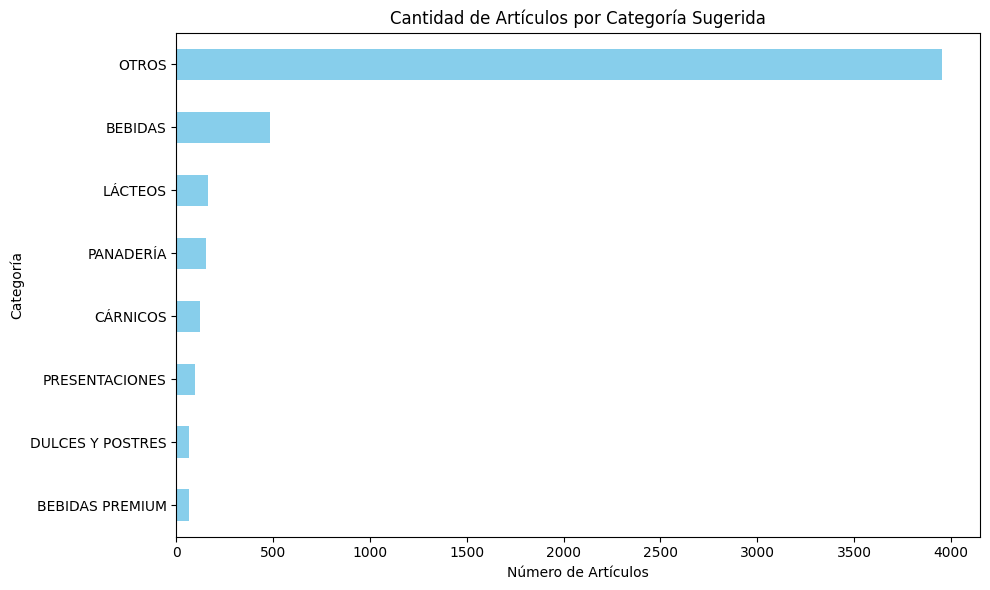

In [16]:
#Grafico de barras asociados a las categorias sugeridas
import matplotlib.pyplot as plt

# Conteo
conteo = df_articulos['categoria_sugerida'].value_counts().sort_values(ascending=True)

# Gráfico horizontal
plt.figure(figsize=(10, 6))
conteo.plot(kind='barh', color='skyblue')
plt.title('Cantidad de Artículos por Categoría Sugerida')
plt.xlabel('Número de Artículos')
plt.ylabel('Categoría')
plt.tight_layout()
plt.show()


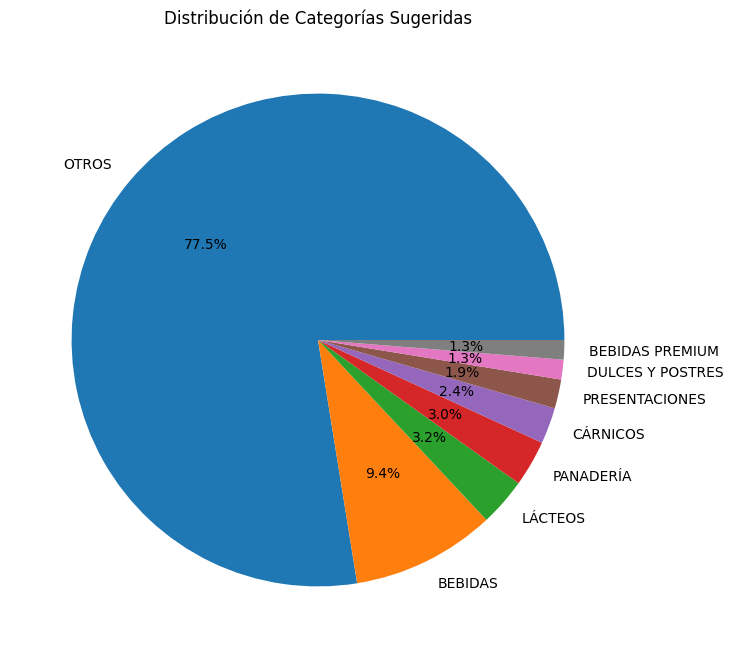

In [17]:
#Grafico de pastel asociado con las categorias sugeridas
df_articulos['categoria_sugerida'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    figsize=(8, 8), 
    title='Distribución de Categorías Sugeridas'
)
plt.ylabel('')
plt.show()


Distribucion de articulos activos vs distribucion de articulos inactivos 
Este analisis tiene como objetivo conocer el estado operativo del portafolio de productos, identificando cuantos de los articulos estan actualmente activos y cuantos se encuentran inactivos. 

¿Que hace este bloque de codigo?
1. Agrupa los articulos segun su campo "Activo" que indica si el producto se encuentra activo o si no 
2. Cuenta cuantos articulos pertenecen a cada grupo y estado. 
3. Visualiza la distribucion mediante un grafico de barras horixzontales. 

Este analisis es ampliamente funcional por las siguientes razones
1. El eje horizontal representa la cantidad de articulos
2. El eje vertical representa el estado 

Finalmente se observa una proporcion relativamente similar de articulos activos e inactivos, lo que puede motivar acciones de limpieza o reactivación estratégica. 

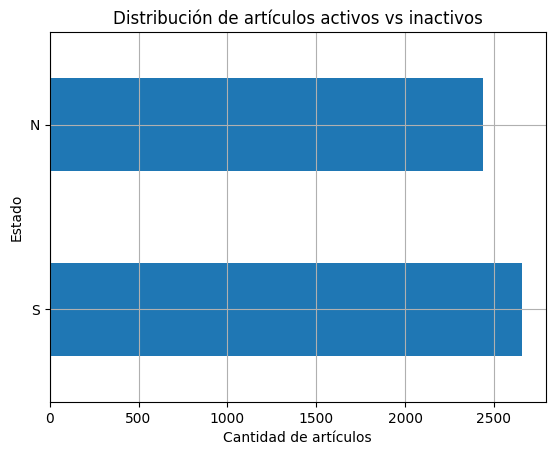

In [6]:
import matplotlib.pyplot as plt

#Distribucion de los articulos activos vs inactivos
df_articulos['activo'].value_counts().plot(kind='barh', title='Distribución de artículos activos vs inactivos')
plt.xlabel('Cantidad de artículos')
plt.ylabel('Estado')
plt.grid(True)
plt.show()


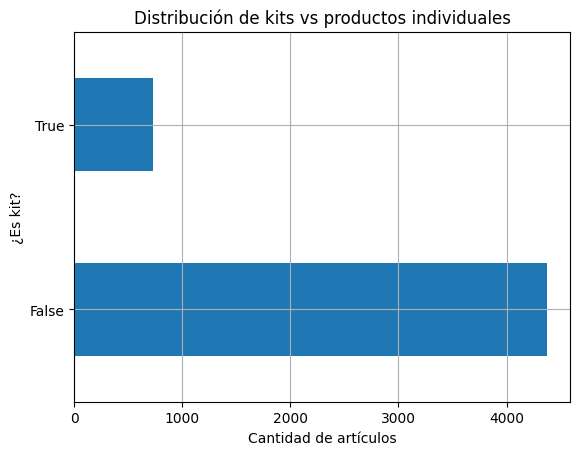

In [8]:
#Distribucion de articulos que son kits vs productos individuales 
df_articulos['kit'].value_counts().plot(kind='barh', title='Distribución de kits vs productos individuales')
plt.xlabel('Cantidad de artículos')
plt.ylabel('¿Es kit?')
plt.grid(True)
plt.show()


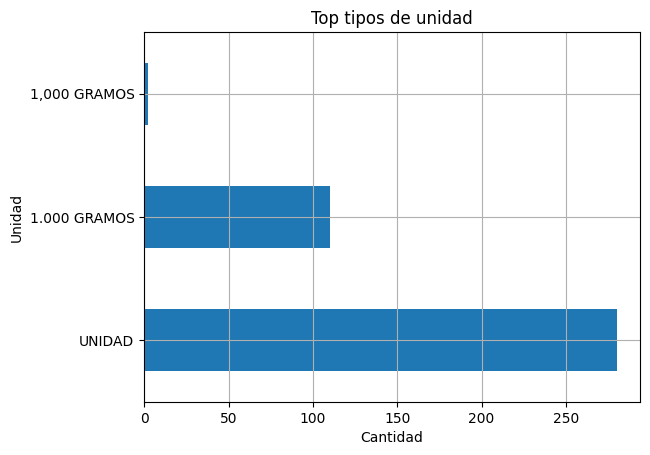

In [10]:
#Unidades y diversidad por los diferentes tipos de unidad 
df_articulos['unidad'].value_counts().head(10).plot(kind='barh', title='Top tipos de unidad')
plt.xlabel('Cantidad')
plt.ylabel('Unidad')
plt.grid(True)
plt.show()


In [11]:
#Deteccion de articulos sin codigos de barras 
# Faltantes de código de barras
faltan_barras = df_articulos['barras'].isnull().sum()
print(f"Artículos sin código de barras: {faltan_barras} de {len(df_articulos)}")


Artículos sin código de barras: 1605 de 5098


In [12]:
#Resumen final presentado de los articulos 
print(f"Total artículos: {len(df_articulos)}")
print(f"Artículos activos: {df_articulos['activo'].sum()}")
print(f"Kits: {df_articulos['kit'].sum()}")


Total artículos: 5098
Artículos activos: SSNNNNNNNNNNNSSSSSSSNNNSNNNNSNNNNNNSNNNNSSSNNNNNNNSSNSSSNSNSNNNSSSNNNSSNNSNNNSSNNSNSNNSSNNNSNNNNNNNNSNNSNNNNNNSSNSNNNNNSNNNNNSNSSNNSNNNNNNNSNNSNNNNNNNNNSNSSNNSNNNNNNSNNSNNNNNNNNNNNNNSNSSNSSNNNNNSNNNNNNNNNNNNNSSSNNNNSNSNSSNNNNNNSNNNNSNSNSNNNNSNNNNNNNNNNNNNNSSSNNNNNNNNNNSNNNSSSNSSSSSSSNNNNNNNNNNNNNNSNNSNNSSSNNNNNNNNSNSSSNSNNNNNNSSNNNNNNNNNNNNNNSNNNNSSNSSSSSSSNNSNNSSSSSSNNSNSNSSNNSSSNNNNNNSNNNSNNSNNSNNNNNNSNSNNNSNSNNSNSSSNNNNNSNNNNNNNNNNNNNNNNNNSSSSNSSSSNSNNNNNNNNNNNSSNNNNNNNNSSNSSSSNSSSNNNSNNNNNNNNNNNNNNNNNNNNNNSNSNNNSSNSNNNNNNNNNNNNNNNNNNNSNSNNSSSNNNNNNNSNNNNNNNNSNNNNNNNNNNNNNNNNNNSNNNNSNNNNSNSSNNNNNNNNSNSNNNNNSNNNNSSNNNSSNNNNNNNNNSSSNNNNNNNNNNNSSNSNSNNNNNNNNNNNNNNSNNNNNNNNNNNNSNNNNNSNNNNNNNNNNNSSSSNNNNNSSNSSSSSSSSNSNSSSSSSNNNNNNNNNNNNNNNNNSNNNSNNNNSSNSSNSNNNSSNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNSSSSSSNNNNNNSNNNSSSNSNNNSSSSNNNNNNNNSNNNSSNNNNNNSNNSNNNNNNSNNNSNSSSSNNNSNNNSNNNSSNNNNSSSSNNSSSSSSSSSSSSNNSNNNNNSNNSNNNNNNSNNNSSNNNNNNNNNNNNNNNNNNNNS

In [4]:
# Limpieza y tokenización de los nombres
df_articulos['nombre_limpio'] = df_articulos['nombre'].str.upper().str.replace(r'[^A-Z\s]', '', regex=True)
df_articulos['tokens'] = df_articulos['nombre_limpio'].str.split()

# Aplicar la asignación de categoría basada en los tokens
def asignar_categoria(tokens):
    for token in tokens:
        if token in reglas_categoria:
            return reglas_categoria[token]
    return 'OTROS'

df_articulos['categoria_sugerida'] = df_articulos['tokens'].apply(
    lambda x: asignar_categoria(x) if isinstance(x, list) else 'OTROS'
)



NameError: name 'reglas_categoria' is not defined